In [1]:
import csv
import numpy as np
import matplotlib
from matplotlib import pyplot as pl
%matplotlib inline

In [2]:
data_path = "../data/data.csv"
data = dict()
labels = list()
with open(data_path, 'r') as f:
    firstrow = True
    reader = csv.reader(f, delimiter=";")
    for row in reader:
        if firstrow is True:
            for item in row:
                labels.append(item.lower())
            firstrow = False
            continue
        d = dict()
        j = None
        for item, label in zip(row, labels):
            if label == "jarnro":
                j = item
            elif len(item) > 0:
                d[label] = item
        data[j] = d

In [3]:
len(data)

203350

Luokittelu (clustering) on tämän datasetin suhteen haastavaa, sillä kyseessä on 'mixed data' setti, eli yhdistelmä jatkuvia numeerisia arvoja (esim paino) sekä luokka-arvoja (esim runkotyyppi).

Lisäksi osa datasta puuttuu. Tämä rajoittaa joidenkin algoritmien käytettävyyttä, tai on käytettävä imputointia (esim. EM tyyliin iteroiden).

Lisäksi eri sarakkeiden arvot eivät ole keskenään vertailukelpoisia, eli meidän on myös määritettävä jokin järjevä etäisyysmitta.

Tässä ei myöskään ole selkeästi tiedossa mihin tarkoitukseen tätä luokittelua käytetään, jolloin ei ole selvää mitä hyvyysmittaa kannattaa optimoida.

Toisaalta datan voi helposti luokitella käyttämällä olemassa olevia sarakkeita: rivit on jo luokiteltu esimerkiksi mallin, merkin ja tyypin perusteella.

Valitsin tästä syystä yksinkertaisen luokitteluesimerkin, sillä ilman tarkempaa tehtävänmäärittelyä ei ole oikein perusteita lähteä rakentamaan kehittyneempää ratkaisua.

vuosimalli valmistusvuosi


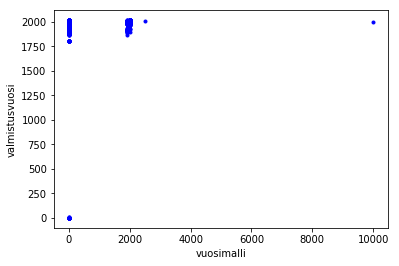

vuosimalli kayttoonottovuosi


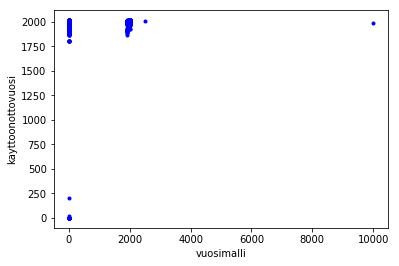

vuosimalli paavari


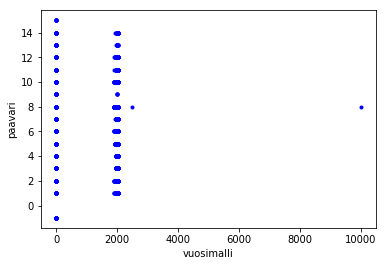

vuosimalli lisavari


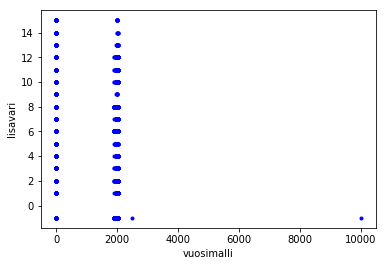

vuosimalli maxpituus


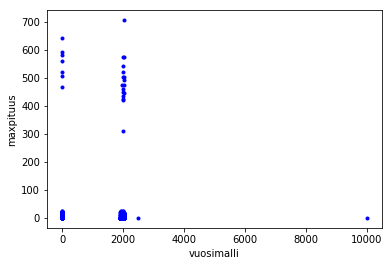

vuosimalli maxnopeus


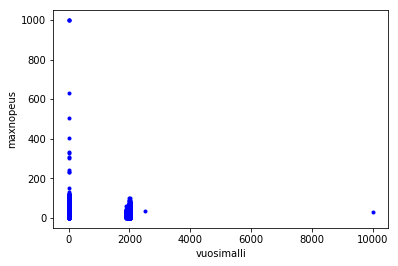

vuosimalli maxmoottoriteho


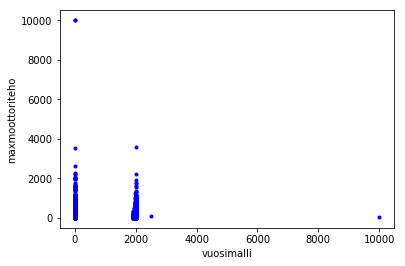

vuosimalli moottori_teho


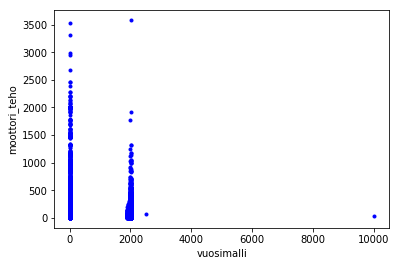

vuosimalli moottori_lkm


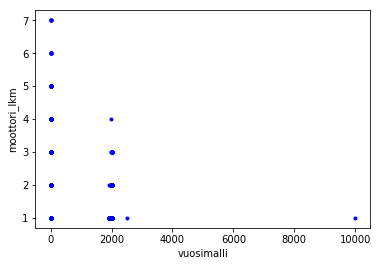

vuosimalli paino


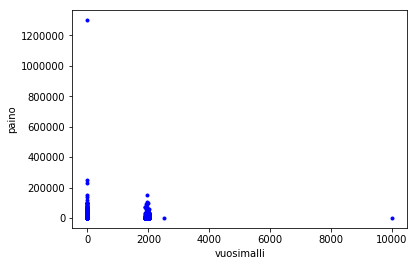

vuosimalli jokivene


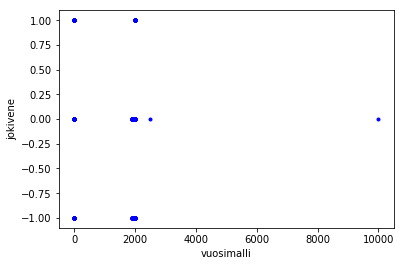

vuosimalli tenonvene


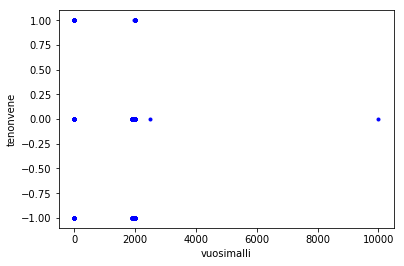

vuosimalli vene_malli


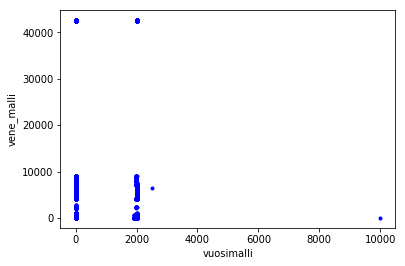

vuosimalli vene_merkki


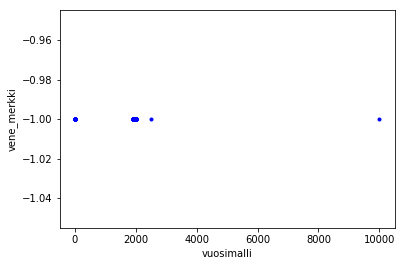

vuosimalli tyyppi


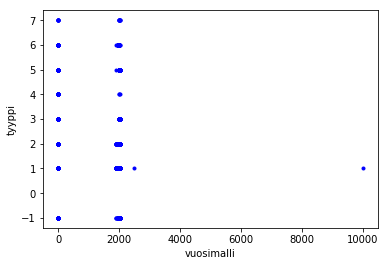

vuosimalli runkotyyppi


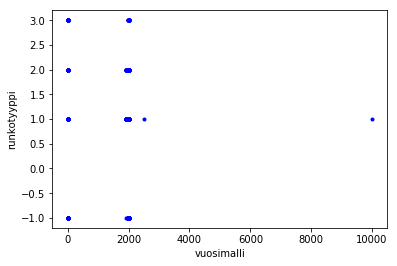

vuosimalli kansirakenne


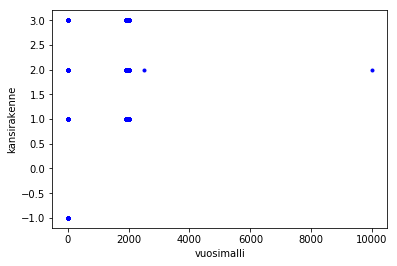

vuosimalli rungonrakmat


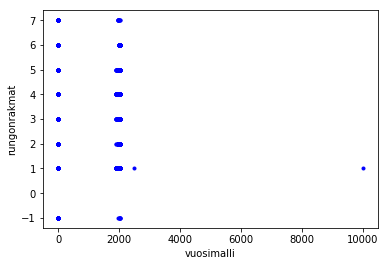

vuosimalli maxhlolkm


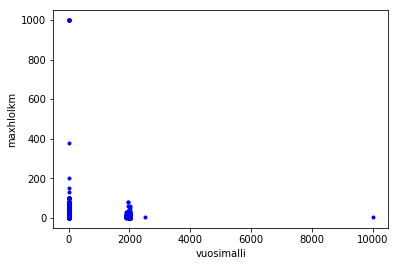

vuosimalli runkopituus


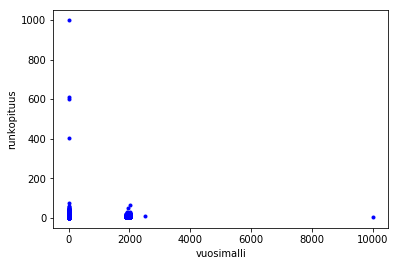

vuosimalli maxleveys


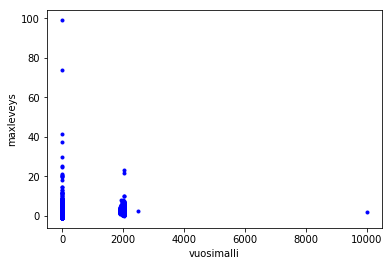

vuosimalli syvays


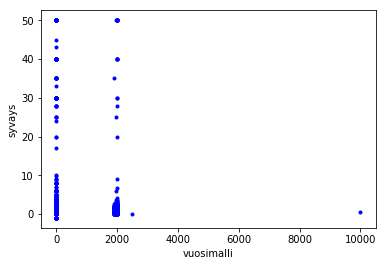

vuosimalli kayttokunta_koodi


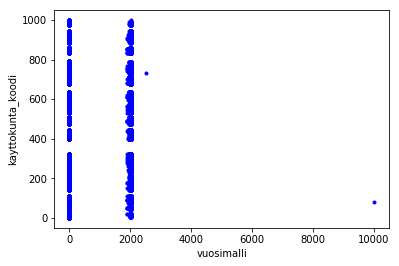

vuosimalli jarnro


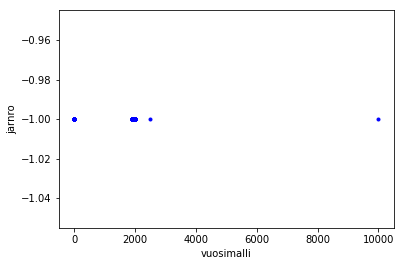

valmistusvuosi vuosimalli


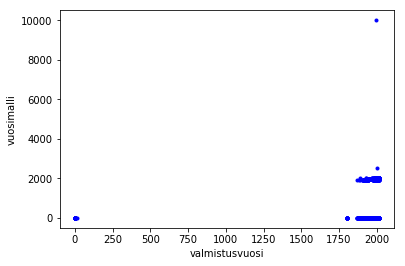

valmistusvuosi kayttoonottovuosi


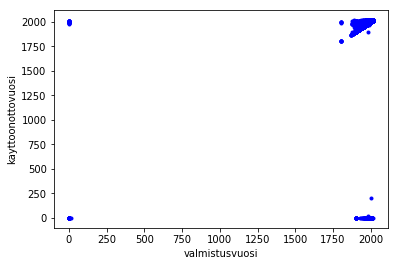

valmistusvuosi paavari


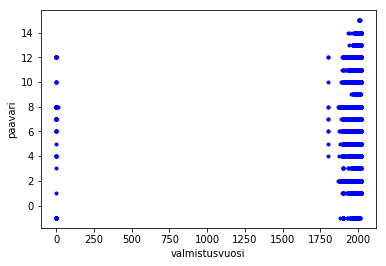

valmistusvuosi lisavari


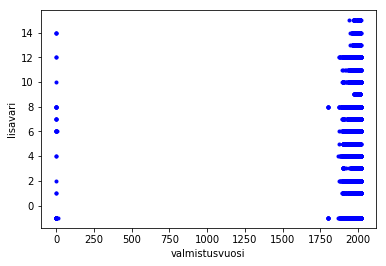

valmistusvuosi maxpituus


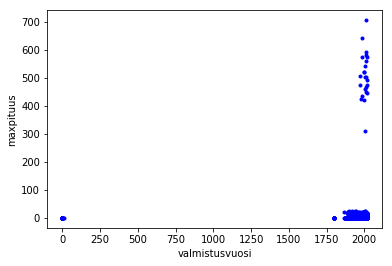

valmistusvuosi maxnopeus


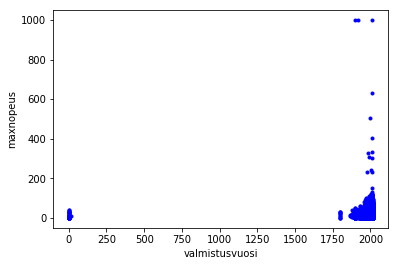

valmistusvuosi maxmoottoriteho


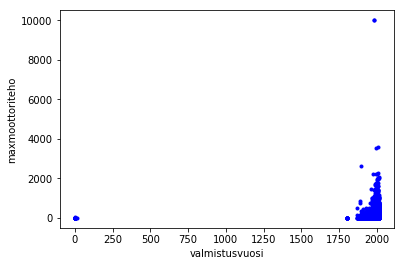

valmistusvuosi moottori_teho


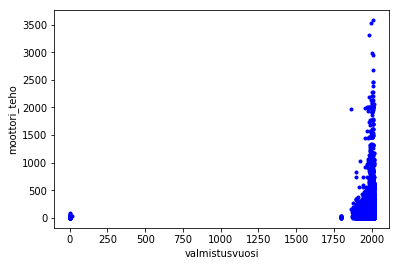

valmistusvuosi moottori_lkm


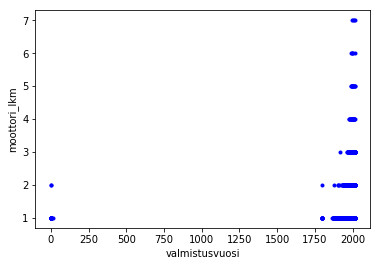

valmistusvuosi paino


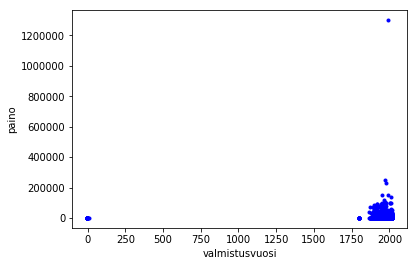

valmistusvuosi jokivene


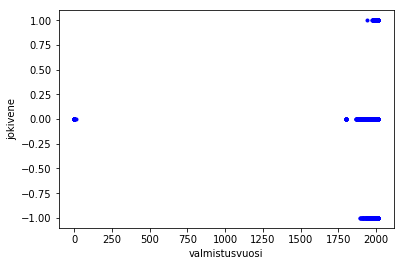

valmistusvuosi tenonvene


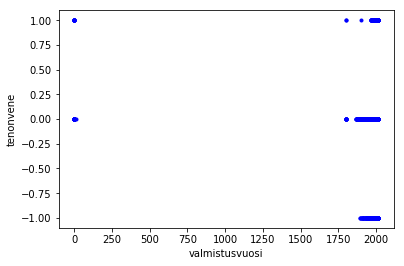

valmistusvuosi vene_malli


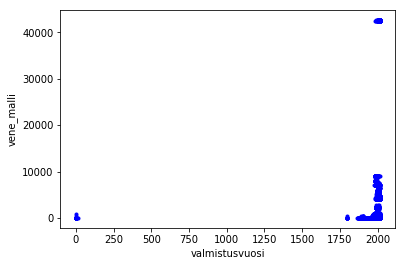

valmistusvuosi vene_merkki


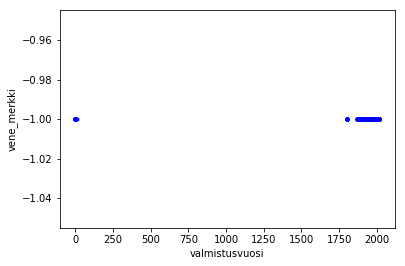

valmistusvuosi tyyppi


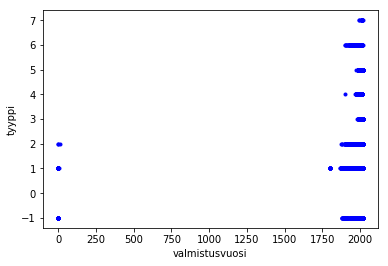

valmistusvuosi runkotyyppi


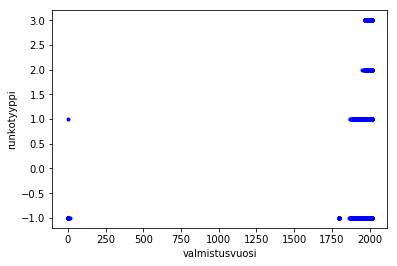

valmistusvuosi kansirakenne


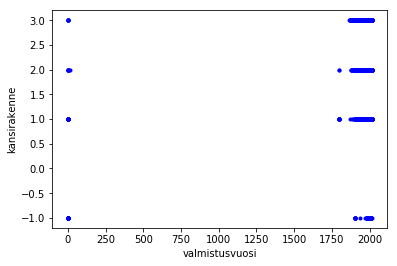

valmistusvuosi rungonrakmat


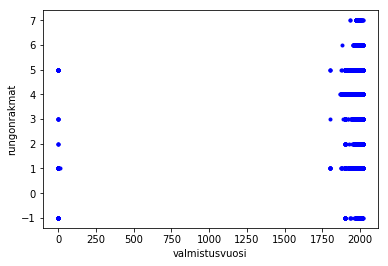

valmistusvuosi maxhlolkm


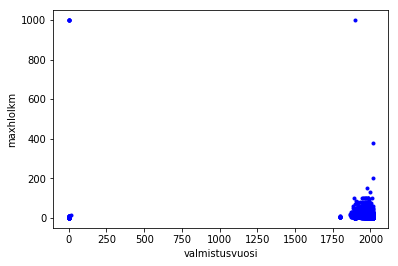

valmistusvuosi runkopituus


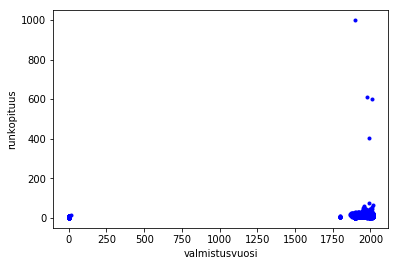

valmistusvuosi maxleveys


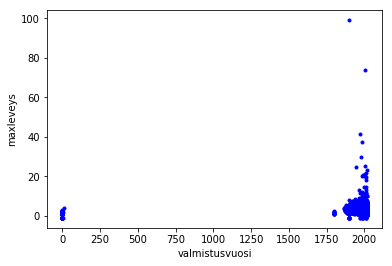

valmistusvuosi syvays


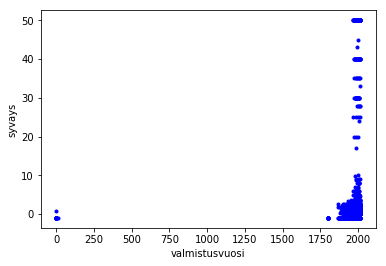

valmistusvuosi kayttokunta_koodi


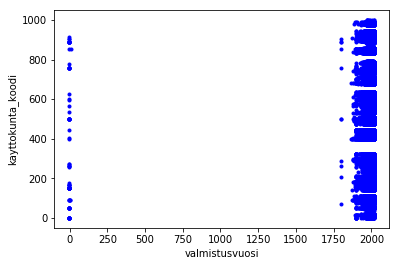

valmistusvuosi jarnro


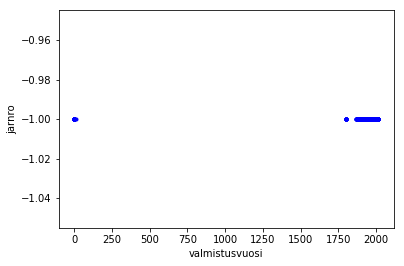

kayttoonottovuosi vuosimalli


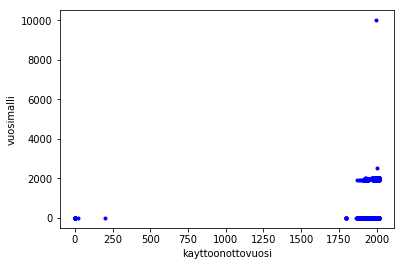

kayttoonottovuosi valmistusvuosi


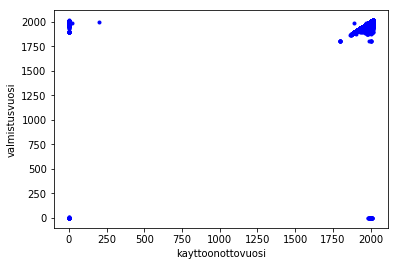

kayttoonottovuosi paavari


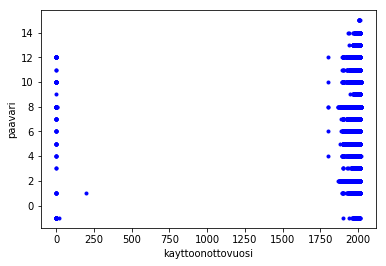

kayttoonottovuosi lisavari


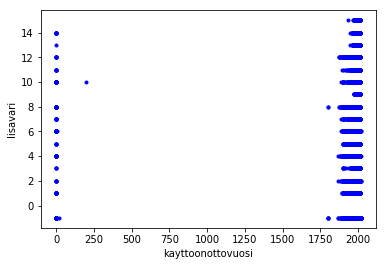

kayttoonottovuosi maxpituus


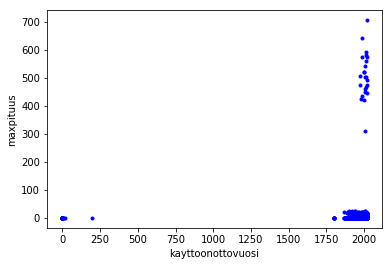

kayttoonottovuosi maxnopeus


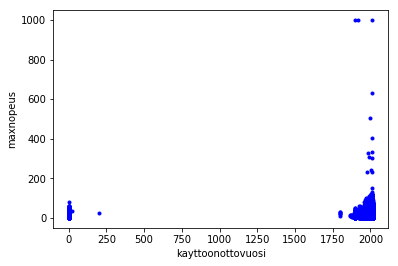

kayttoonottovuosi maxmoottoriteho


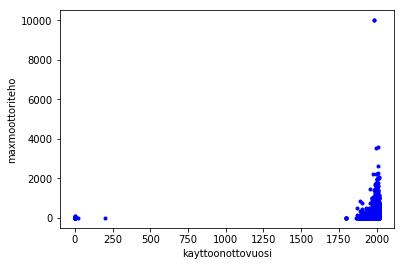

kayttoonottovuosi moottori_teho


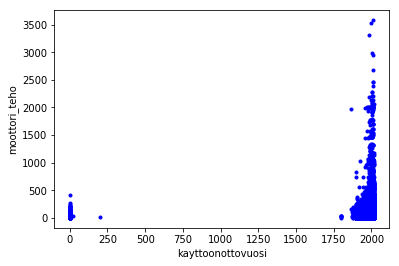

kayttoonottovuosi moottori_lkm


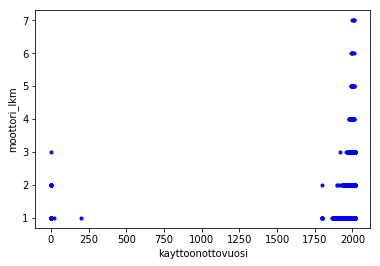

kayttoonottovuosi paino


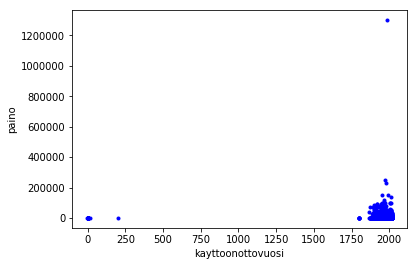

kayttoonottovuosi jokivene


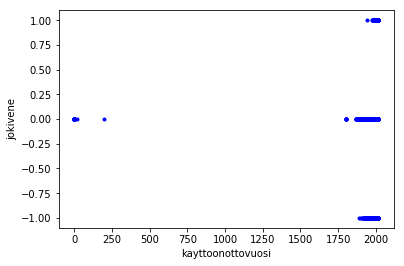

kayttoonottovuosi tenonvene


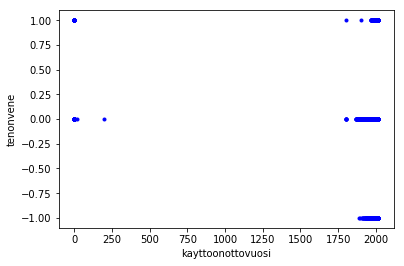

kayttoonottovuosi vene_malli


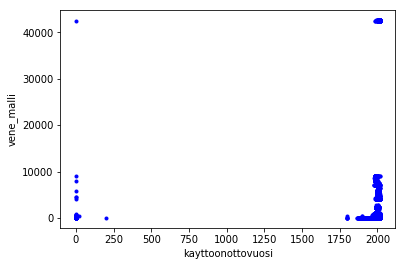

kayttoonottovuosi vene_merkki


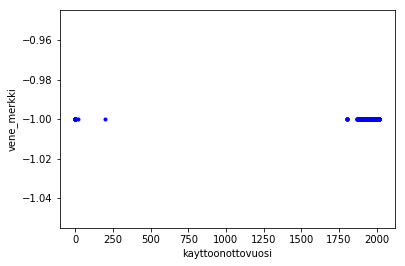

kayttoonottovuosi tyyppi


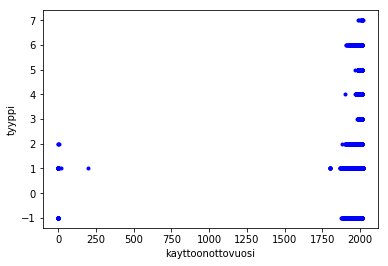

kayttoonottovuosi runkotyyppi


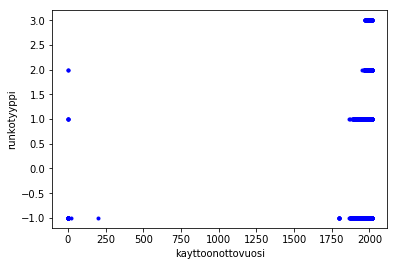

kayttoonottovuosi kansirakenne


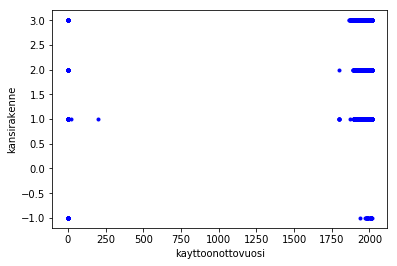

kayttoonottovuosi rungonrakmat


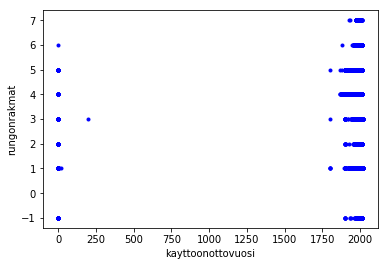

kayttoonottovuosi maxhlolkm


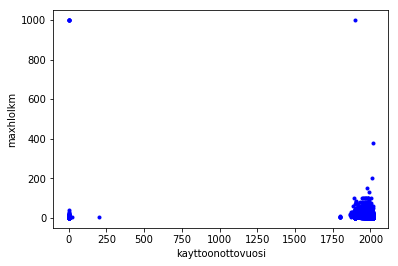

kayttoonottovuosi runkopituus


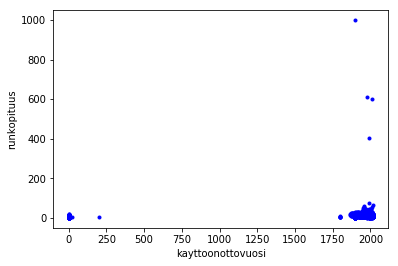

kayttoonottovuosi maxleveys


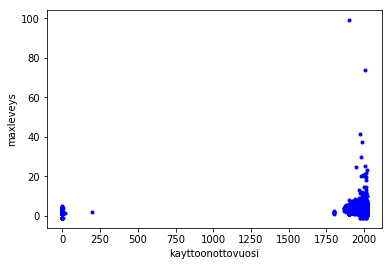

kayttoonottovuosi syvays


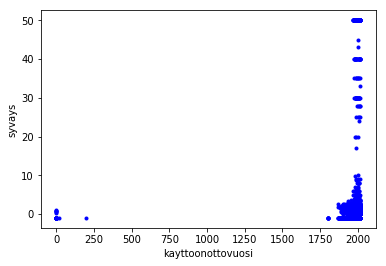

kayttoonottovuosi kayttokunta_koodi


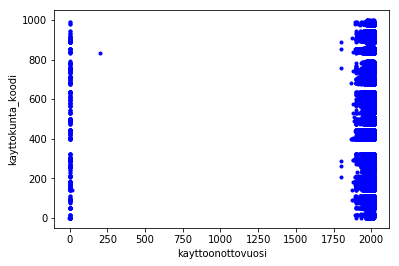

kayttoonottovuosi jarnro


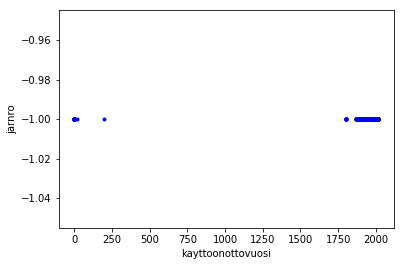

paavari vuosimalli


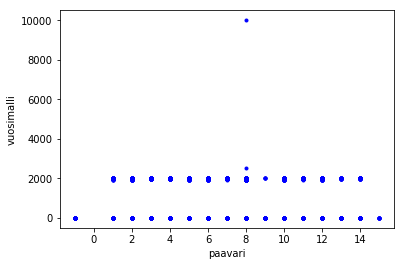

paavari valmistusvuosi


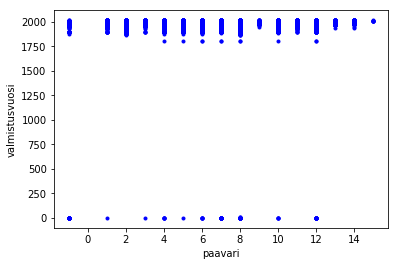

paavari kayttoonottovuosi


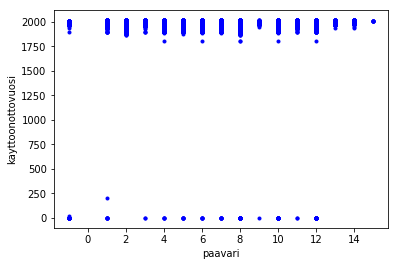

paavari lisavari


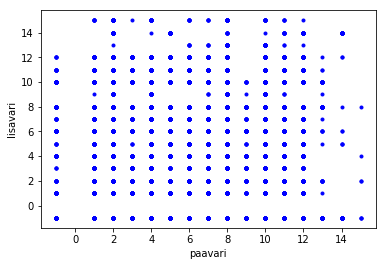

paavari maxpituus


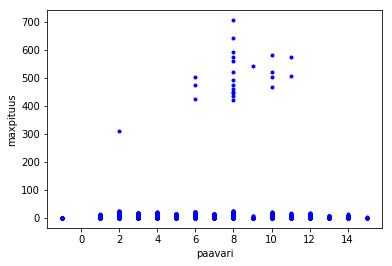

paavari maxnopeus


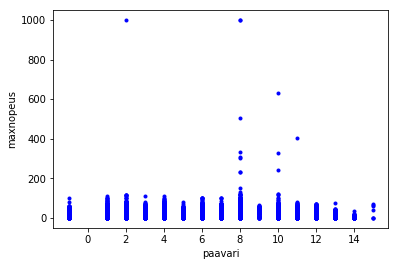

paavari maxmoottoriteho


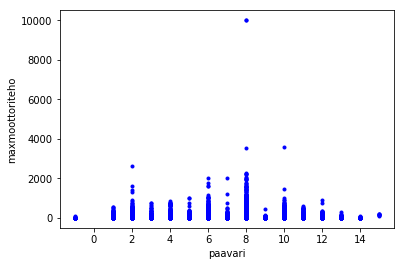

paavari moottori_teho


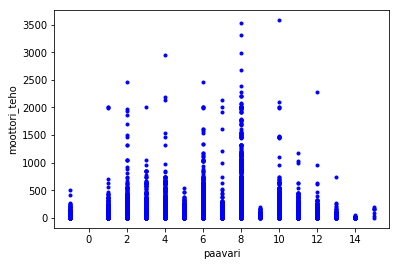

paavari moottori_lkm


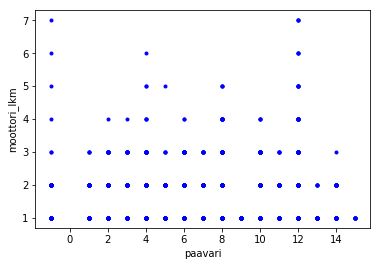

paavari paino


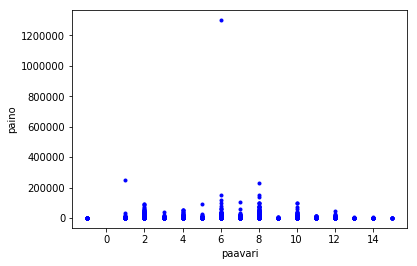

paavari jokivene


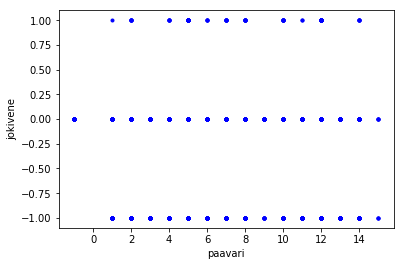

paavari tenonvene


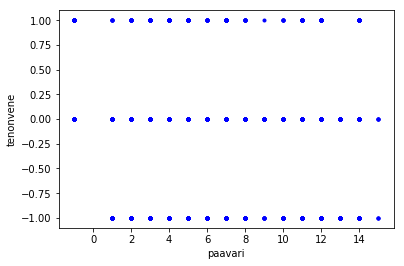

paavari vene_malli


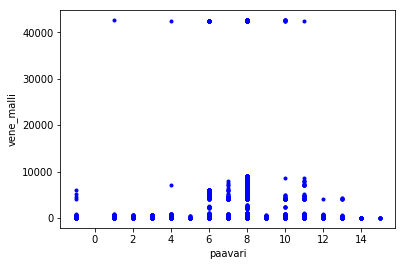

paavari vene_merkki


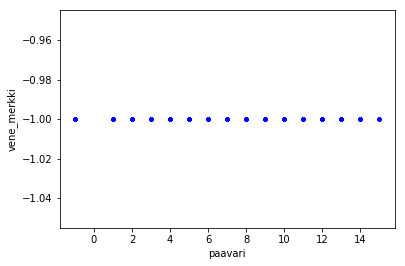

paavari tyyppi


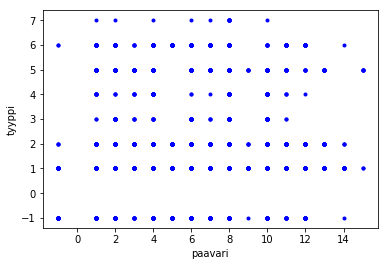

paavari runkotyyppi


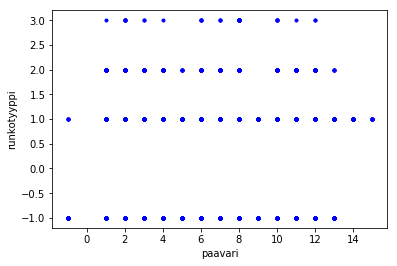

paavari kansirakenne


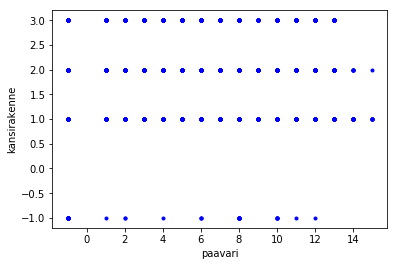

paavari rungonrakmat


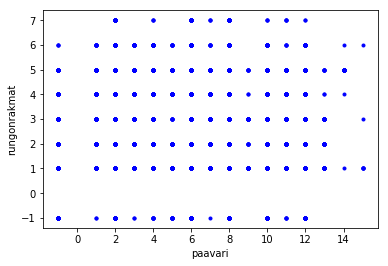

paavari maxhlolkm


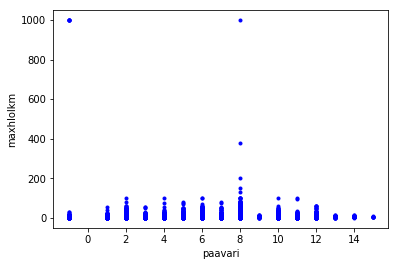

paavari runkopituus


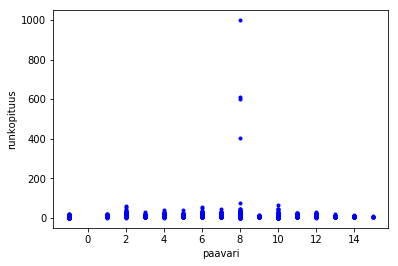

paavari maxleveys


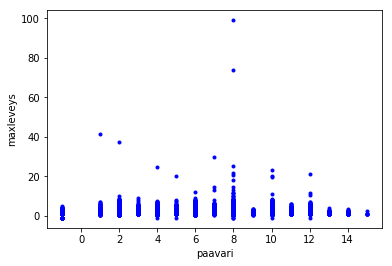

paavari syvays


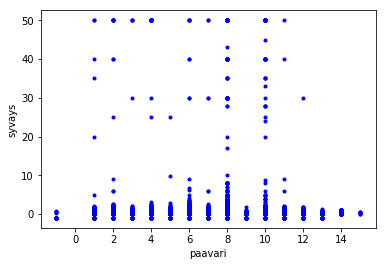

paavari kayttokunta_koodi


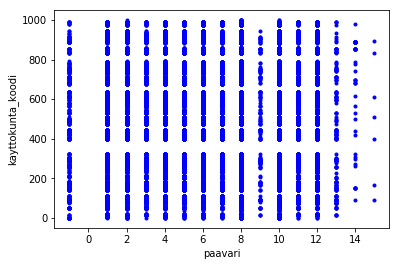

paavari jarnro


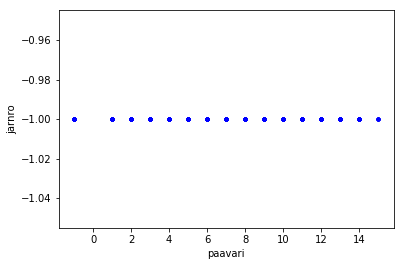

lisavari vuosimalli


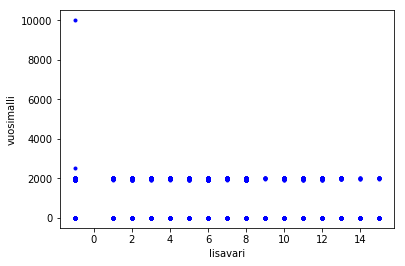

lisavari valmistusvuosi


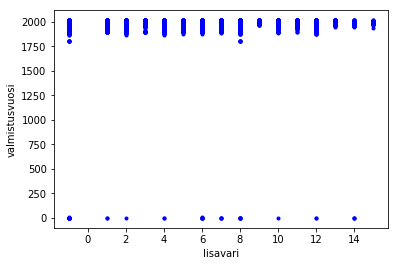

lisavari kayttoonottovuosi


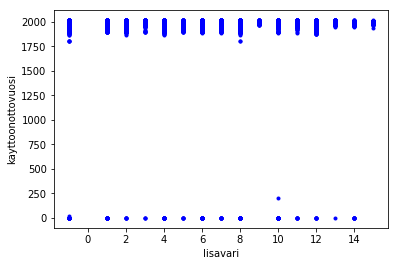

lisavari paavari


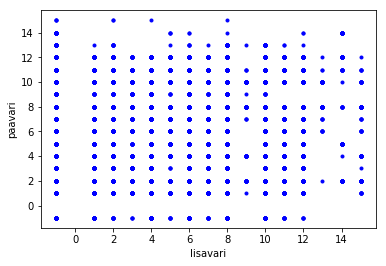

lisavari maxpituus


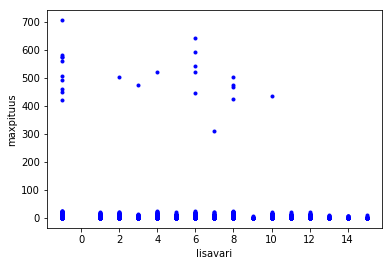

lisavari maxnopeus


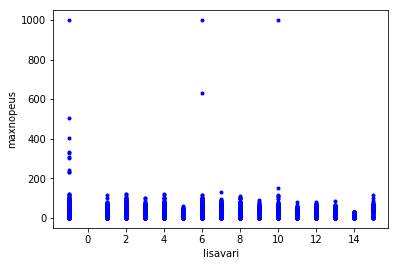

lisavari maxmoottoriteho


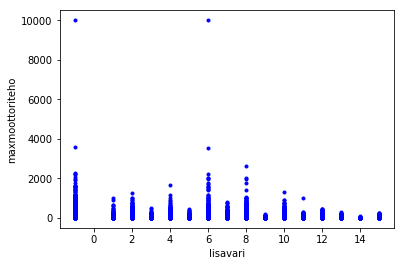

lisavari moottori_teho


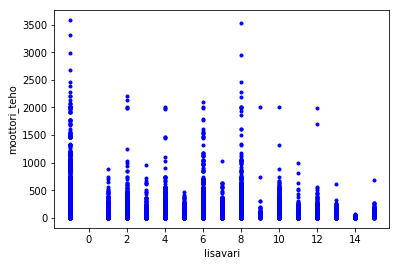

lisavari moottori_lkm


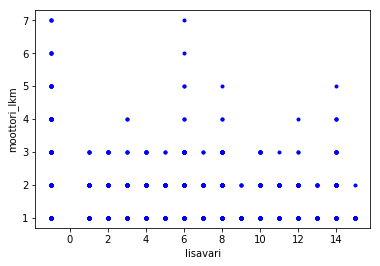

lisavari paino


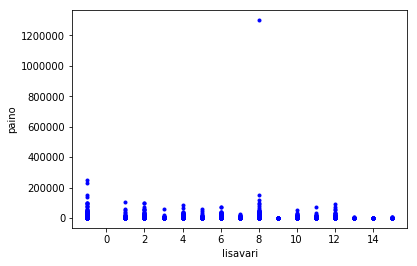

lisavari jokivene


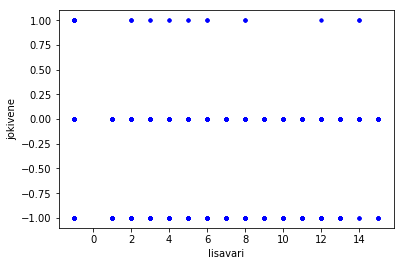

lisavari tenonvene


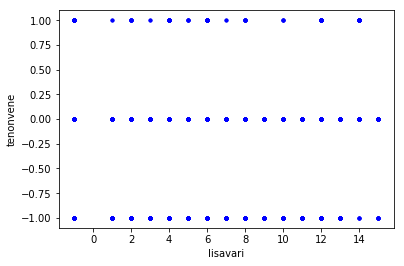

lisavari vene_malli


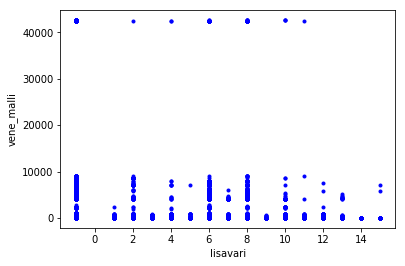

lisavari vene_merkki


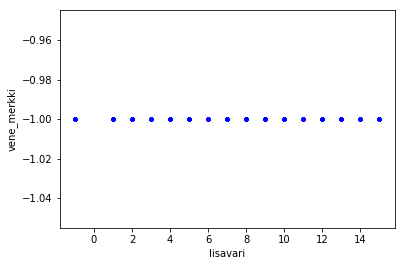

lisavari tyyppi


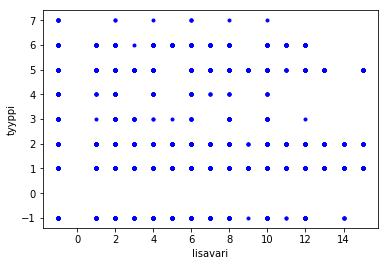

lisavari runkotyyppi


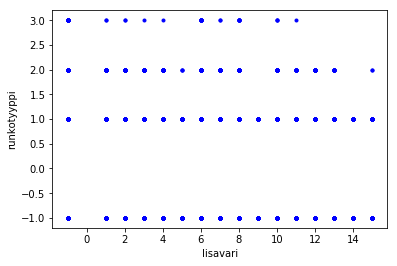

lisavari kansirakenne


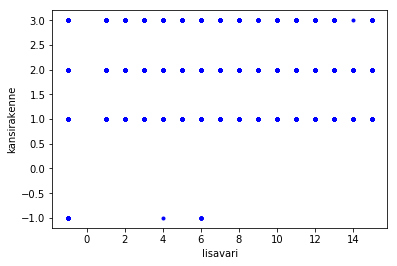

lisavari rungonrakmat


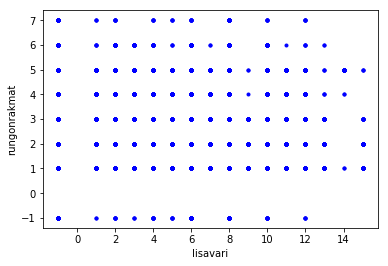

lisavari maxhlolkm


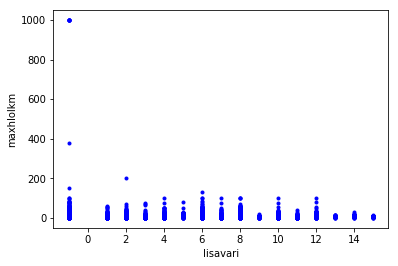

lisavari runkopituus


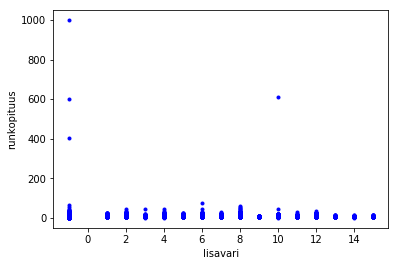

lisavari maxleveys


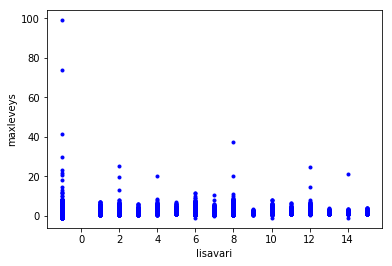

lisavari syvays


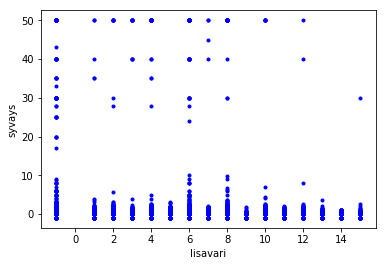

lisavari kayttokunta_koodi


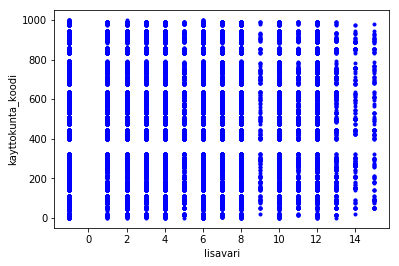

lisavari jarnro


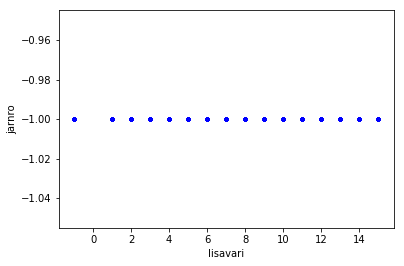

maxpituus vuosimalli


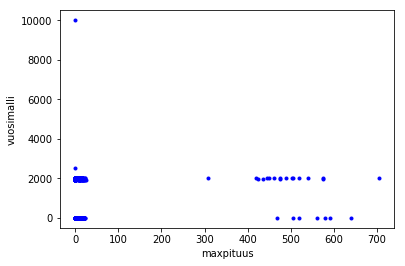

maxpituus valmistusvuosi


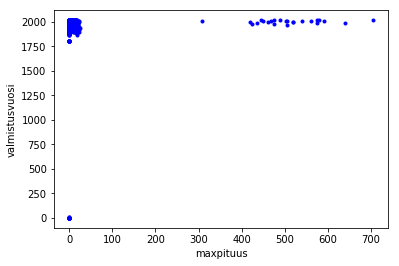

maxpituus kayttoonottovuosi


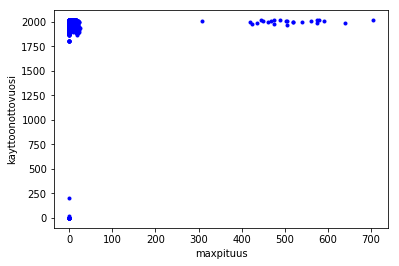

maxpituus paavari


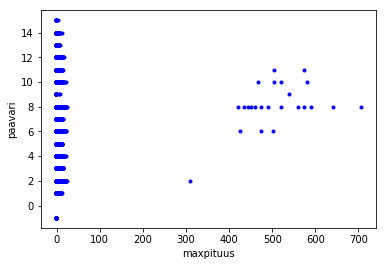

maxpituus lisavari


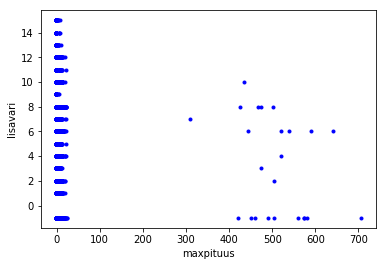

maxpituus maxnopeus


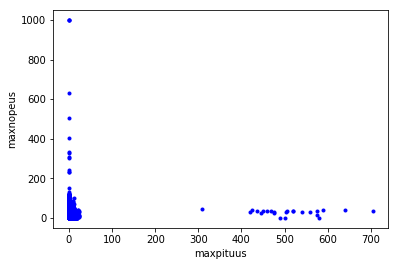

maxpituus maxmoottoriteho


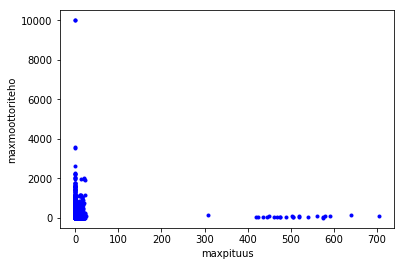

maxpituus moottori_teho


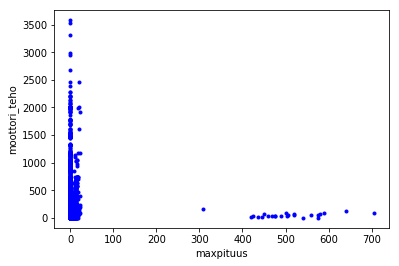

maxpituus moottori_lkm


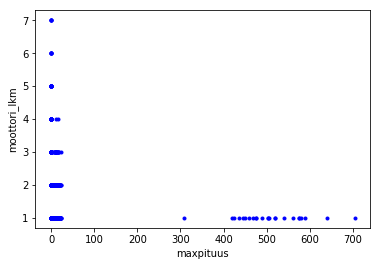

maxpituus paino


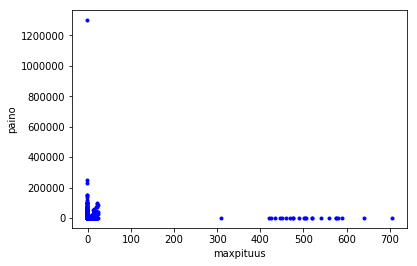

maxpituus jokivene


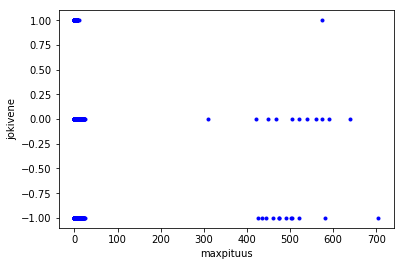

maxpituus tenonvene


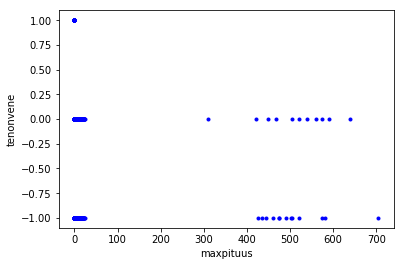

maxpituus vene_malli


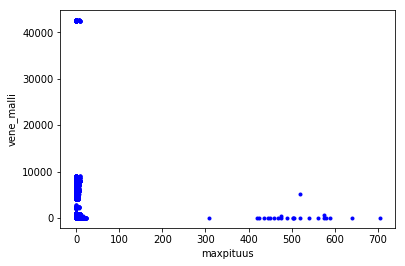

maxpituus vene_merkki


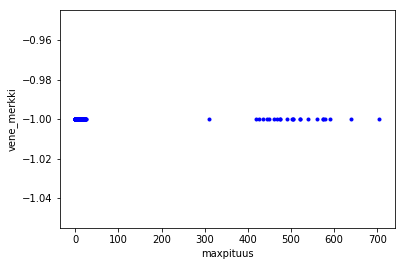

maxpituus tyyppi


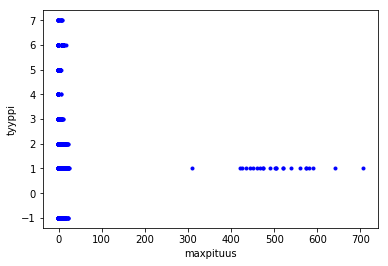

maxpituus runkotyyppi


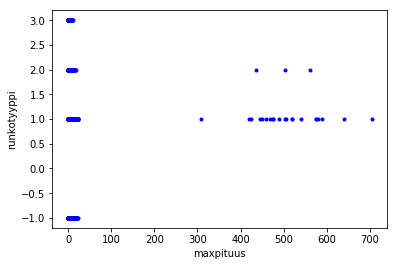

maxpituus kansirakenne


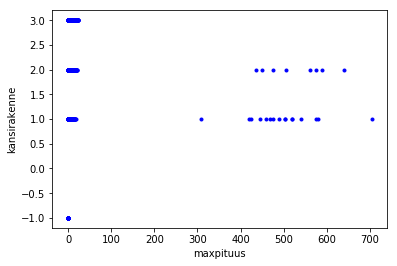

maxpituus rungonrakmat


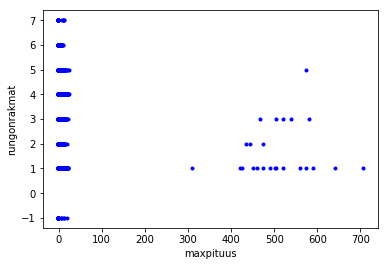

maxpituus maxhlolkm


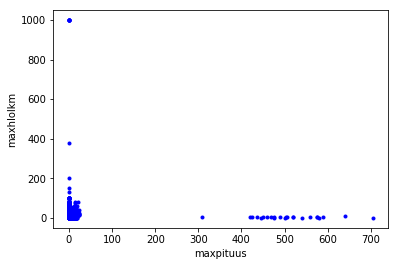

maxpituus runkopituus


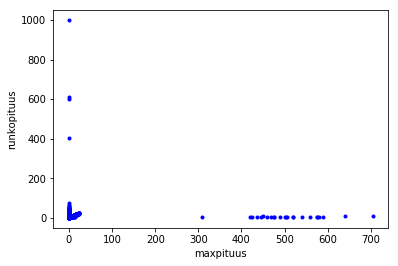

maxpituus maxleveys


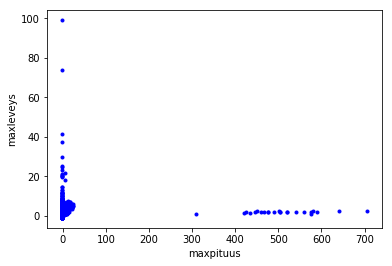

maxpituus syvays


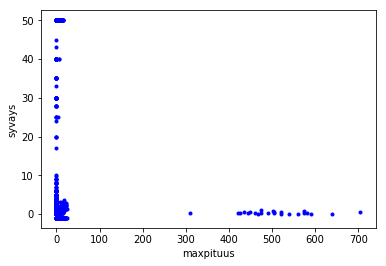

maxpituus kayttokunta_koodi


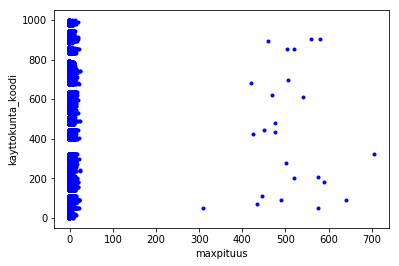

maxpituus jarnro


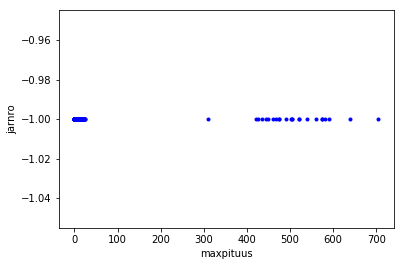

maxnopeus vuosimalli


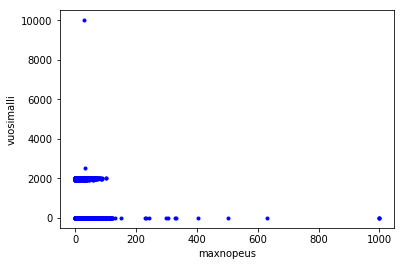

maxnopeus valmistusvuosi


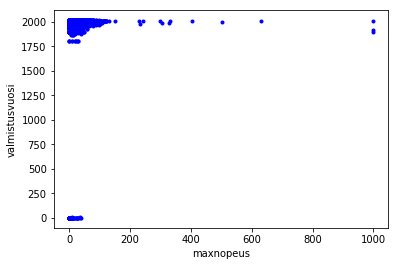

maxnopeus kayttoonottovuosi


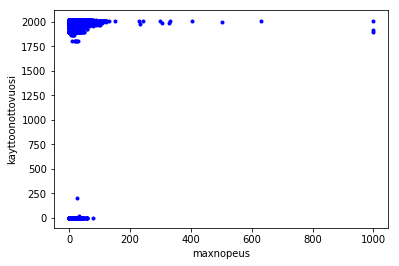

maxnopeus paavari


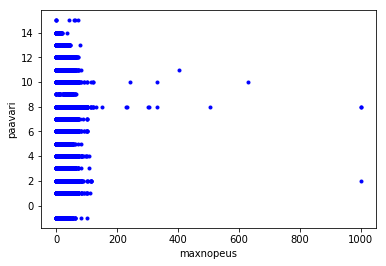

maxnopeus lisavari


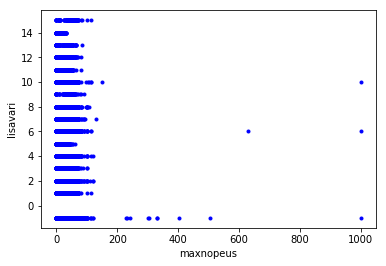

maxnopeus maxpituus


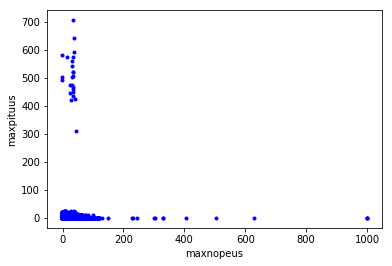

maxnopeus maxmoottoriteho


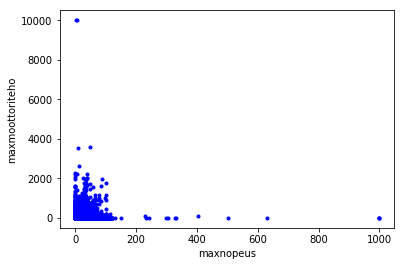

maxnopeus moottori_teho


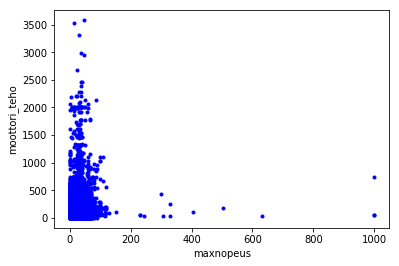

maxnopeus moottori_lkm


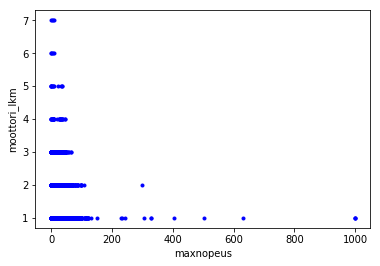

maxnopeus paino


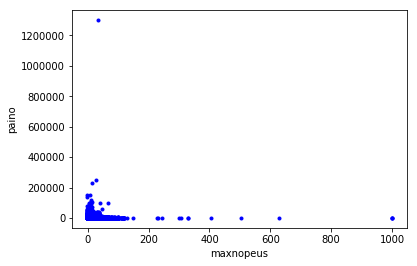

maxnopeus jokivene


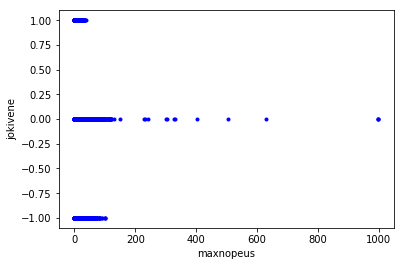

maxnopeus tenonvene


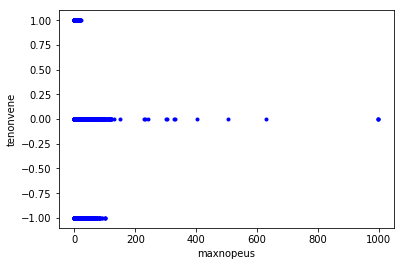

maxnopeus vene_malli


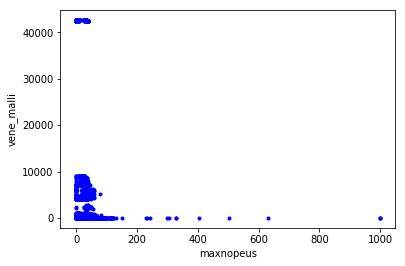

maxnopeus vene_merkki


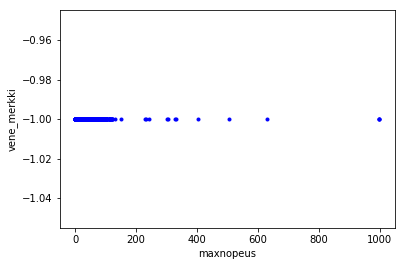

maxnopeus tyyppi


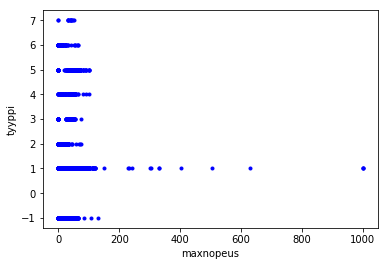

maxnopeus runkotyyppi


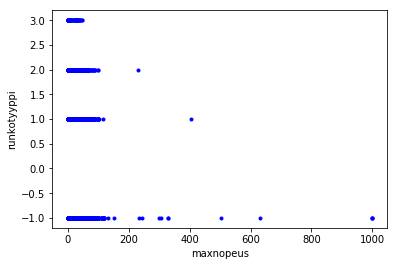

maxnopeus kansirakenne


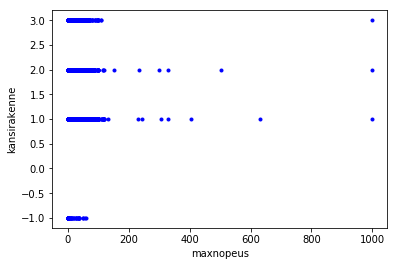

maxnopeus rungonrakmat


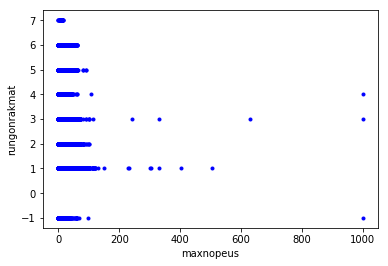

maxnopeus maxhlolkm


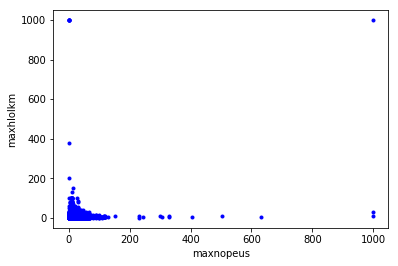

maxnopeus runkopituus


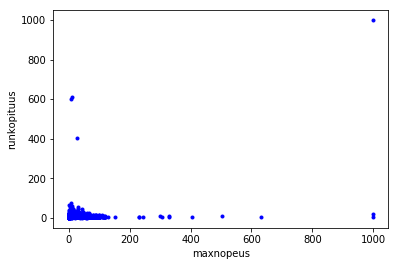

maxnopeus maxleveys


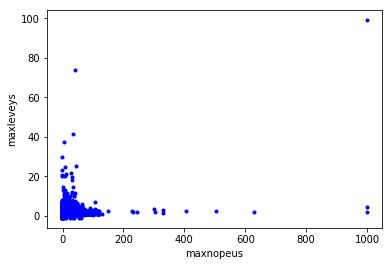

maxnopeus syvays


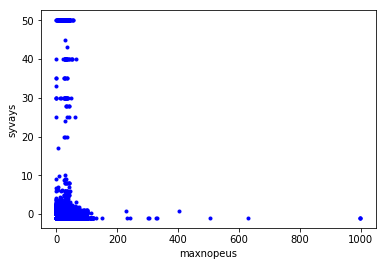

maxnopeus kayttokunta_koodi


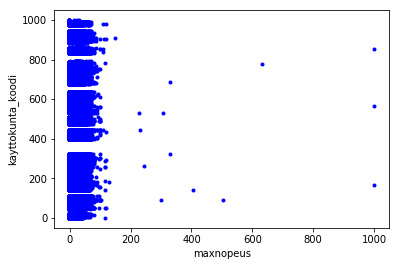

maxnopeus jarnro


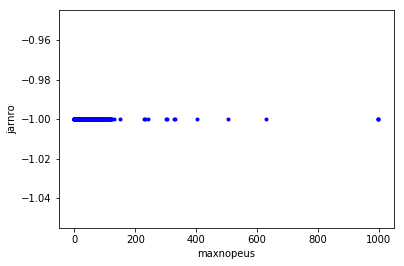

maxmoottoriteho vuosimalli


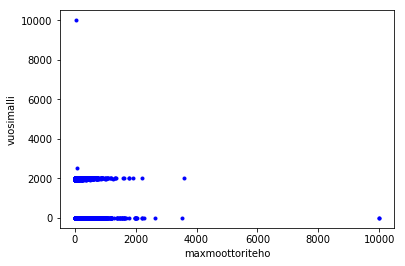

maxmoottoriteho valmistusvuosi


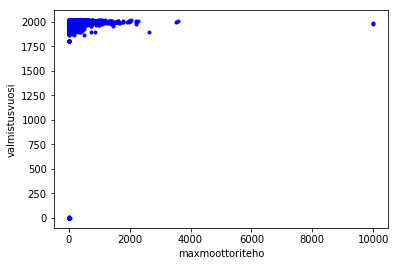

maxmoottoriteho kayttoonottovuosi


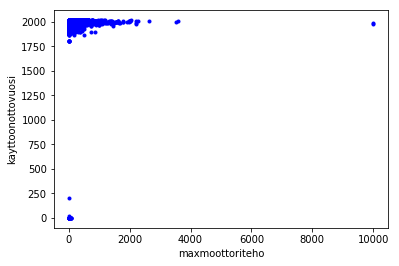

maxmoottoriteho paavari


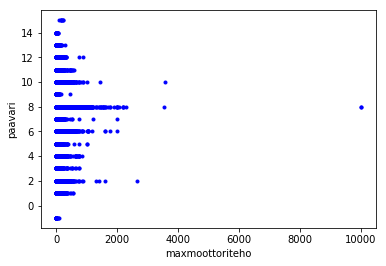

maxmoottoriteho lisavari


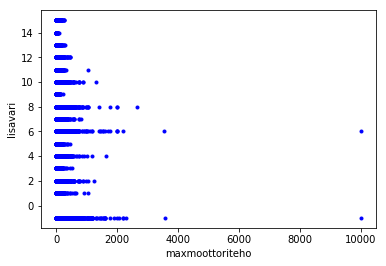

maxmoottoriteho maxpituus


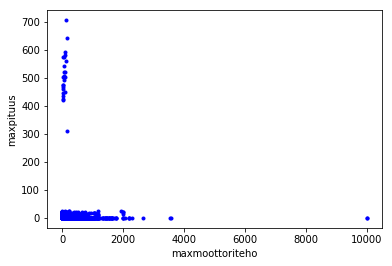

maxmoottoriteho maxnopeus


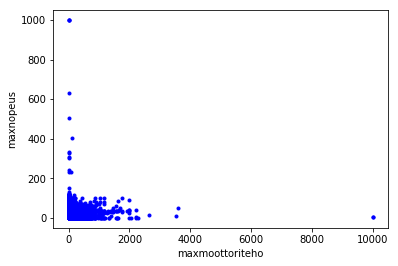

maxmoottoriteho moottori_teho


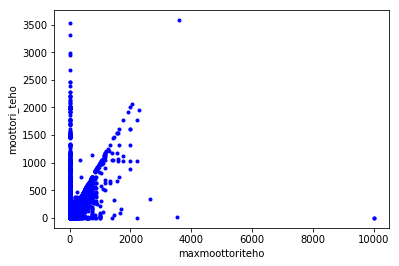

maxmoottoriteho moottori_lkm


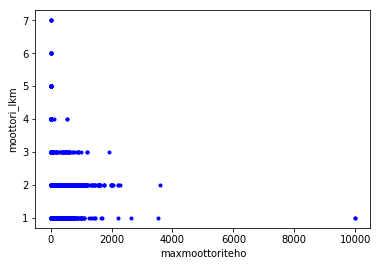

maxmoottoriteho paino


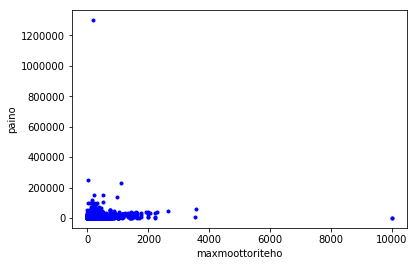

maxmoottoriteho jokivene


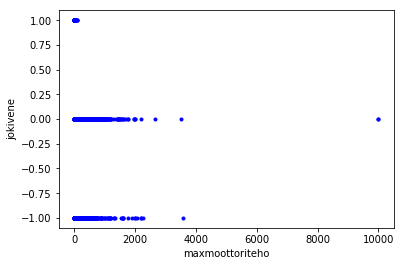

maxmoottoriteho tenonvene


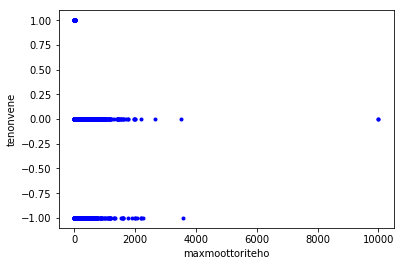

maxmoottoriteho vene_malli


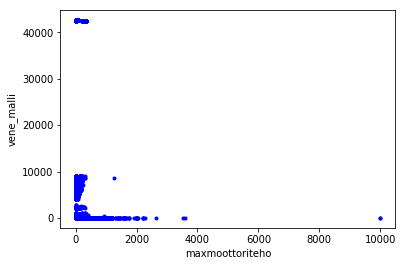

maxmoottoriteho vene_merkki


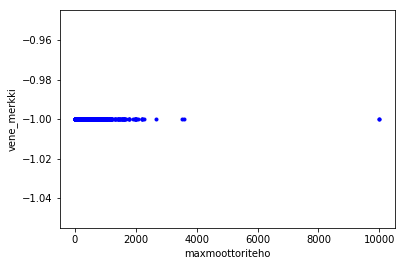

maxmoottoriteho tyyppi


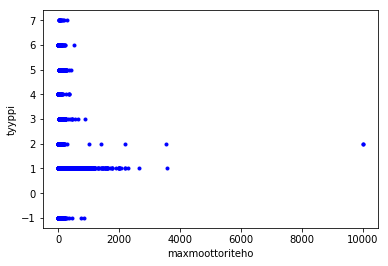

maxmoottoriteho runkotyyppi


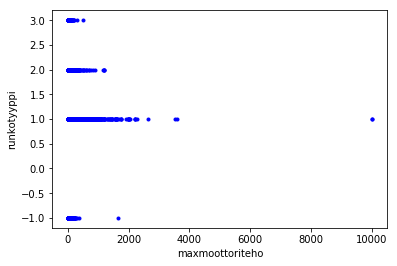

maxmoottoriteho kansirakenne


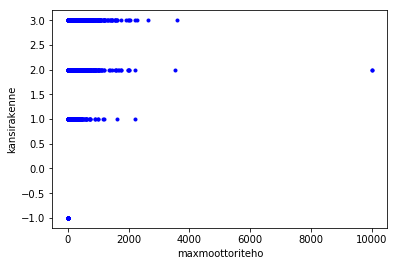

maxmoottoriteho rungonrakmat


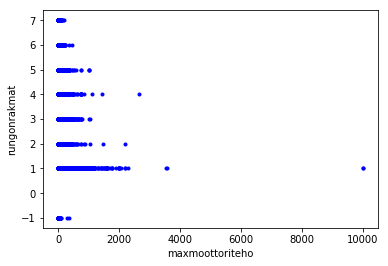

maxmoottoriteho maxhlolkm


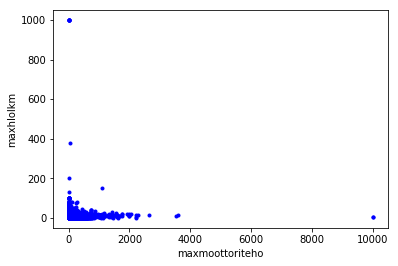

maxmoottoriteho runkopituus


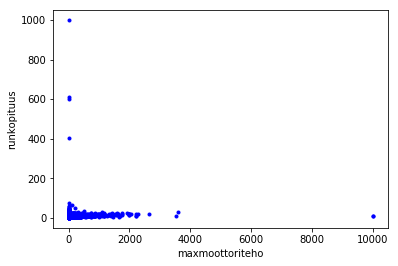

maxmoottoriteho maxleveys


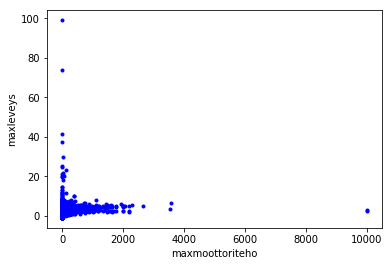

maxmoottoriteho syvays


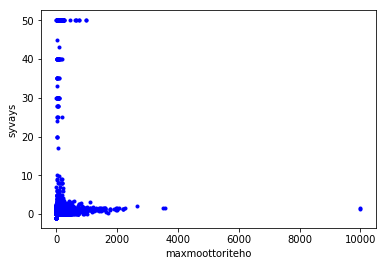

maxmoottoriteho kayttokunta_koodi


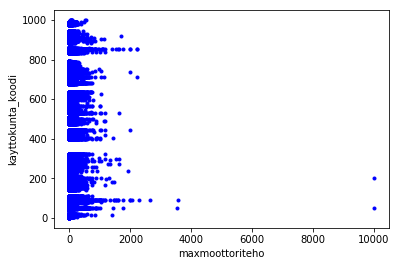

maxmoottoriteho jarnro


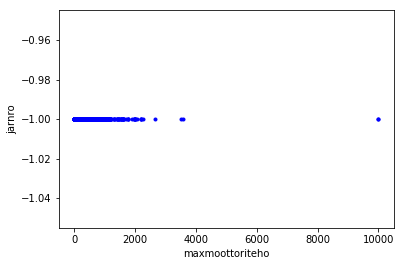

moottori_teho vuosimalli


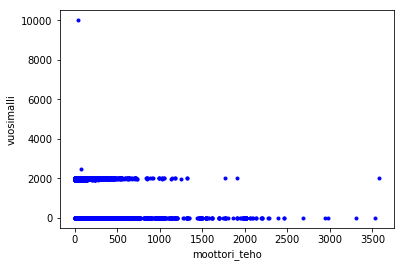

moottori_teho valmistusvuosi


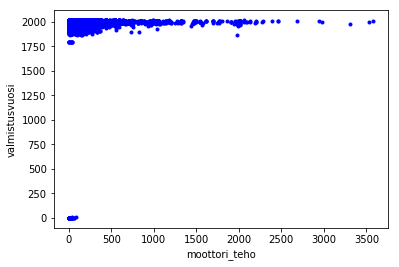

moottori_teho kayttoonottovuosi


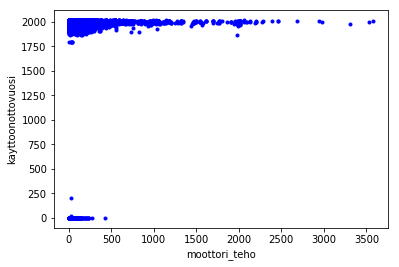

moottori_teho paavari


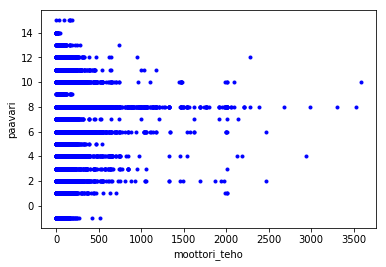

moottori_teho lisavari


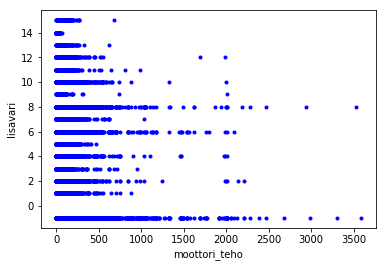

moottori_teho maxpituus


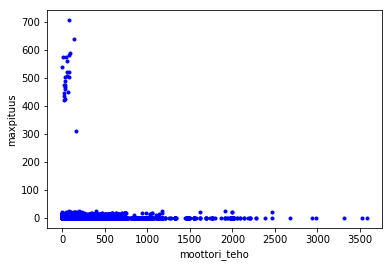

moottori_teho maxnopeus


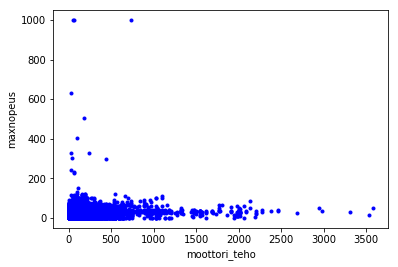

moottori_teho maxmoottoriteho


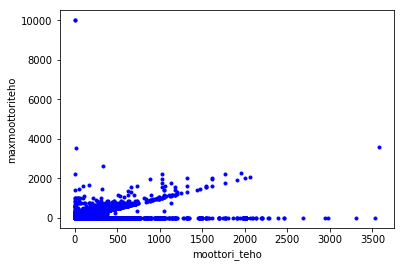

moottori_teho moottori_lkm


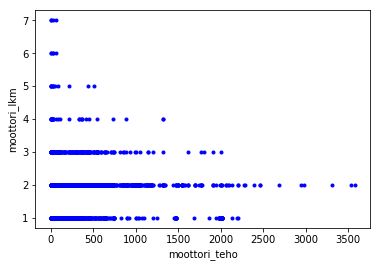

moottori_teho paino


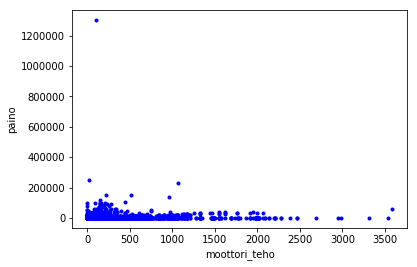

moottori_teho jokivene


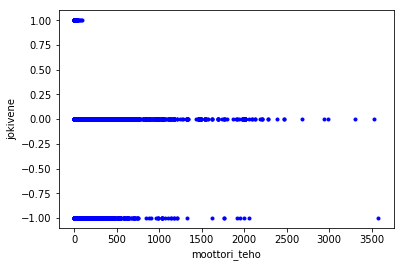

moottori_teho tenonvene


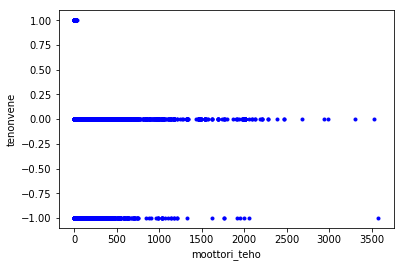

moottori_teho vene_malli


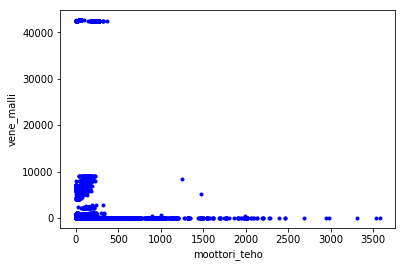

moottori_teho vene_merkki


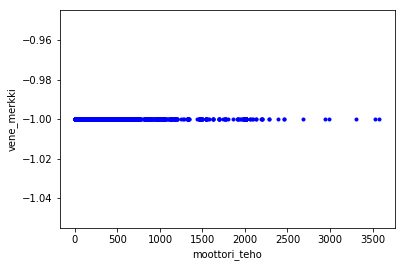

moottori_teho tyyppi


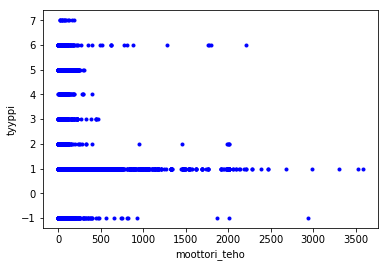

moottori_teho runkotyyppi


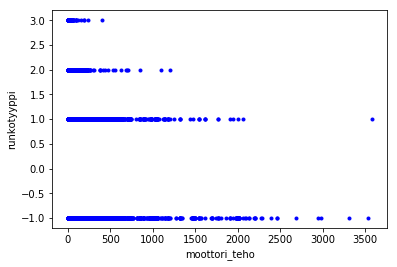

moottori_teho kansirakenne


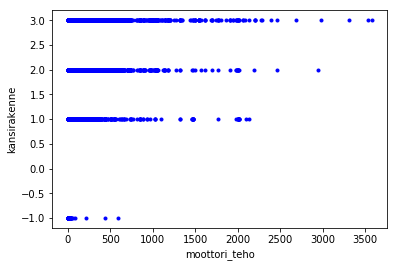

moottori_teho rungonrakmat


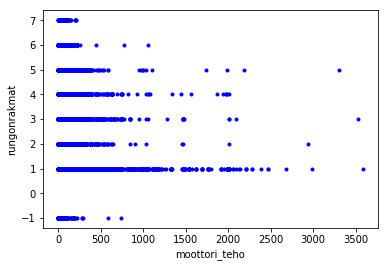

moottori_teho maxhlolkm


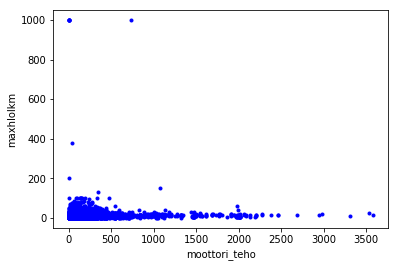

moottori_teho runkopituus


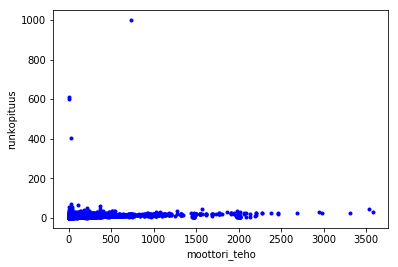

moottori_teho maxleveys


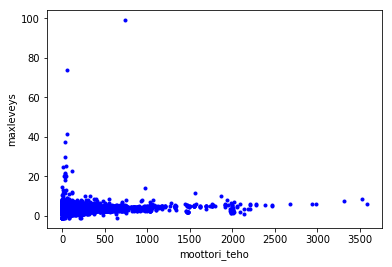

moottori_teho syvays


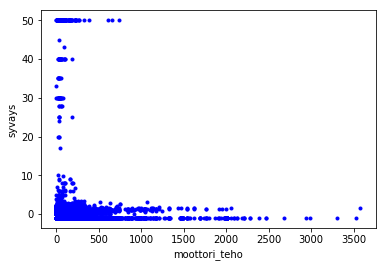

moottori_teho kayttokunta_koodi


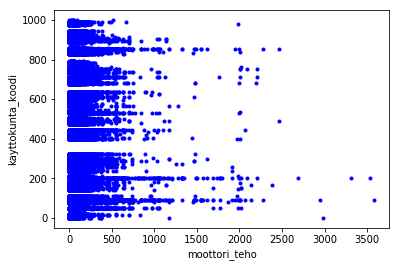

moottori_teho jarnro


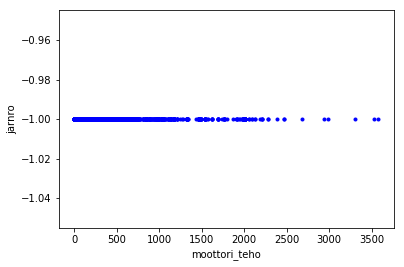

moottori_lkm vuosimalli


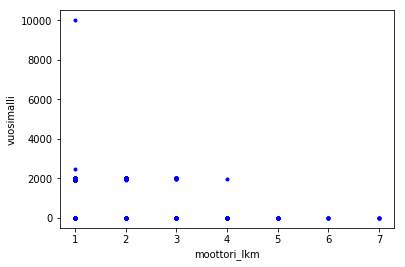

moottori_lkm valmistusvuosi


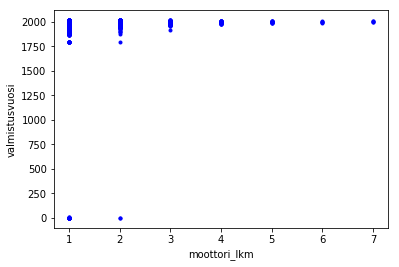

moottori_lkm kayttoonottovuosi


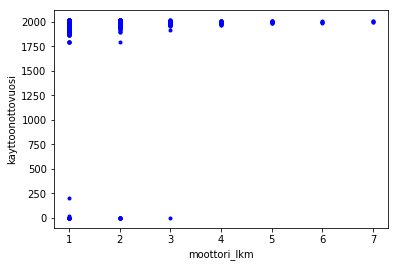

moottori_lkm paavari


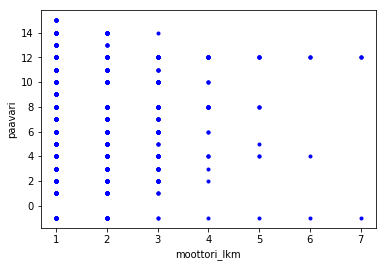

moottori_lkm lisavari


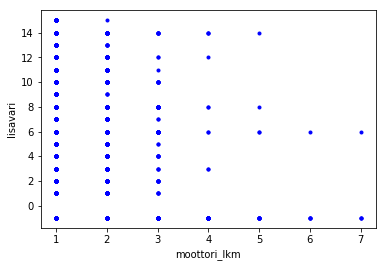

moottori_lkm maxpituus


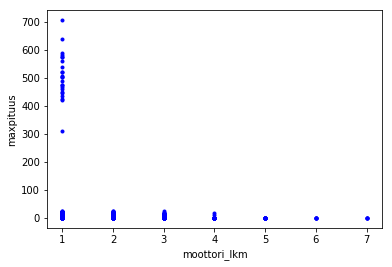

moottori_lkm maxnopeus


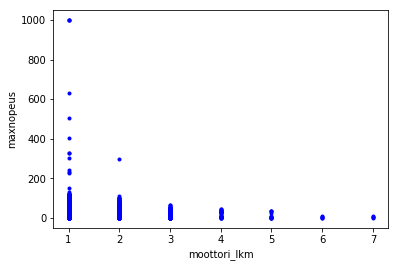

moottori_lkm maxmoottoriteho


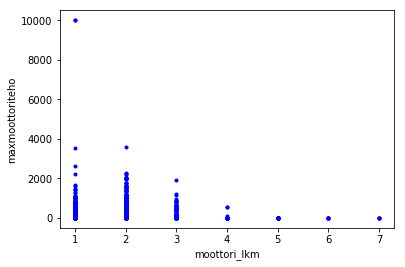

moottori_lkm moottori_teho


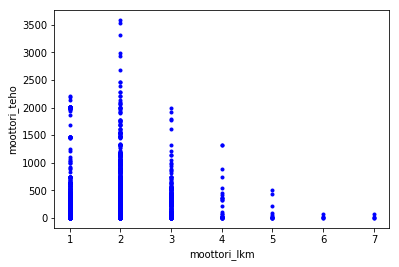

moottori_lkm paino


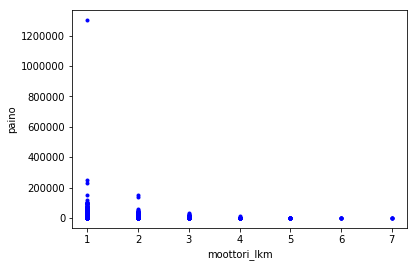

moottori_lkm jokivene


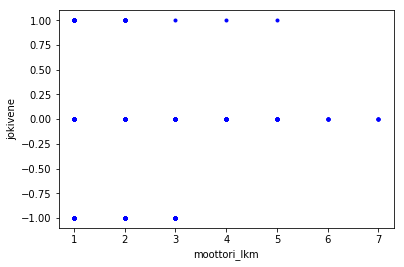

moottori_lkm tenonvene


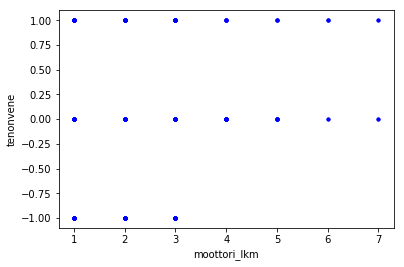

moottori_lkm vene_malli


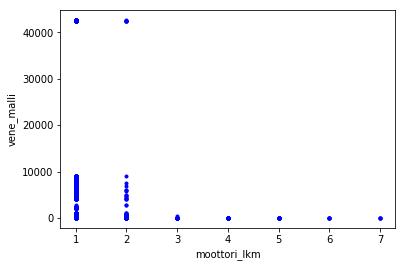

moottori_lkm vene_merkki


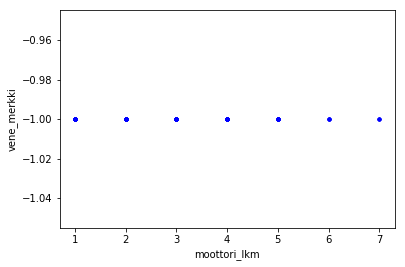

moottori_lkm tyyppi


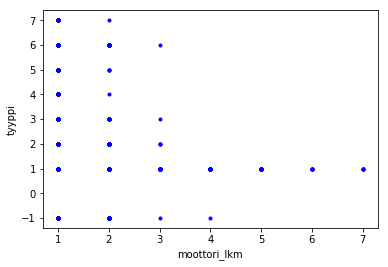

moottori_lkm runkotyyppi


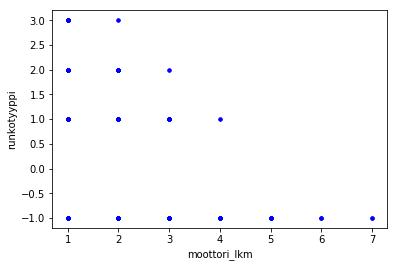

moottori_lkm kansirakenne


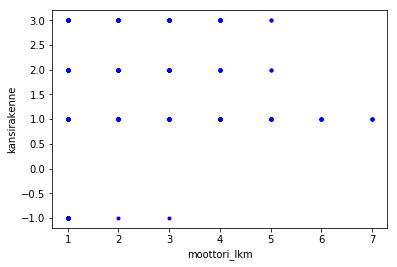

moottori_lkm rungonrakmat


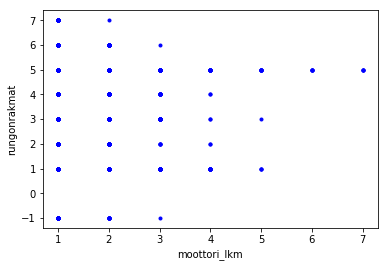

moottori_lkm maxhlolkm


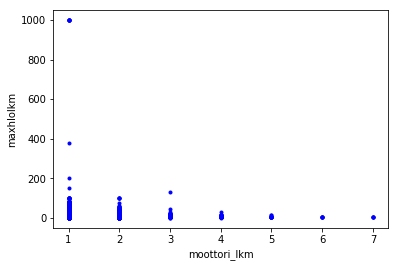

moottori_lkm runkopituus


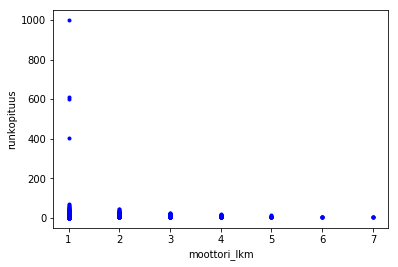

moottori_lkm maxleveys


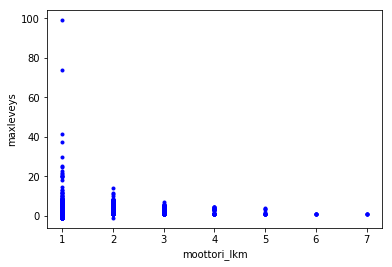

moottori_lkm syvays


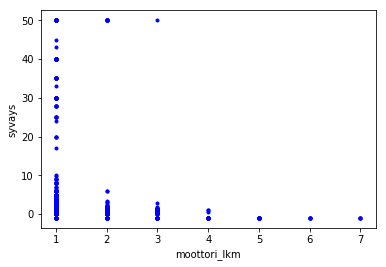

moottori_lkm kayttokunta_koodi


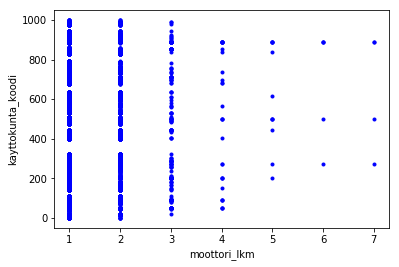

moottori_lkm jarnro


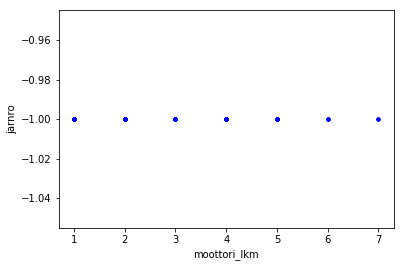

paino vuosimalli


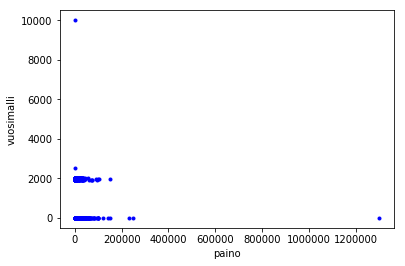

paino valmistusvuosi


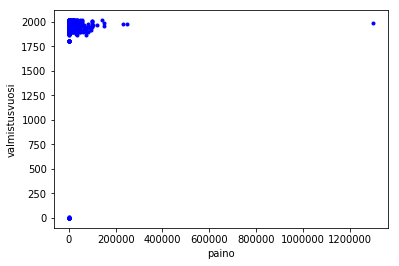

paino kayttoonottovuosi


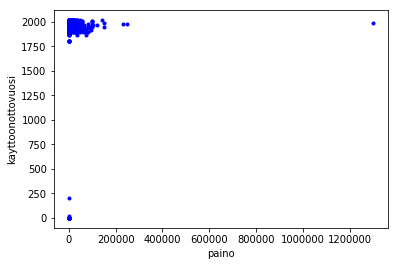

paino paavari


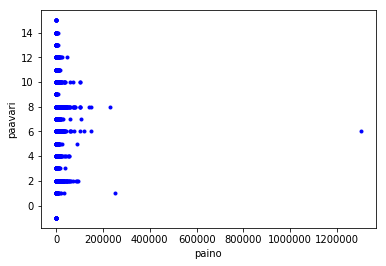

paino lisavari


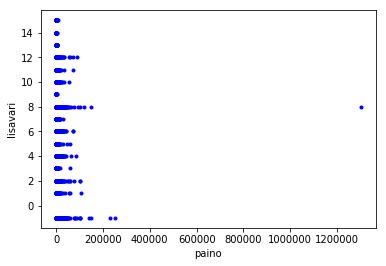

paino maxpituus


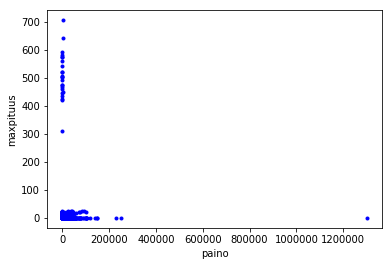

paino maxnopeus


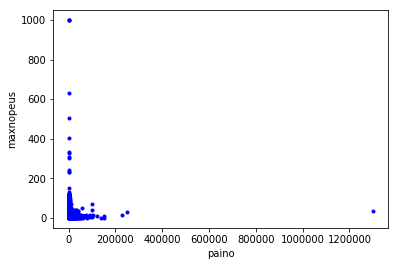

paino maxmoottoriteho


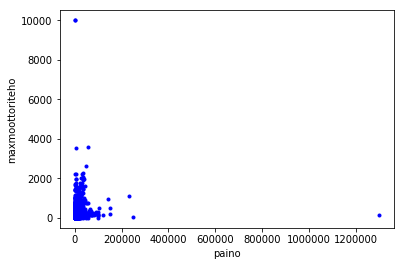

paino moottori_teho


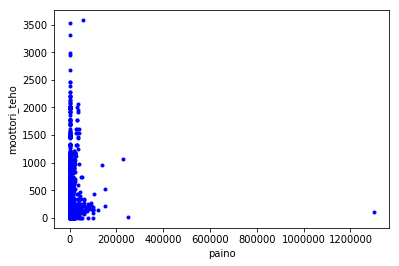

paino moottori_lkm


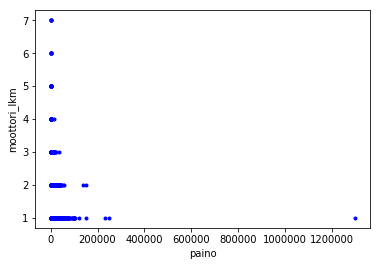

paino jokivene


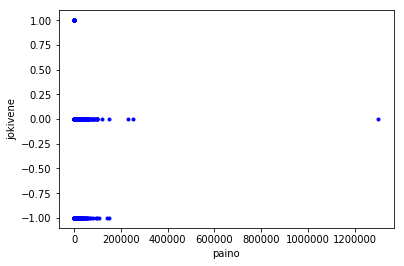

paino tenonvene


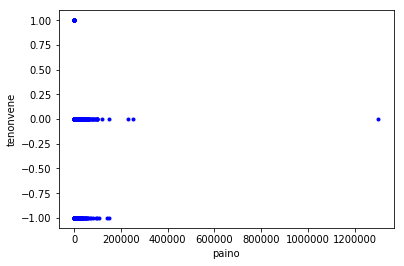

paino vene_malli


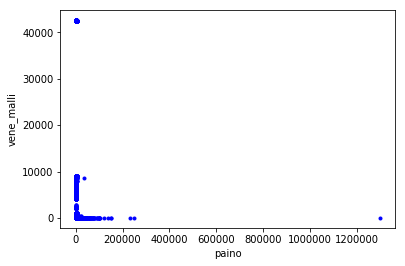

paino vene_merkki


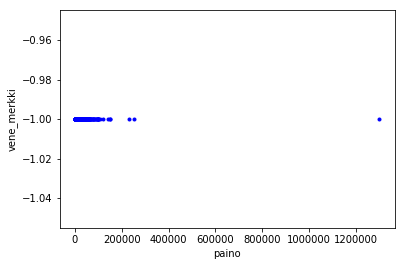

paino tyyppi


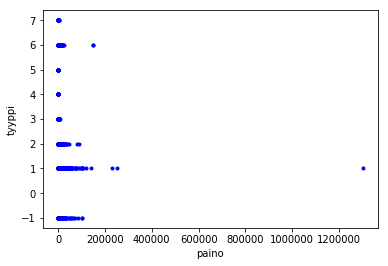

paino runkotyyppi


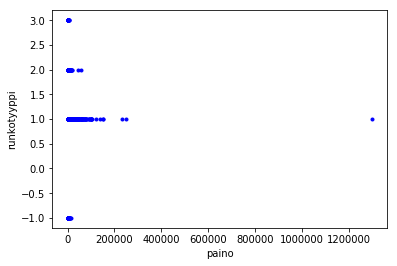

paino kansirakenne


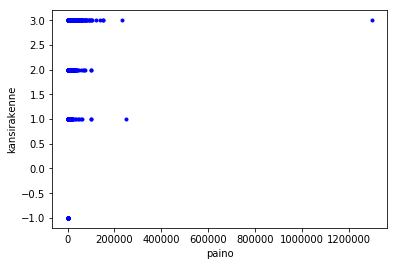

paino rungonrakmat


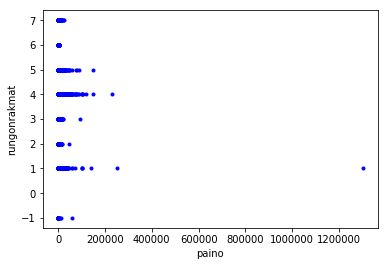

paino maxhlolkm


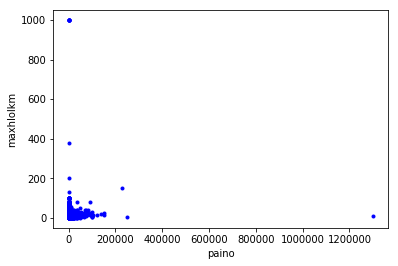

paino runkopituus


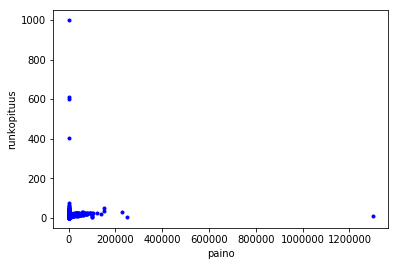

paino maxleveys


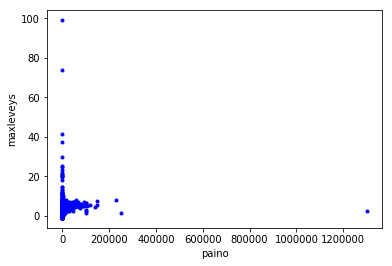

paino syvays


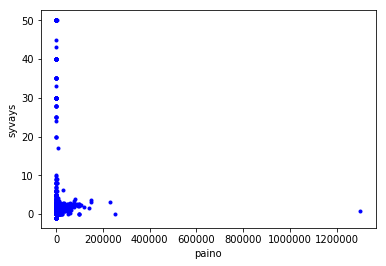

paino kayttokunta_koodi


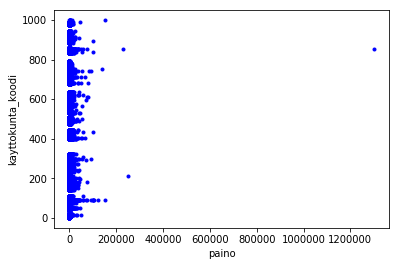

paino jarnro


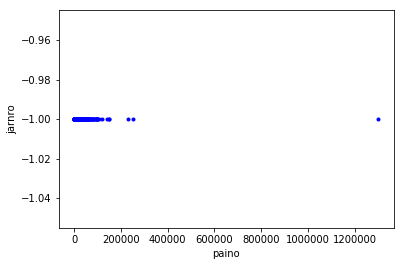

jokivene vuosimalli


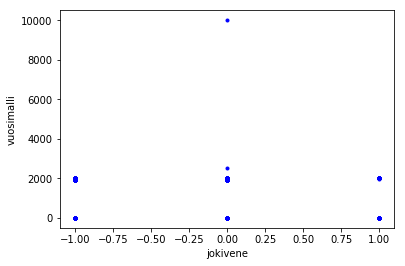

jokivene valmistusvuosi


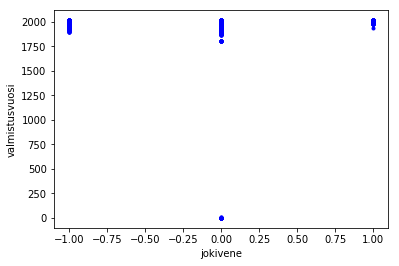

jokivene kayttoonottovuosi


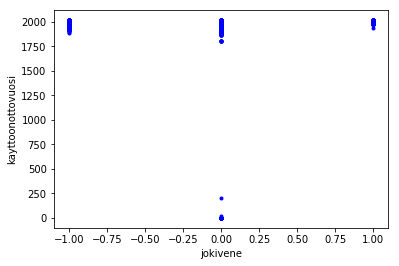

jokivene paavari


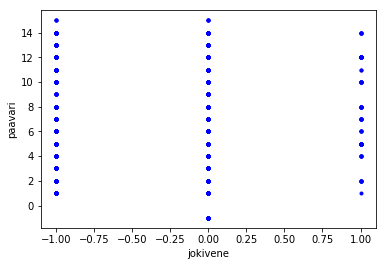

jokivene lisavari


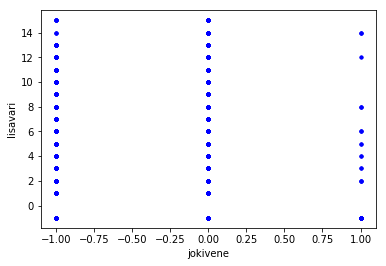

jokivene maxpituus


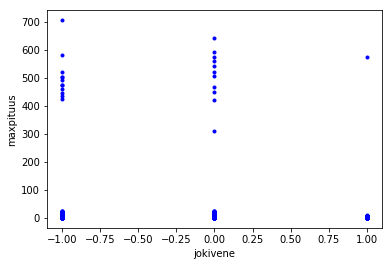

jokivene maxnopeus


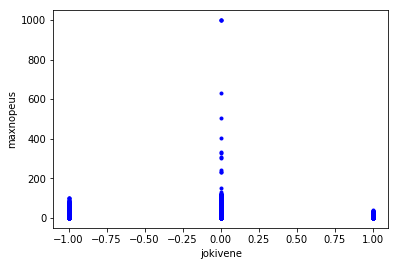

jokivene maxmoottoriteho


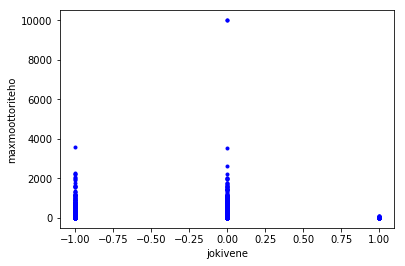

jokivene moottori_teho


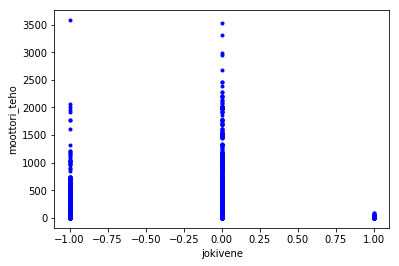

jokivene moottori_lkm


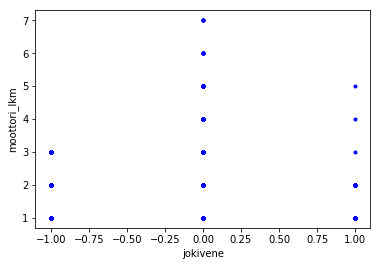

jokivene paino


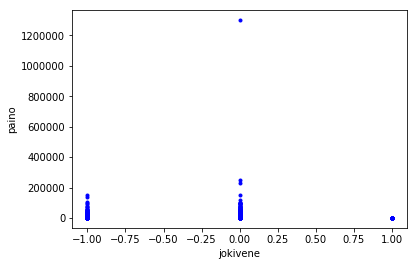

jokivene tenonvene


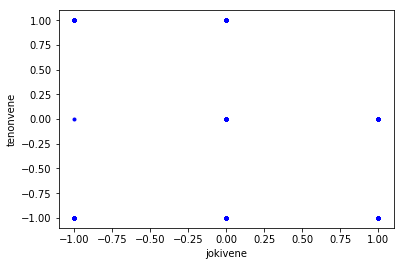

jokivene vene_malli


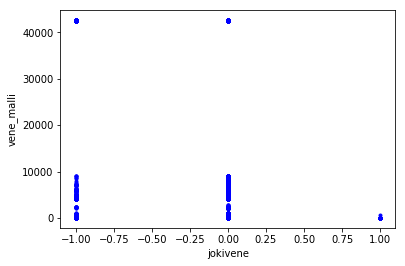

jokivene vene_merkki


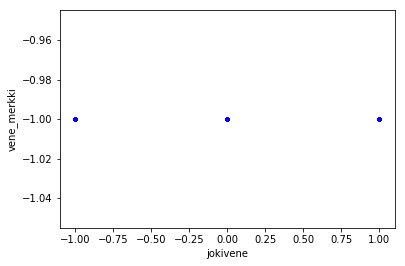

jokivene tyyppi


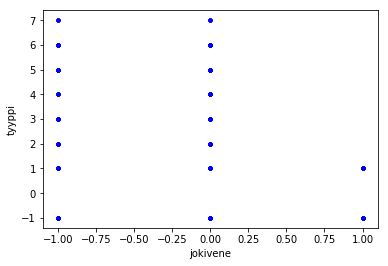

jokivene runkotyyppi


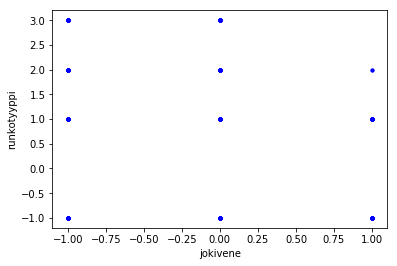

jokivene kansirakenne


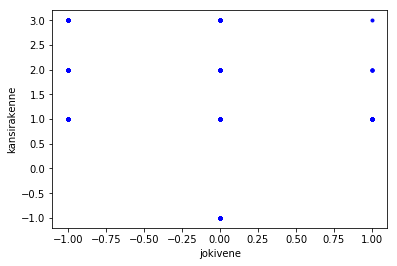

jokivene rungonrakmat


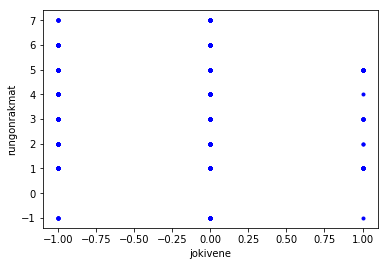

jokivene maxhlolkm


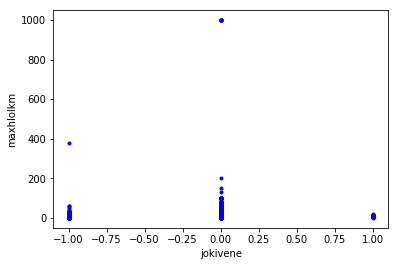

jokivene runkopituus


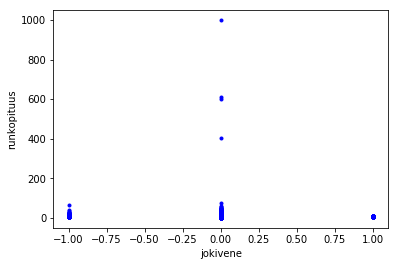

jokivene maxleveys


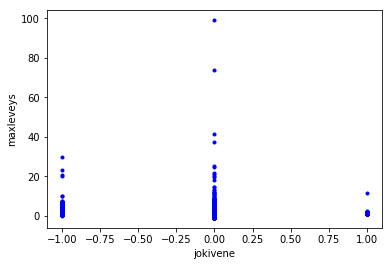

jokivene syvays


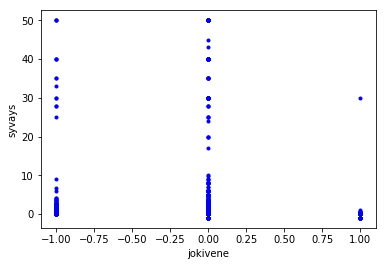

jokivene kayttokunta_koodi


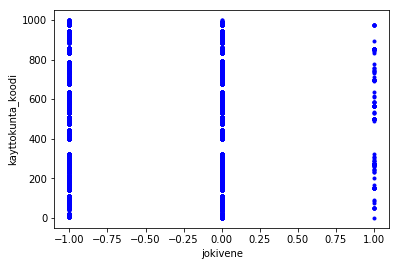

jokivene jarnro


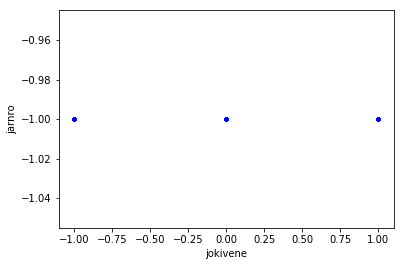

tenonvene vuosimalli


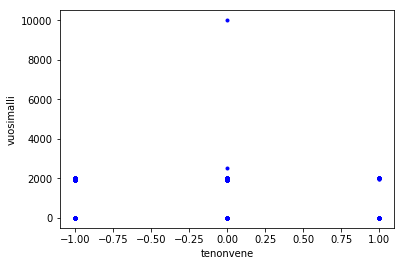

tenonvene valmistusvuosi


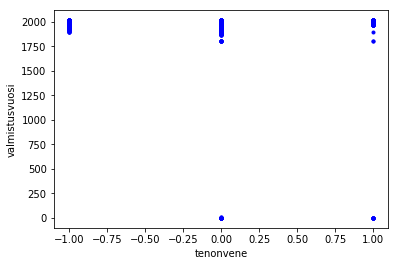

tenonvene kayttoonottovuosi


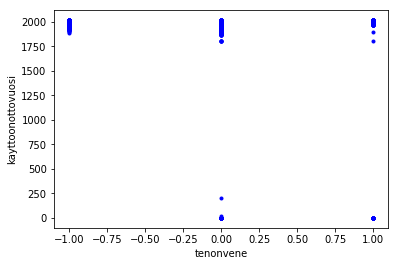

tenonvene paavari


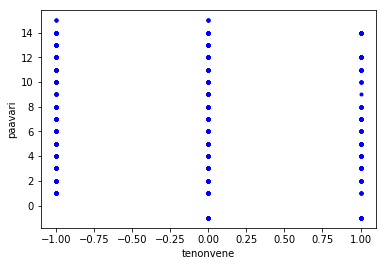

tenonvene lisavari


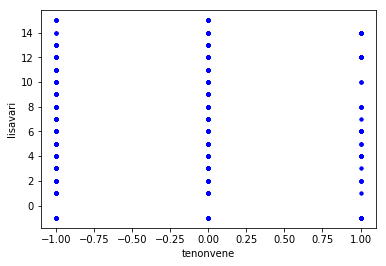

tenonvene maxpituus


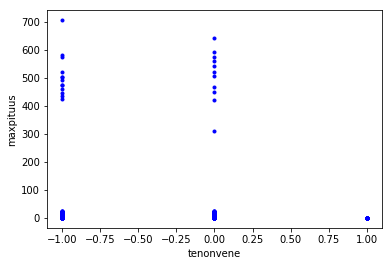

tenonvene maxnopeus


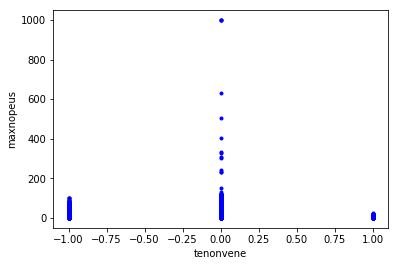

tenonvene maxmoottoriteho


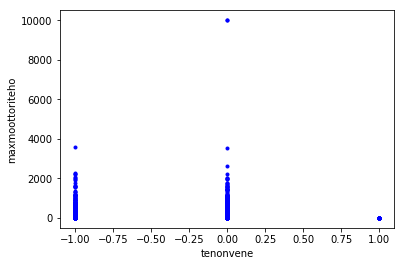

tenonvene moottori_teho


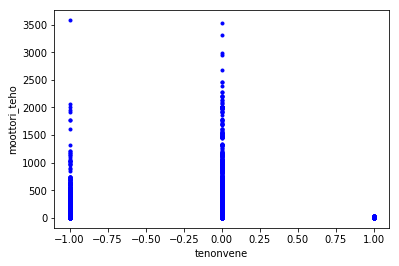

tenonvene moottori_lkm


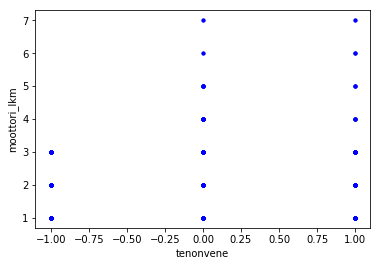

tenonvene paino


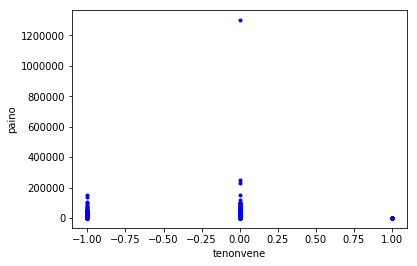

tenonvene jokivene


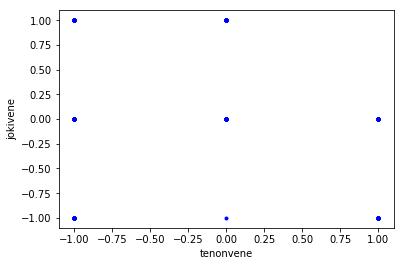

tenonvene vene_malli


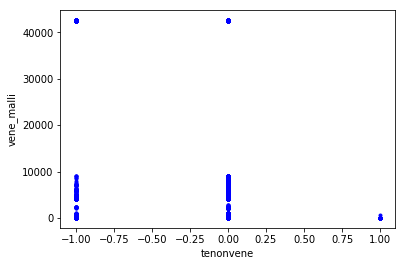

tenonvene vene_merkki


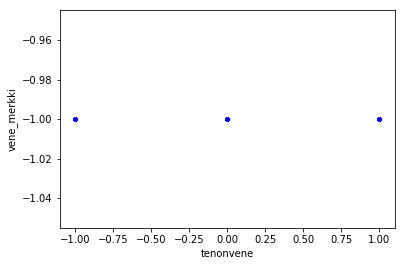

tenonvene tyyppi


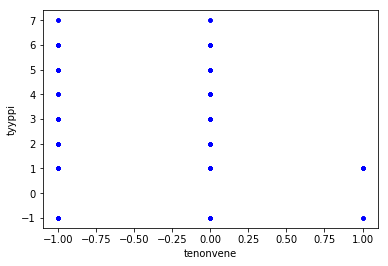

tenonvene runkotyyppi


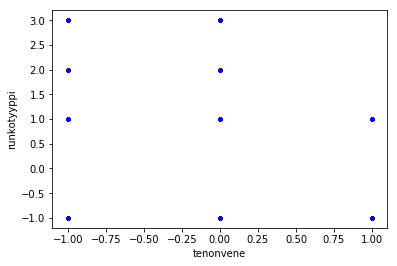

tenonvene kansirakenne


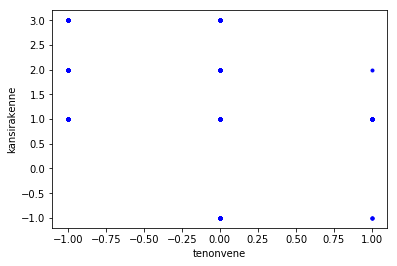

tenonvene rungonrakmat


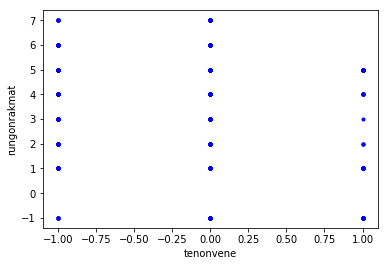

tenonvene maxhlolkm


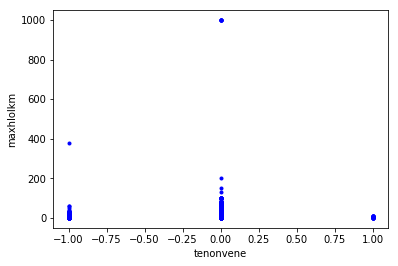

tenonvene runkopituus


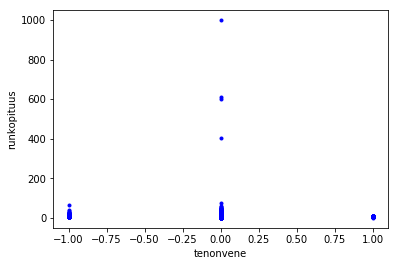

tenonvene maxleveys


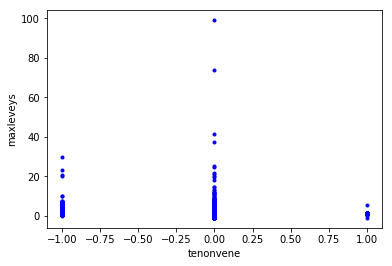

tenonvene syvays


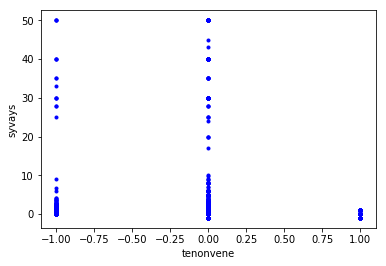

tenonvene kayttokunta_koodi


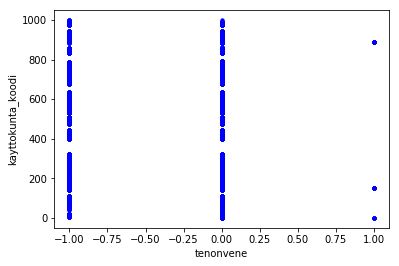

tenonvene jarnro


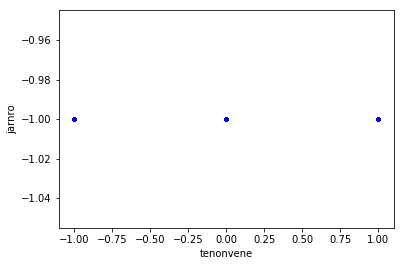

vene_malli vuosimalli


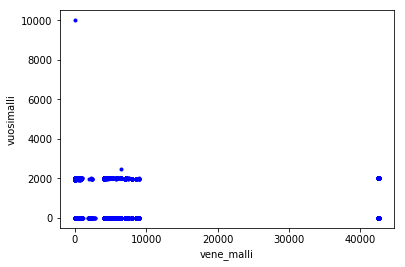

vene_malli valmistusvuosi


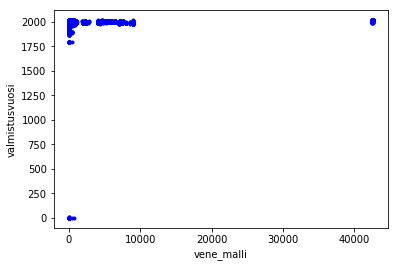

vene_malli kayttoonottovuosi


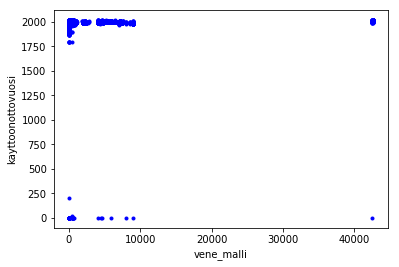

vene_malli paavari


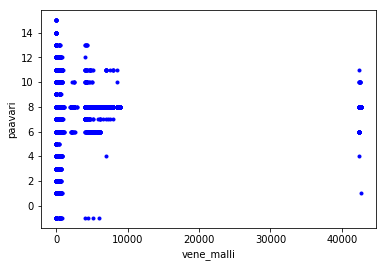

vene_malli lisavari


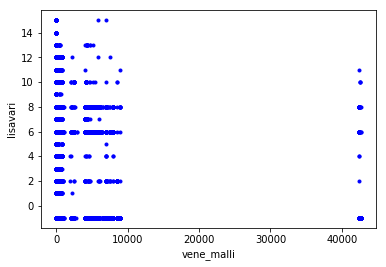

vene_malli maxpituus


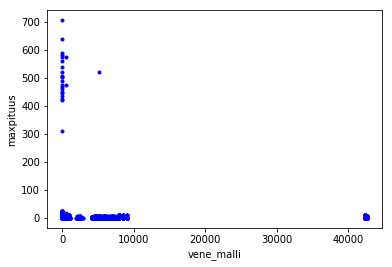

vene_malli maxnopeus


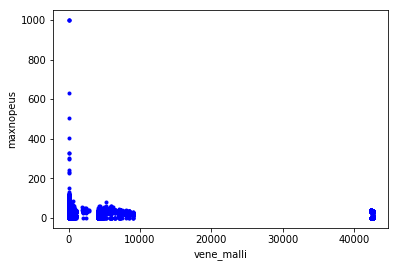

vene_malli maxmoottoriteho


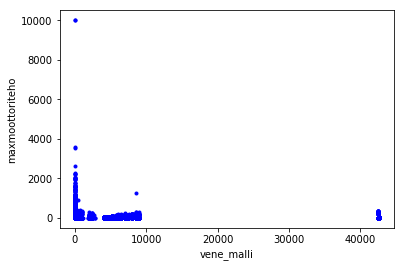

vene_malli moottori_teho


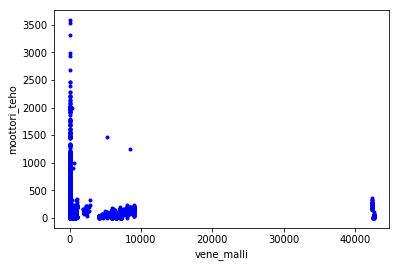

vene_malli moottori_lkm


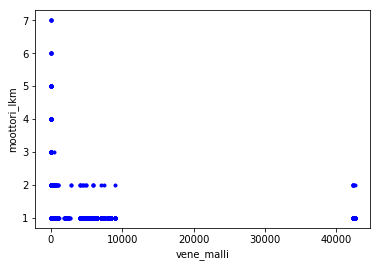

vene_malli paino


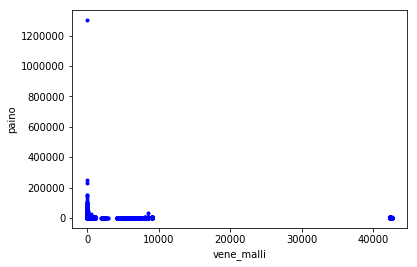

vene_malli jokivene


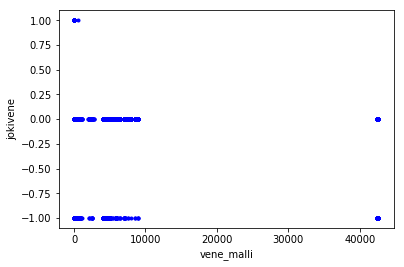

vene_malli tenonvene


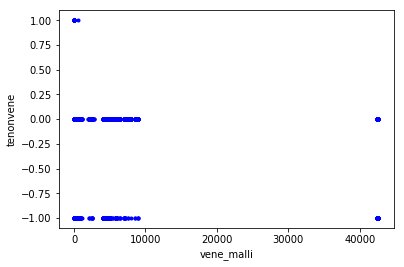

vene_malli vene_merkki


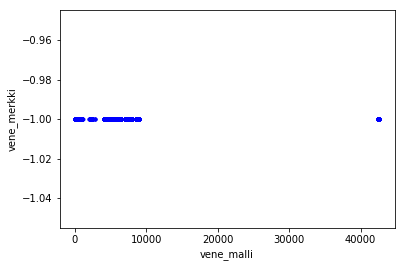

vene_malli tyyppi


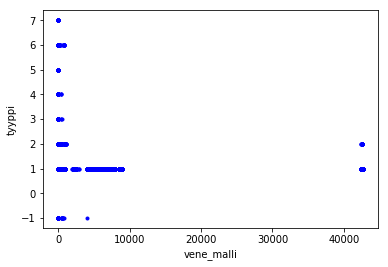

vene_malli runkotyyppi


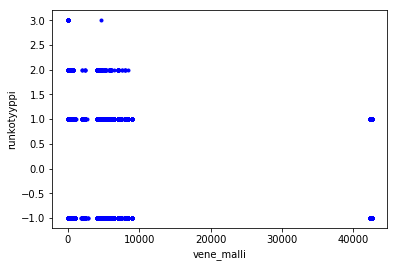

vene_malli kansirakenne


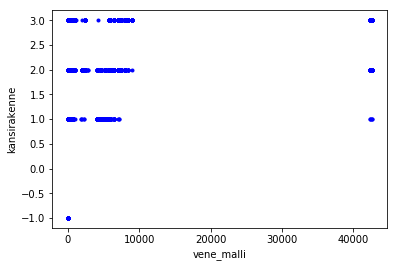

vene_malli rungonrakmat


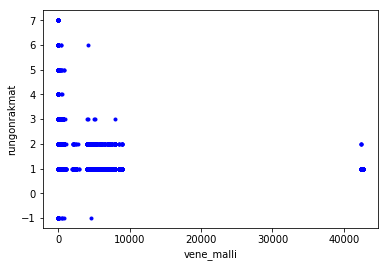

vene_malli maxhlolkm


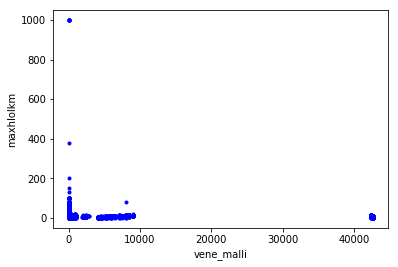

vene_malli runkopituus


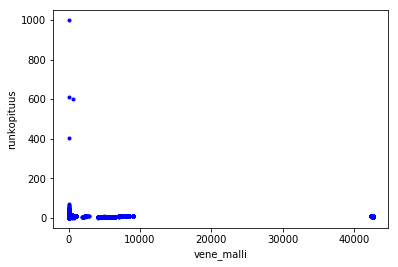

vene_malli maxleveys


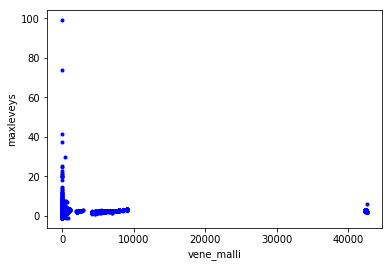

vene_malli syvays


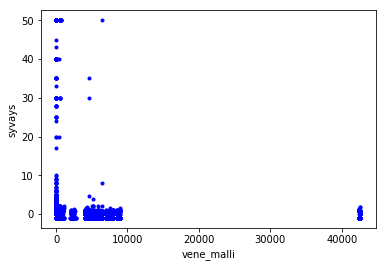

vene_malli kayttokunta_koodi


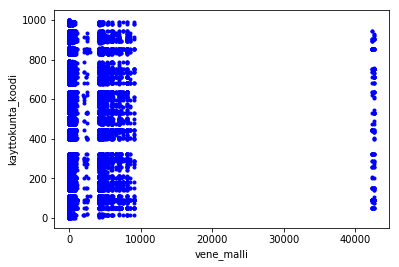

vene_malli jarnro


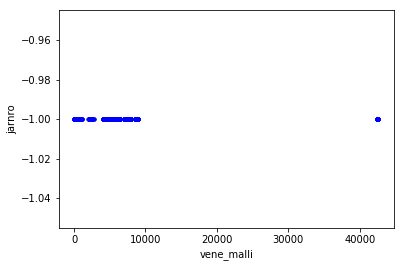

vene_merkki vuosimalli


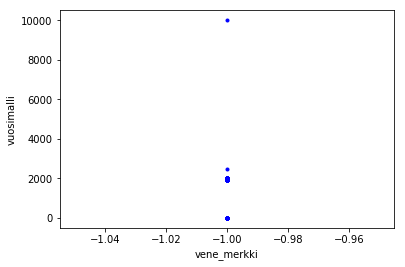

vene_merkki valmistusvuosi


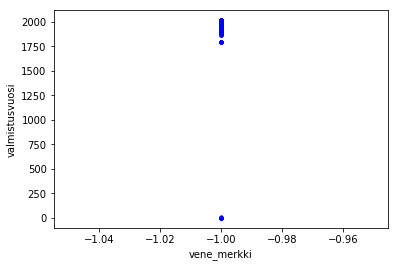

vene_merkki kayttoonottovuosi


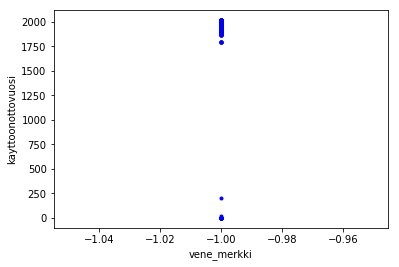

vene_merkki paavari


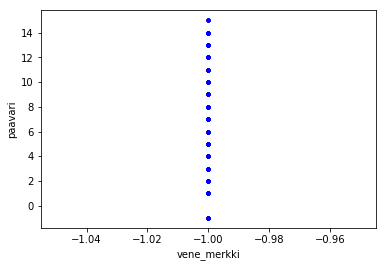

vene_merkki lisavari


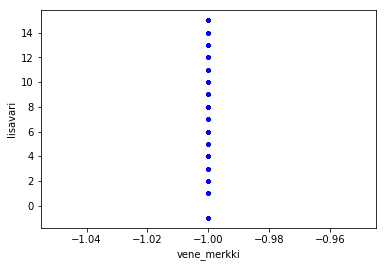

vene_merkki maxpituus


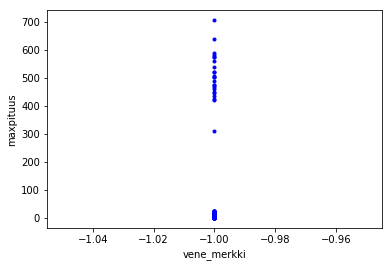

vene_merkki maxnopeus


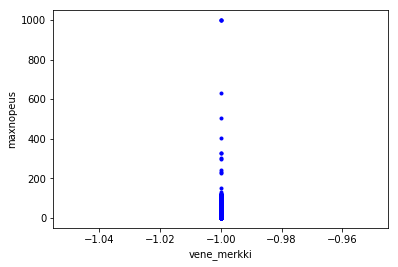

vene_merkki maxmoottoriteho


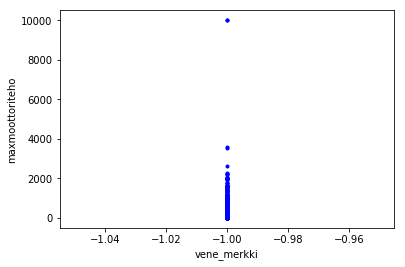

vene_merkki moottori_teho


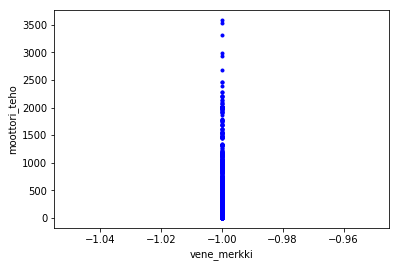

vene_merkki moottori_lkm


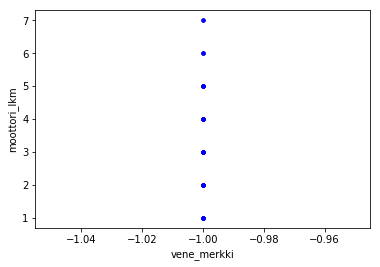

vene_merkki paino


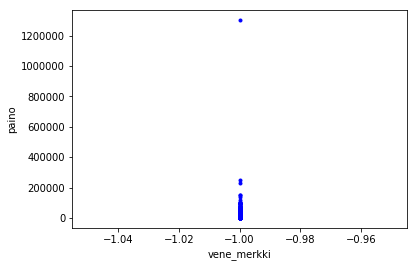

vene_merkki jokivene


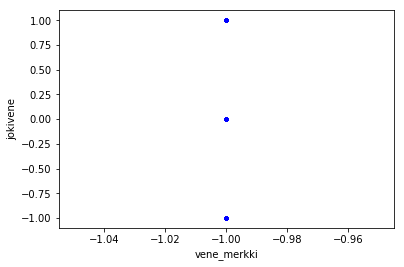

vene_merkki tenonvene


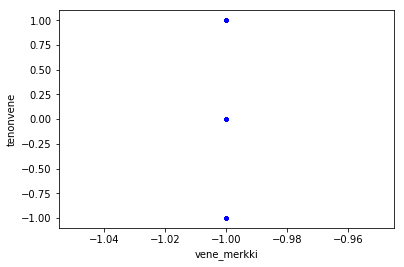

vene_merkki vene_malli


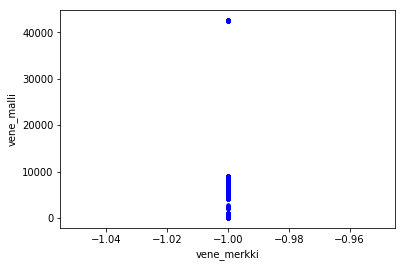

vene_merkki tyyppi


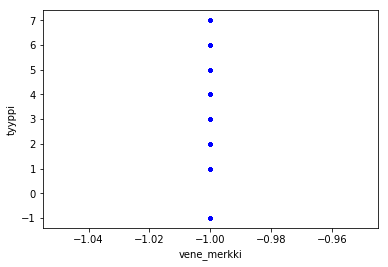

vene_merkki runkotyyppi


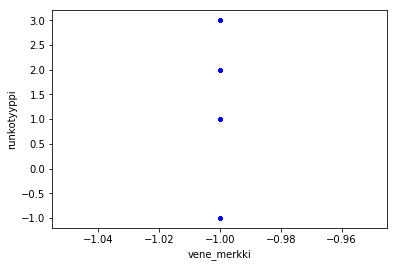

vene_merkki kansirakenne


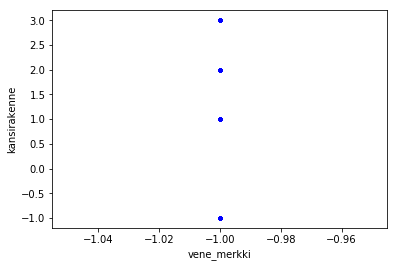

vene_merkki rungonrakmat


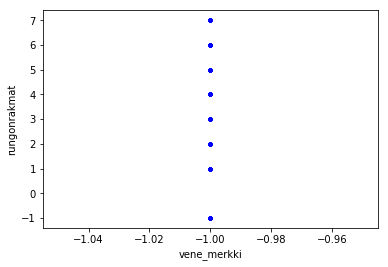

vene_merkki maxhlolkm


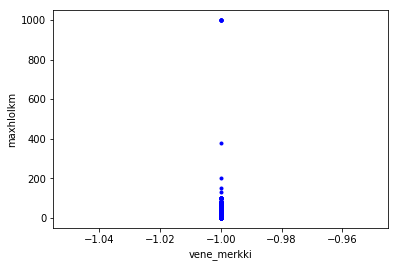

vene_merkki runkopituus


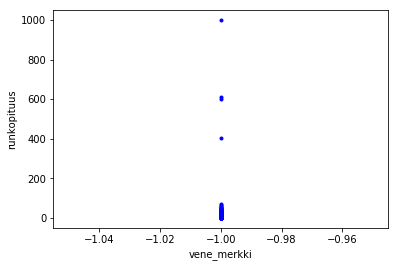

vene_merkki maxleveys


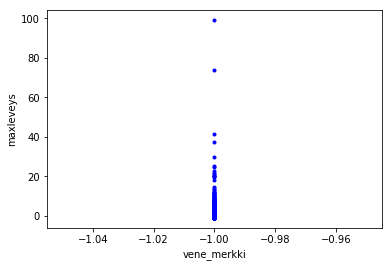

vene_merkki syvays


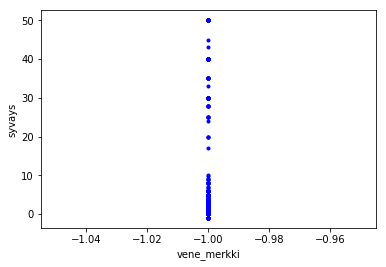

vene_merkki kayttokunta_koodi


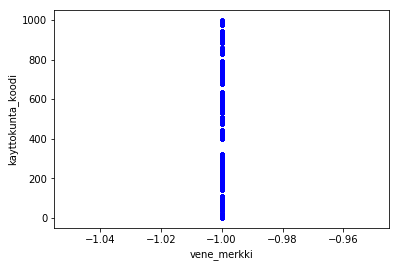

vene_merkki jarnro


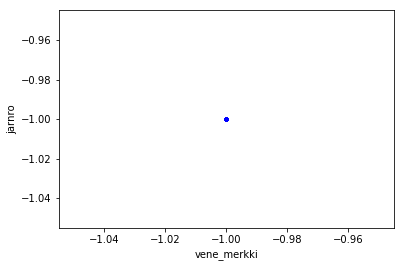

tyyppi vuosimalli


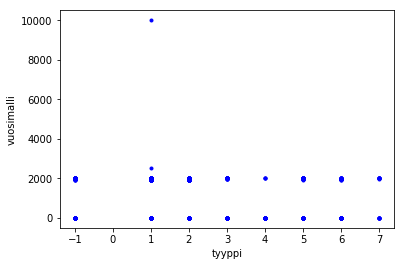

tyyppi valmistusvuosi


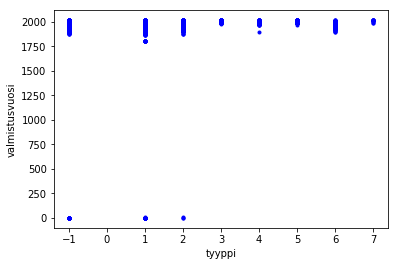

tyyppi kayttoonottovuosi


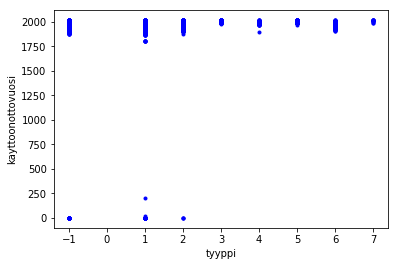

tyyppi paavari


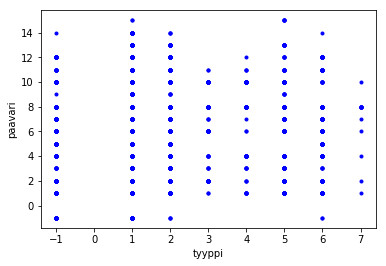

tyyppi lisavari


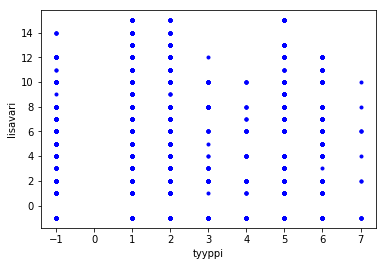

tyyppi maxpituus


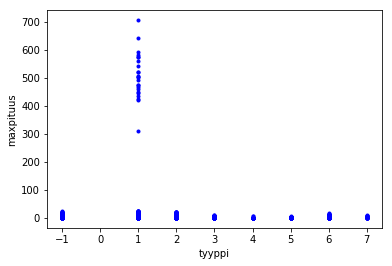

tyyppi maxnopeus


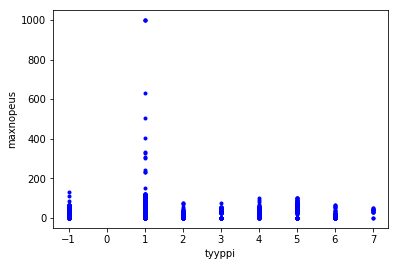

tyyppi maxmoottoriteho


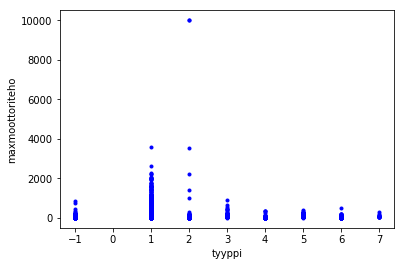

tyyppi moottori_teho


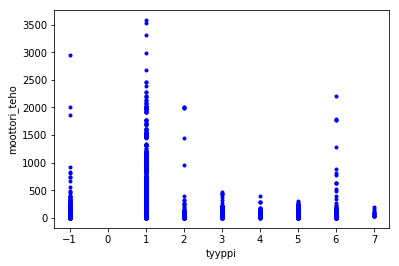

tyyppi moottori_lkm


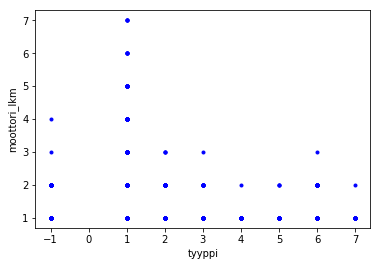

tyyppi paino


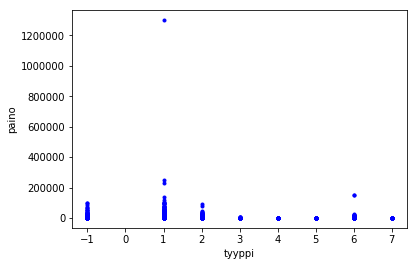

tyyppi jokivene


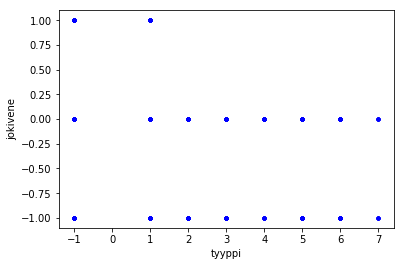

tyyppi tenonvene


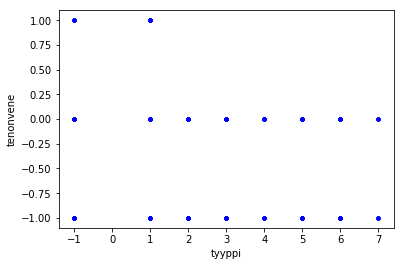

tyyppi vene_malli


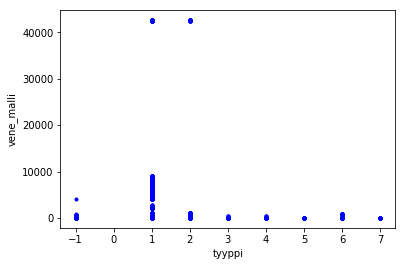

tyyppi vene_merkki


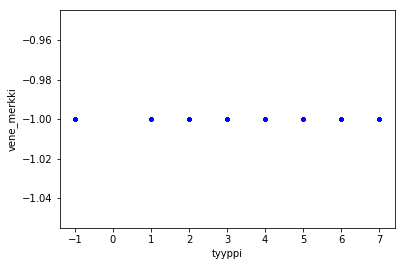

tyyppi runkotyyppi


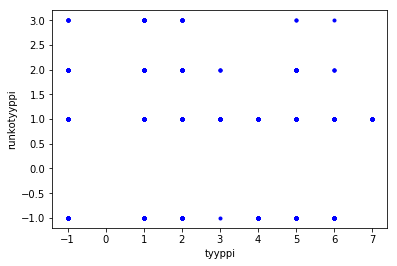

tyyppi kansirakenne


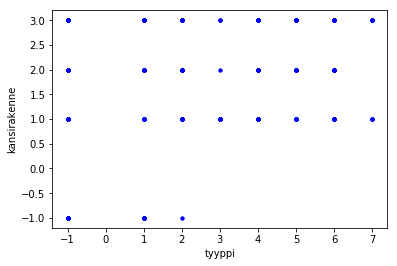

tyyppi rungonrakmat


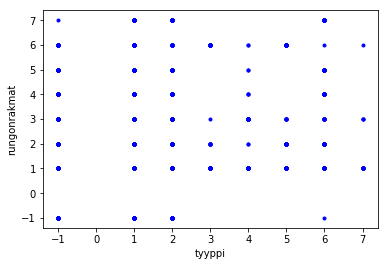

tyyppi maxhlolkm


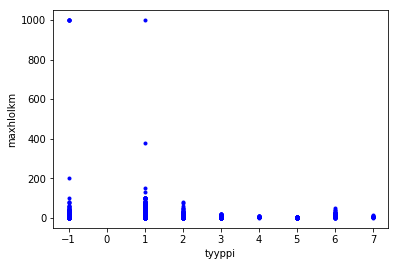

tyyppi runkopituus


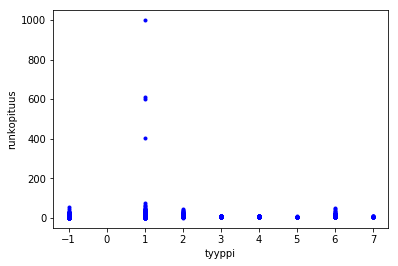

tyyppi maxleveys


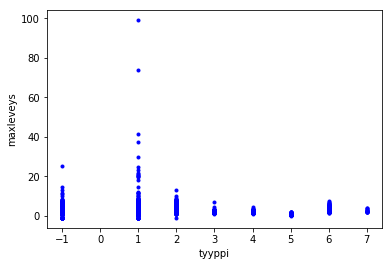

tyyppi syvays


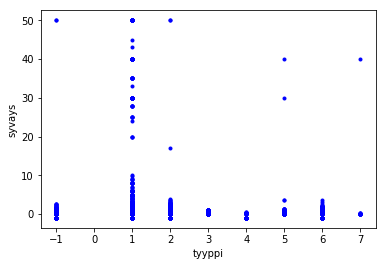

tyyppi kayttokunta_koodi


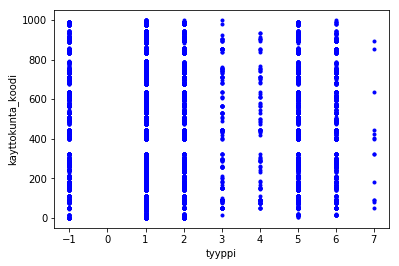

tyyppi jarnro


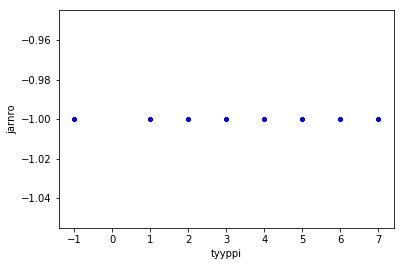

runkotyyppi vuosimalli


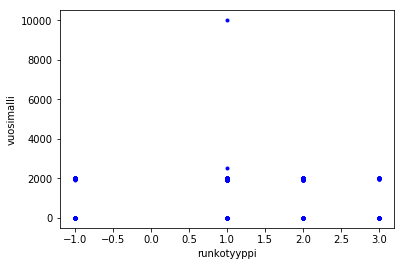

runkotyyppi valmistusvuosi


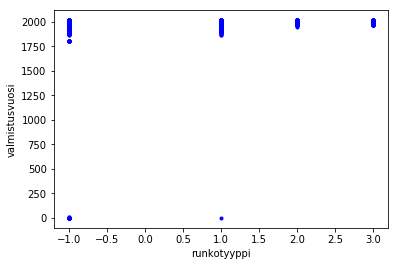

runkotyyppi kayttoonottovuosi


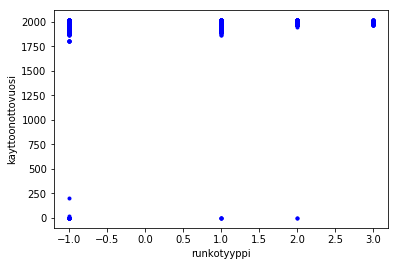

runkotyyppi paavari


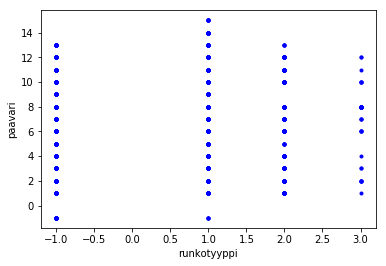

runkotyyppi lisavari


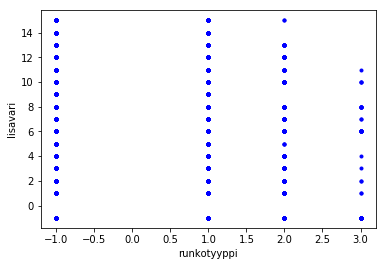

runkotyyppi maxpituus


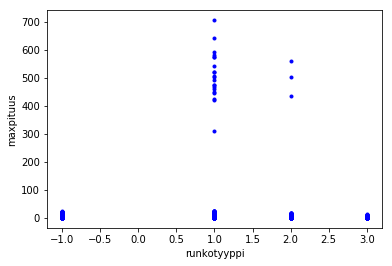

runkotyyppi maxnopeus


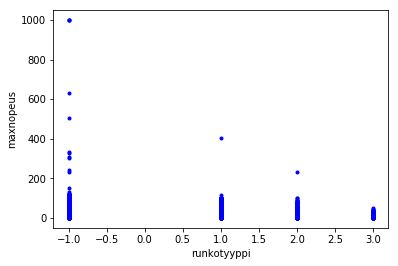

runkotyyppi maxmoottoriteho


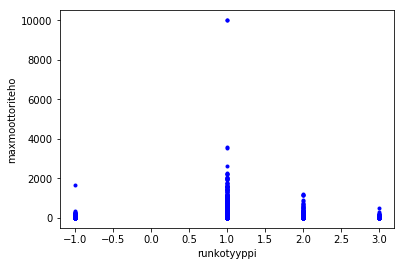

runkotyyppi moottori_teho


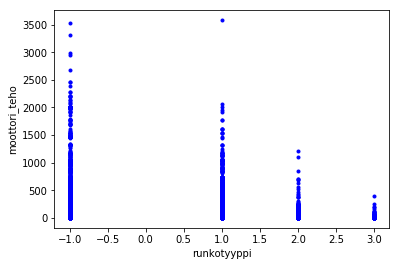

runkotyyppi moottori_lkm


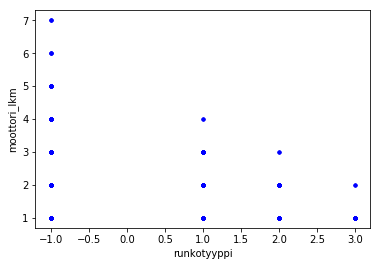

runkotyyppi paino


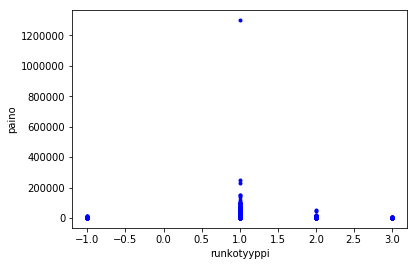

runkotyyppi jokivene


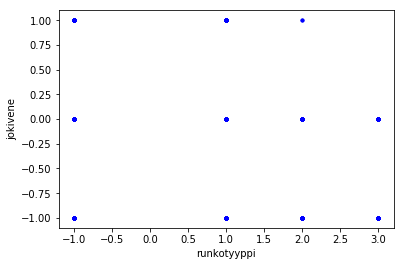

runkotyyppi tenonvene


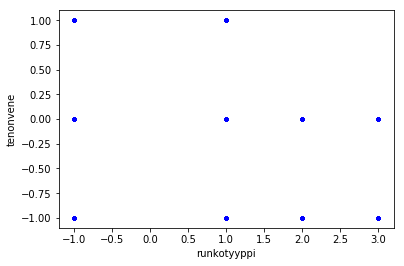

runkotyyppi vene_malli


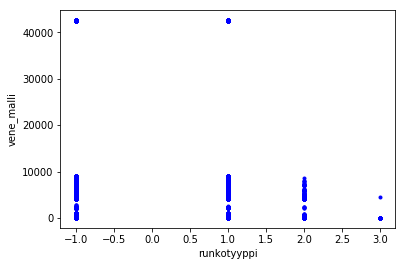

runkotyyppi vene_merkki


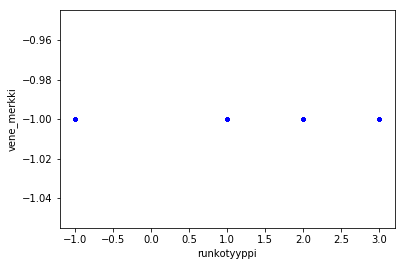

runkotyyppi tyyppi


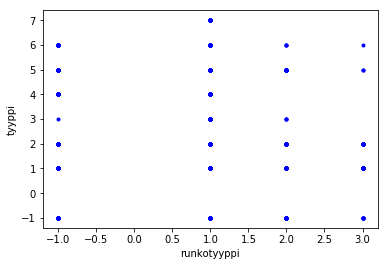

runkotyyppi kansirakenne


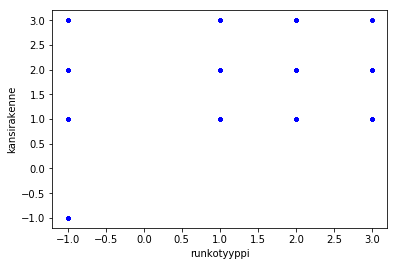

runkotyyppi rungonrakmat


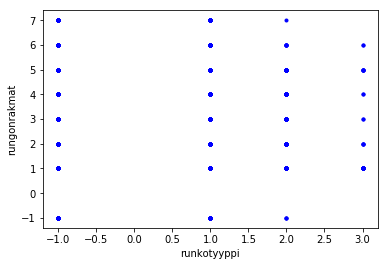

runkotyyppi maxhlolkm


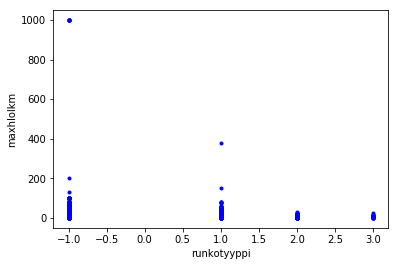

runkotyyppi runkopituus


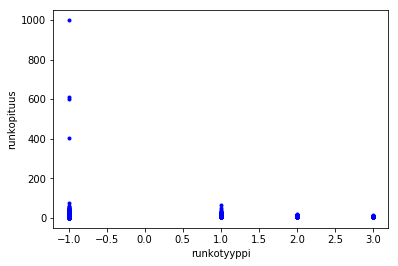

runkotyyppi maxleveys


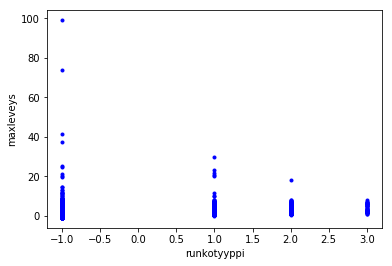

runkotyyppi syvays


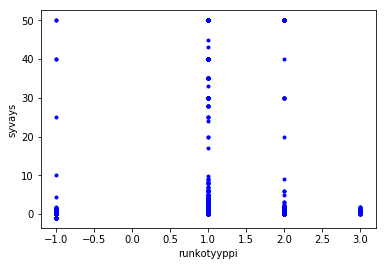

runkotyyppi kayttokunta_koodi


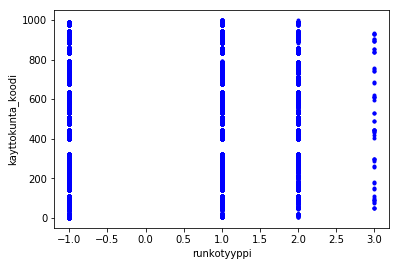

runkotyyppi jarnro


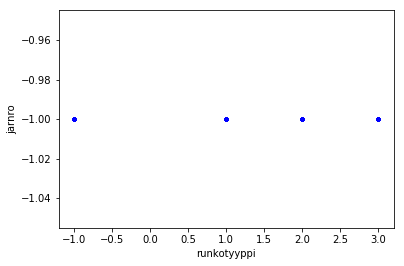

kansirakenne vuosimalli


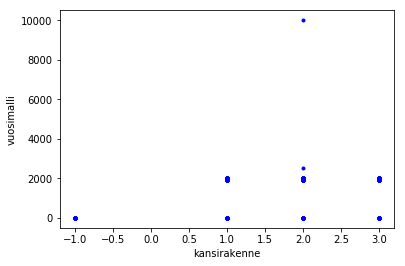

kansirakenne valmistusvuosi


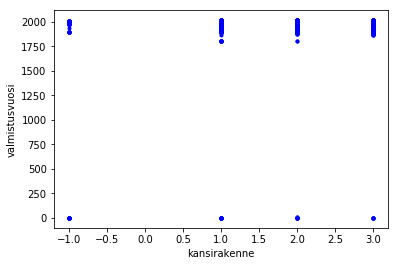

kansirakenne kayttoonottovuosi


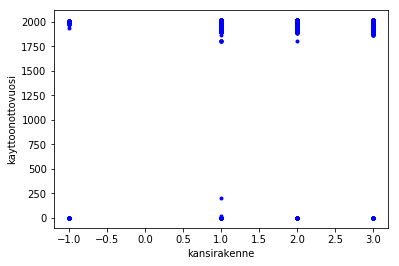

kansirakenne paavari


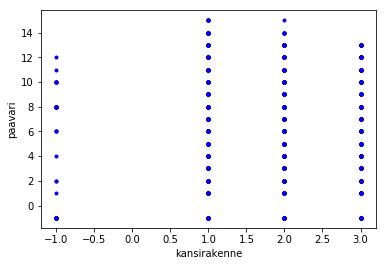

kansirakenne lisavari


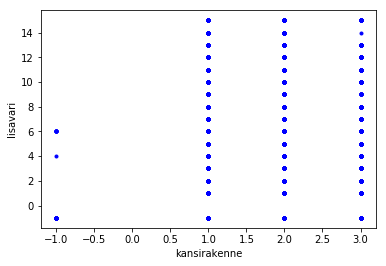

kansirakenne maxpituus


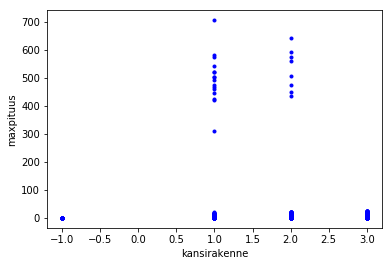

kansirakenne maxnopeus


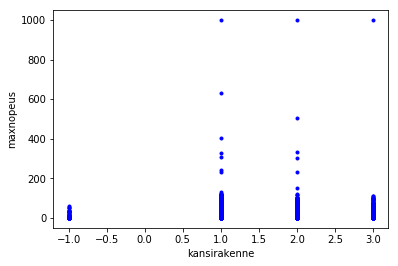

kansirakenne maxmoottoriteho


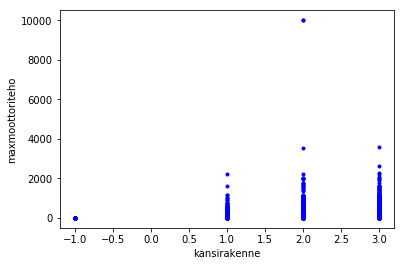

kansirakenne moottori_teho


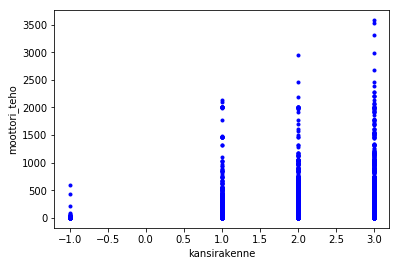

kansirakenne moottori_lkm


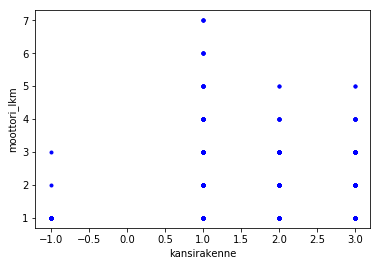

kansirakenne paino


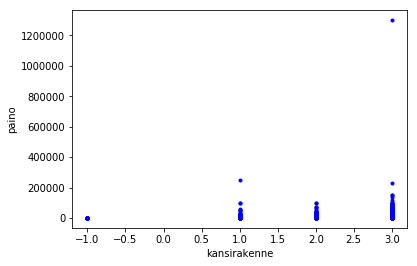

kansirakenne jokivene


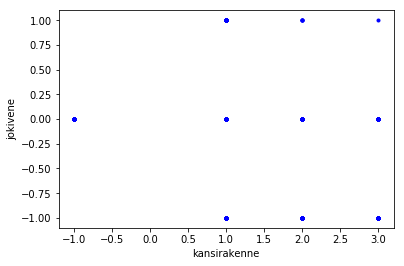

kansirakenne tenonvene


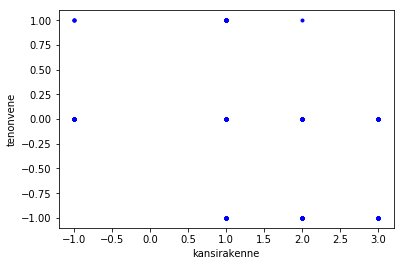

kansirakenne vene_malli


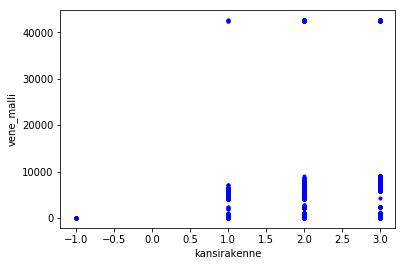

kansirakenne vene_merkki


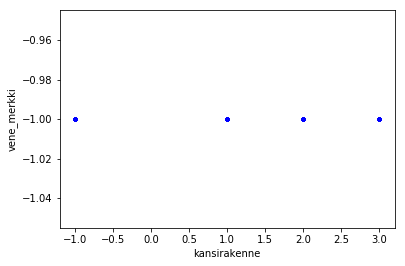

kansirakenne tyyppi


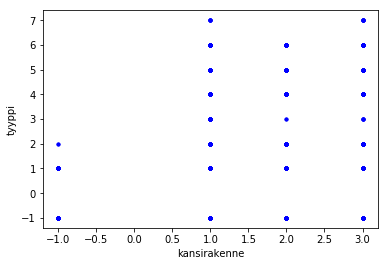

kansirakenne runkotyyppi


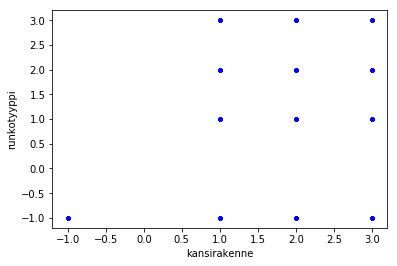

kansirakenne rungonrakmat


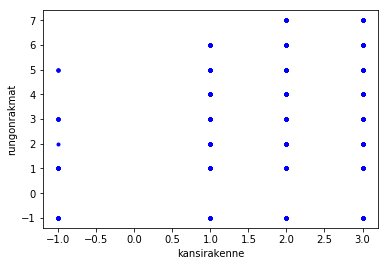

kansirakenne maxhlolkm


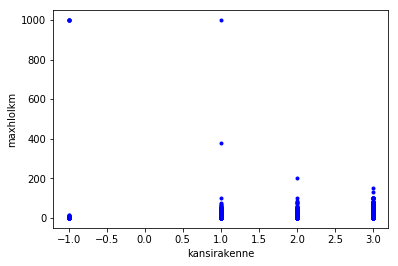

kansirakenne runkopituus


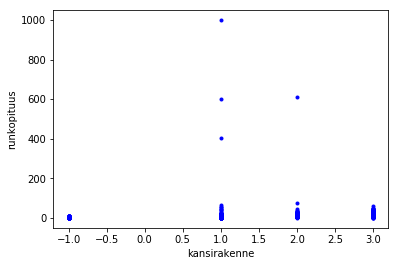

kansirakenne maxleveys


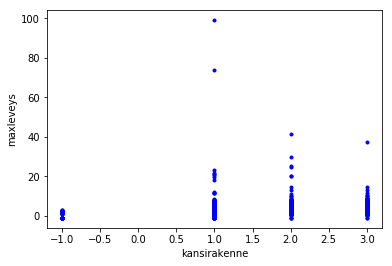

kansirakenne syvays


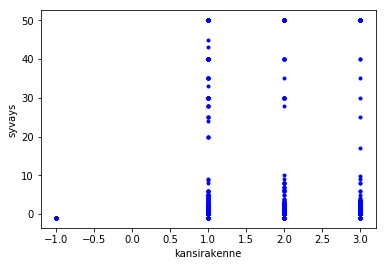

kansirakenne kayttokunta_koodi


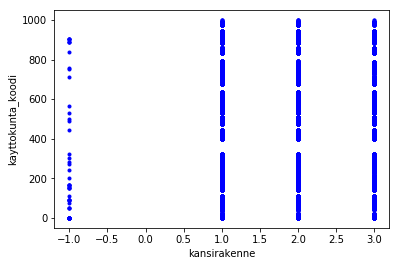

kansirakenne jarnro


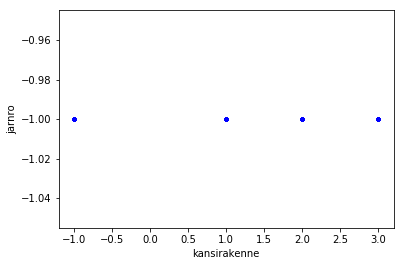

rungonrakmat vuosimalli


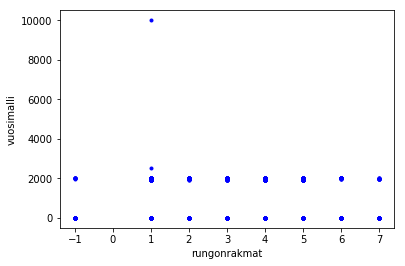

rungonrakmat valmistusvuosi


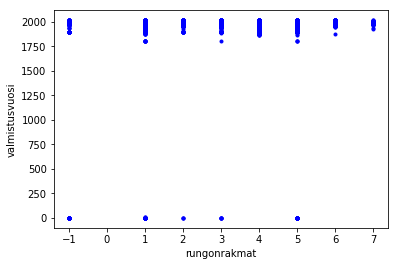

rungonrakmat kayttoonottovuosi


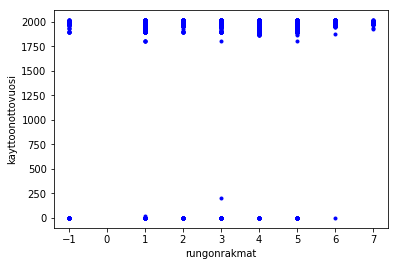

rungonrakmat paavari


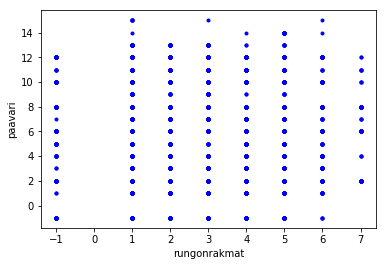

rungonrakmat lisavari


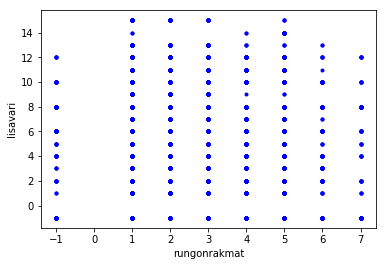

rungonrakmat maxpituus


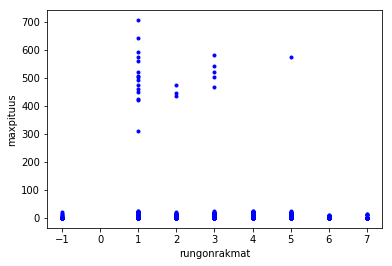

rungonrakmat maxnopeus


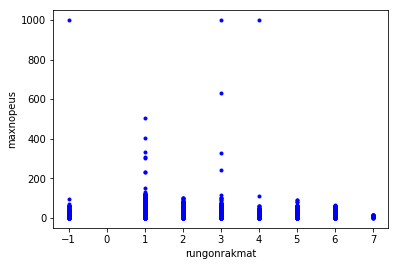

rungonrakmat maxmoottoriteho


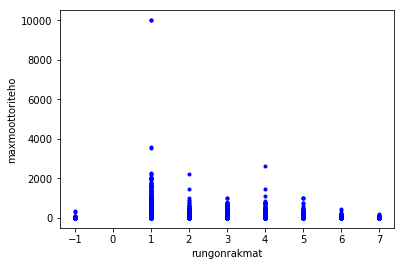

rungonrakmat moottori_teho


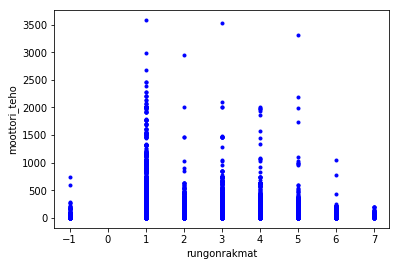

rungonrakmat moottori_lkm


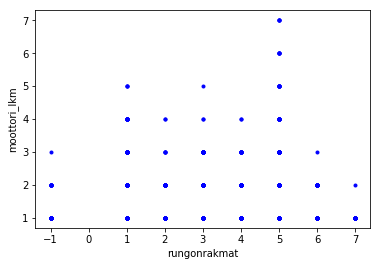

rungonrakmat paino


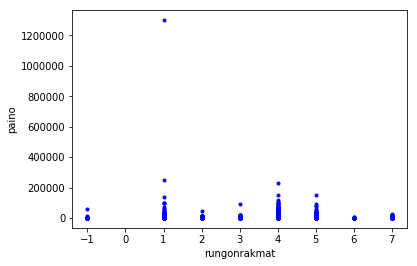

rungonrakmat jokivene


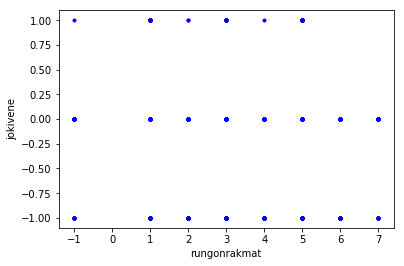

rungonrakmat tenonvene


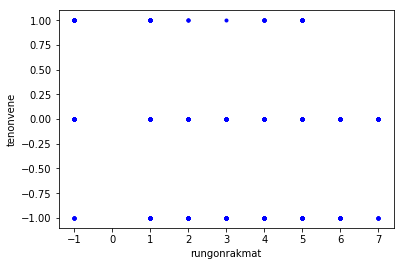

rungonrakmat vene_malli


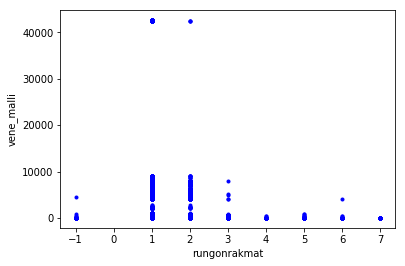

rungonrakmat vene_merkki


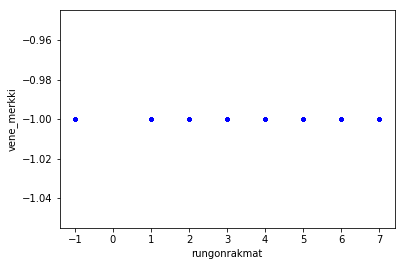

rungonrakmat tyyppi


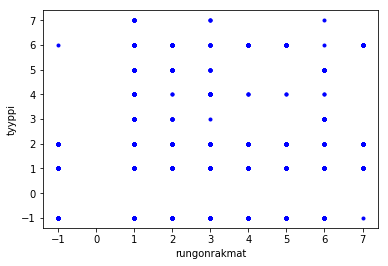

rungonrakmat runkotyyppi


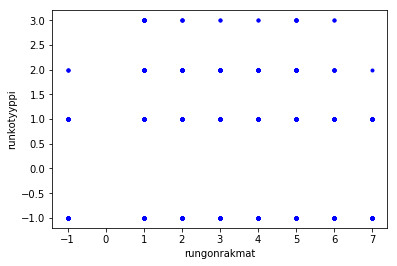

rungonrakmat kansirakenne


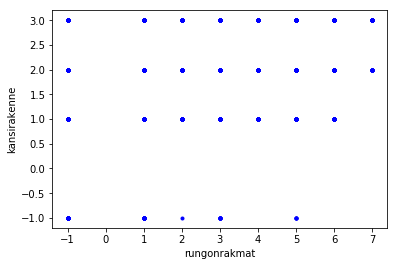

rungonrakmat maxhlolkm


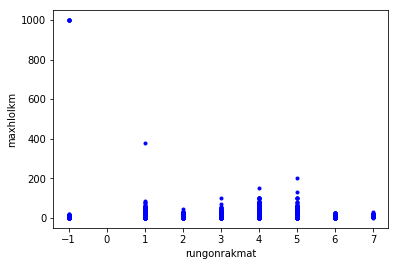

rungonrakmat runkopituus


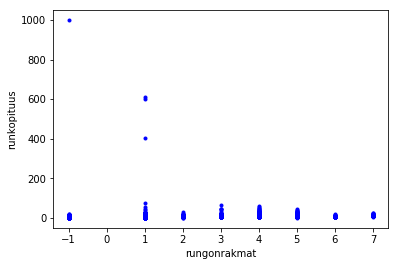

rungonrakmat maxleveys


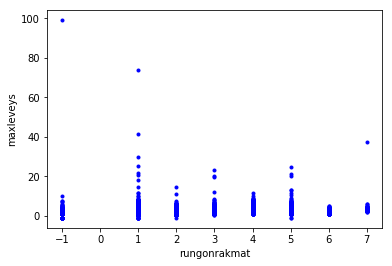

rungonrakmat syvays


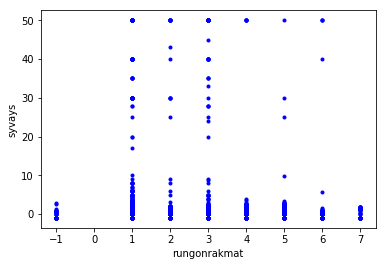

rungonrakmat kayttokunta_koodi


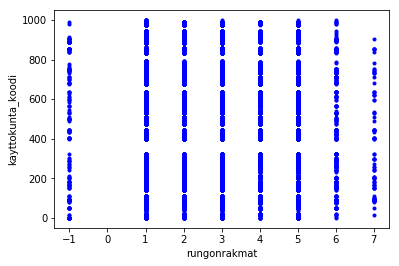

rungonrakmat jarnro


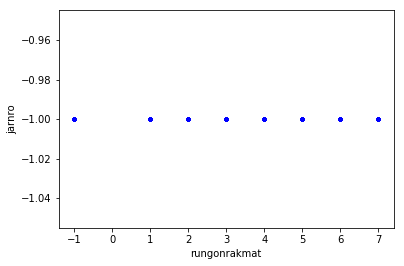

maxhlolkm vuosimalli


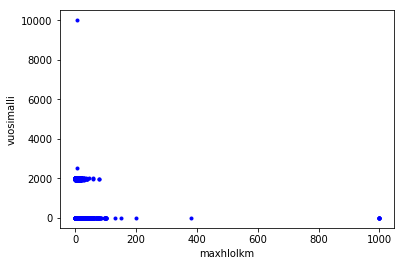

maxhlolkm valmistusvuosi


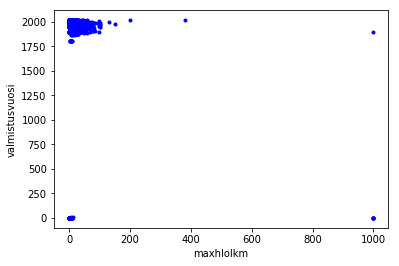

maxhlolkm kayttoonottovuosi


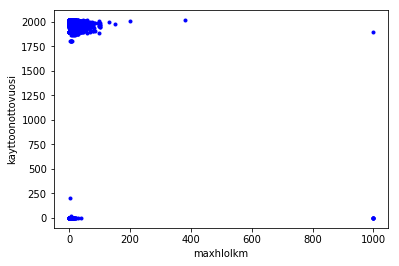

maxhlolkm paavari


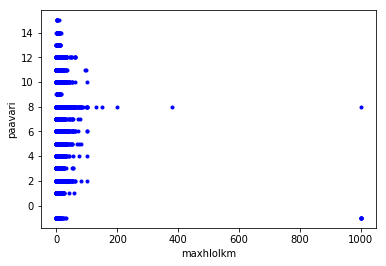

maxhlolkm lisavari


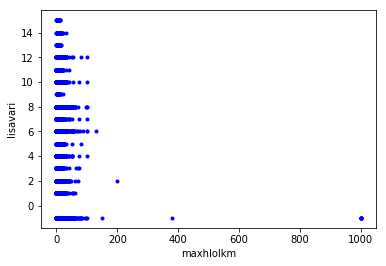

maxhlolkm maxpituus


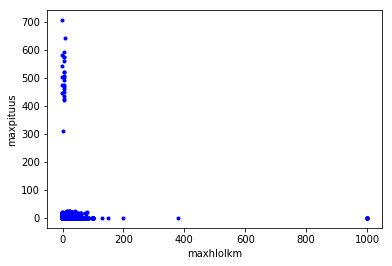

maxhlolkm maxnopeus


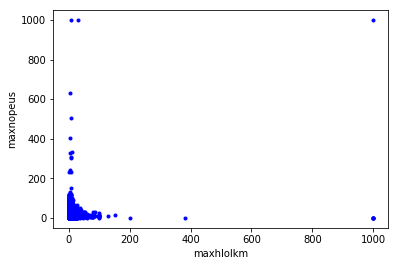

maxhlolkm maxmoottoriteho


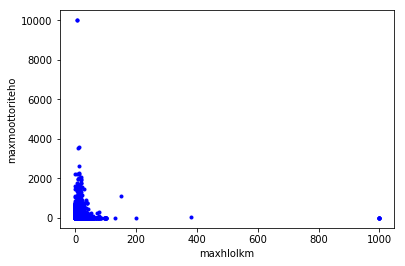

maxhlolkm moottori_teho


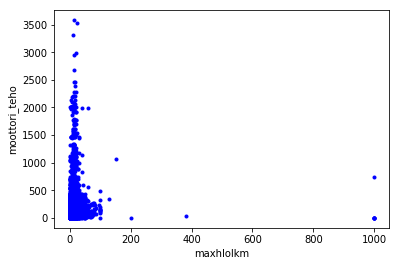

maxhlolkm moottori_lkm


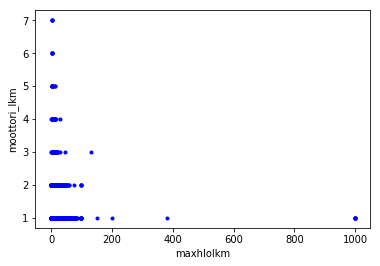

maxhlolkm paino


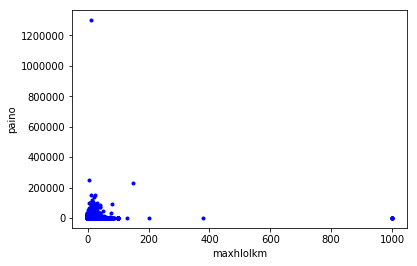

maxhlolkm jokivene


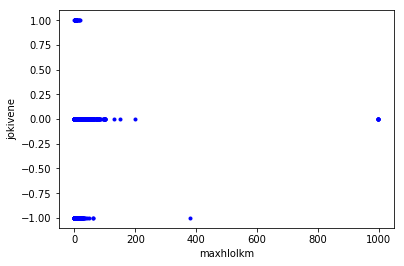

maxhlolkm tenonvene


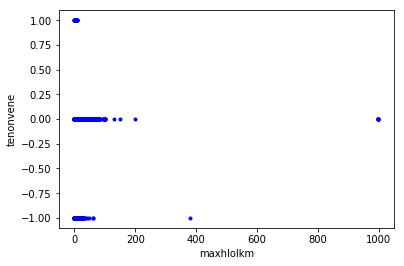

maxhlolkm vene_malli


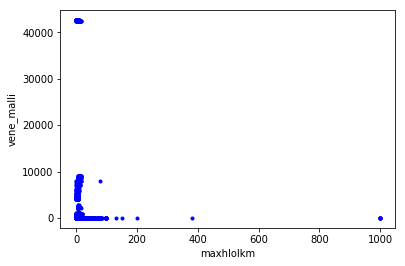

maxhlolkm vene_merkki


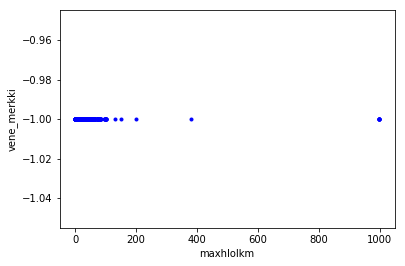

maxhlolkm tyyppi


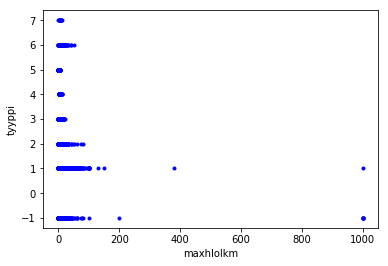

maxhlolkm runkotyyppi


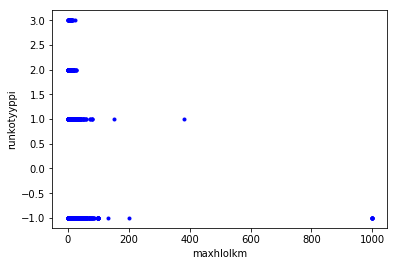

maxhlolkm kansirakenne


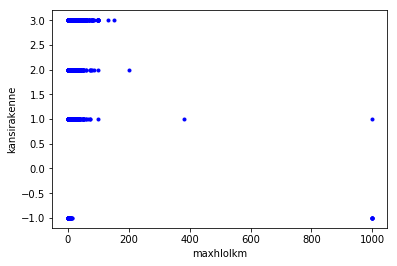

maxhlolkm rungonrakmat


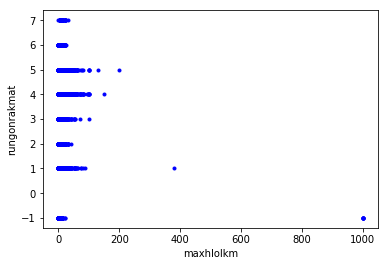

maxhlolkm runkopituus


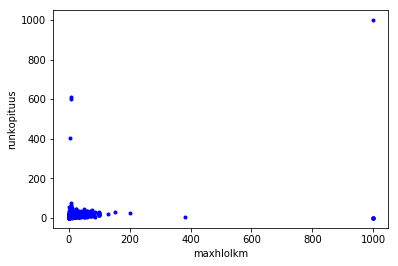

maxhlolkm maxleveys


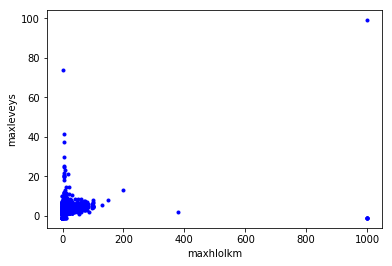

maxhlolkm syvays


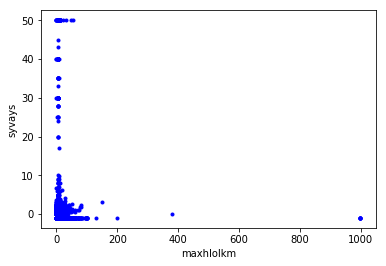

maxhlolkm kayttokunta_koodi


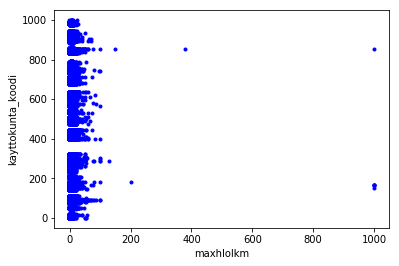

maxhlolkm jarnro


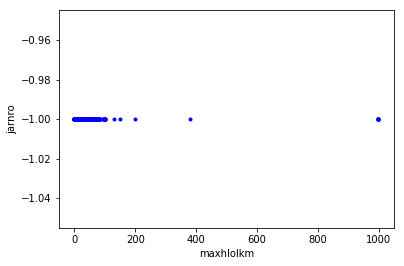

runkopituus vuosimalli


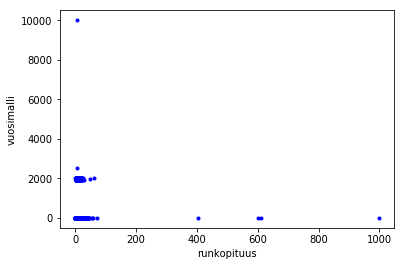

runkopituus valmistusvuosi


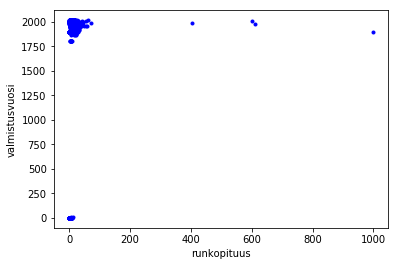

runkopituus kayttoonottovuosi


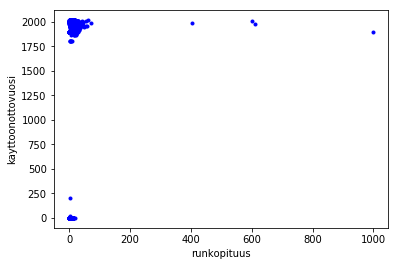

runkopituus paavari


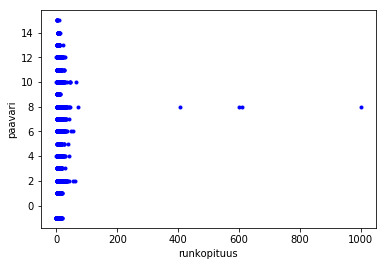

runkopituus lisavari


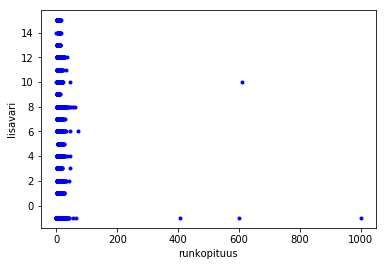

runkopituus maxpituus


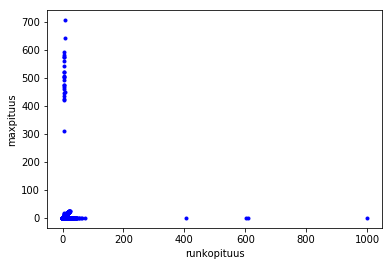

runkopituus maxnopeus


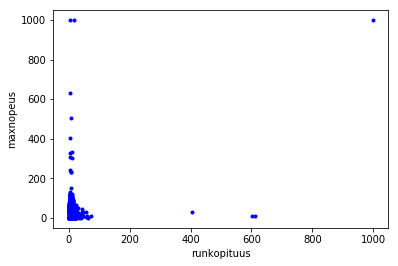

runkopituus maxmoottoriteho


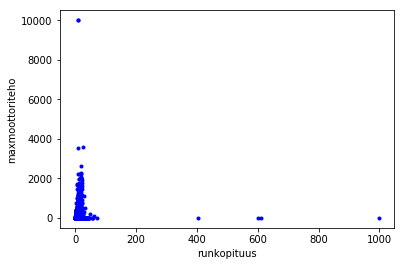

runkopituus moottori_teho


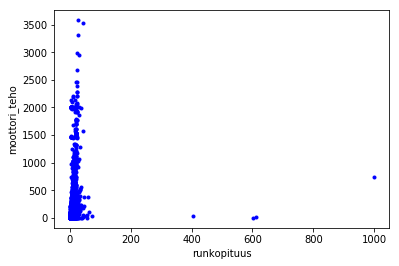

runkopituus moottori_lkm


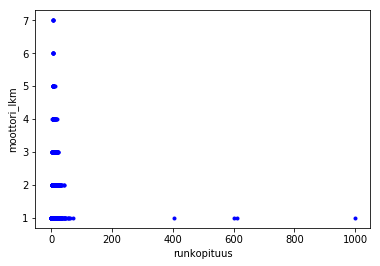

runkopituus paino


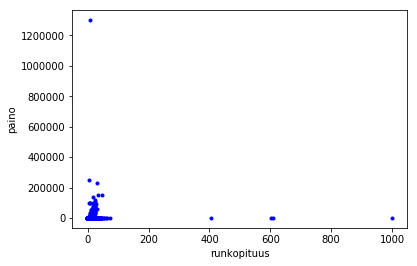

runkopituus jokivene


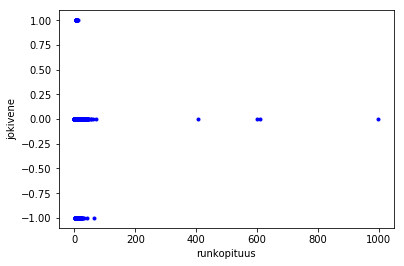

runkopituus tenonvene


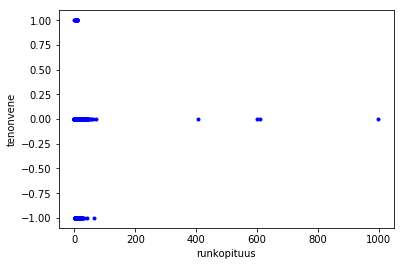

runkopituus vene_malli


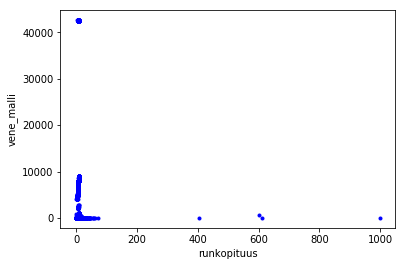

runkopituus vene_merkki


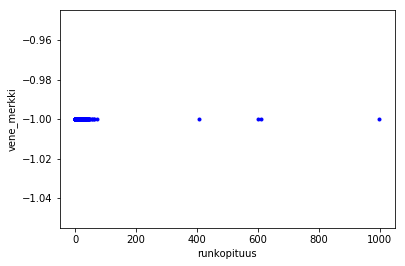

runkopituus tyyppi


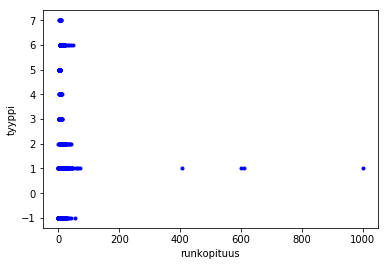

runkopituus runkotyyppi


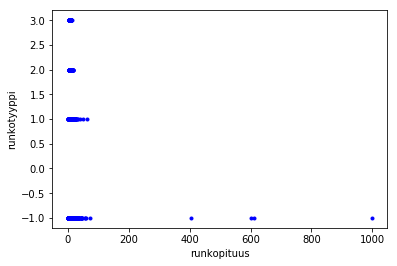

runkopituus kansirakenne


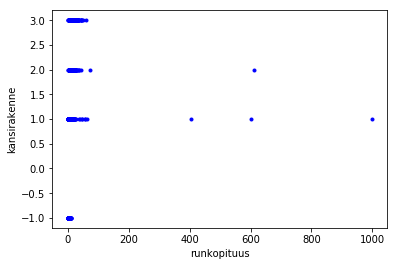

runkopituus rungonrakmat


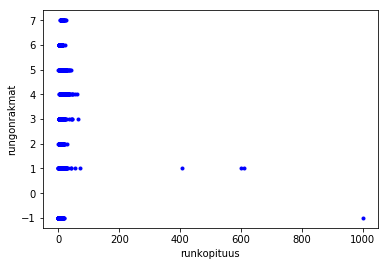

runkopituus maxhlolkm


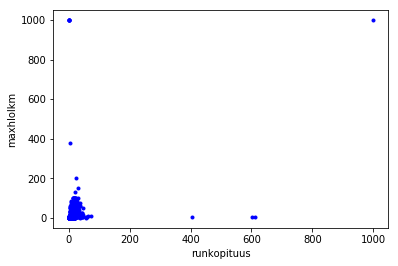

runkopituus maxleveys


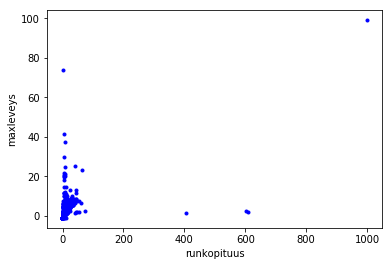

runkopituus syvays


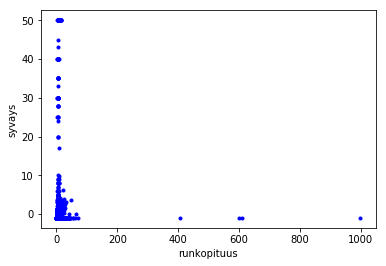

runkopituus kayttokunta_koodi


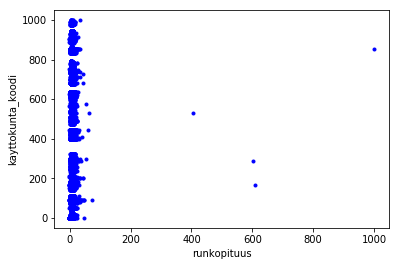

runkopituus jarnro


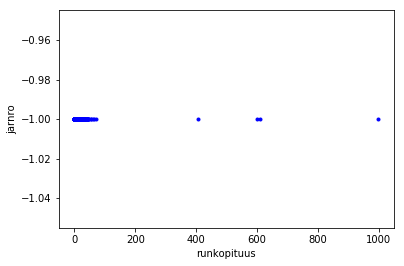

maxleveys vuosimalli


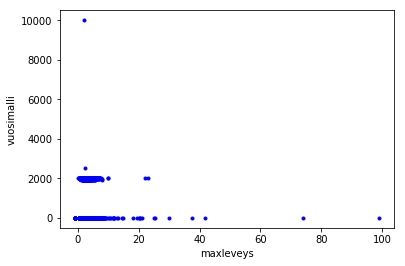

maxleveys valmistusvuosi


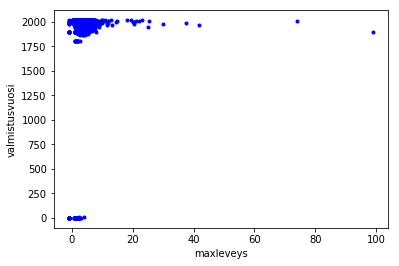

maxleveys kayttoonottovuosi


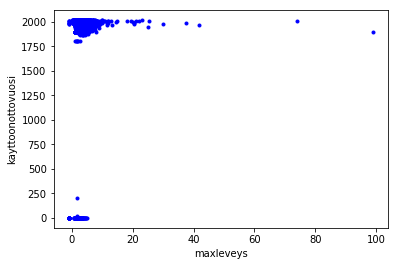

maxleveys paavari


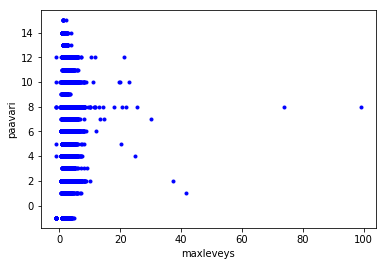

maxleveys lisavari


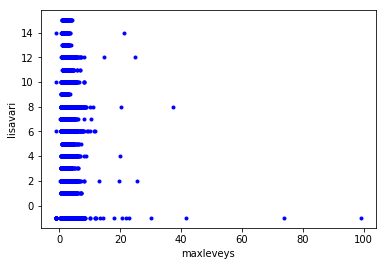

maxleveys maxpituus


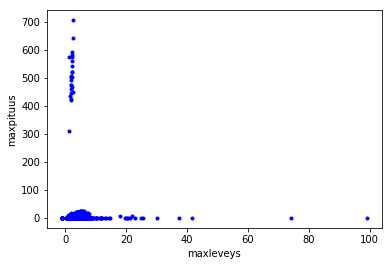

maxleveys maxnopeus


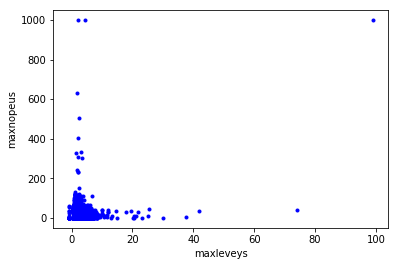

maxleveys maxmoottoriteho


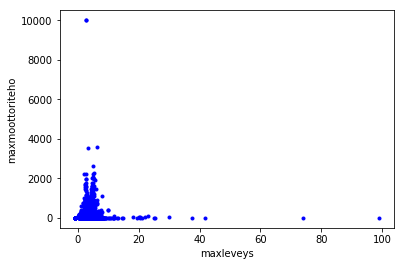

maxleveys moottori_teho


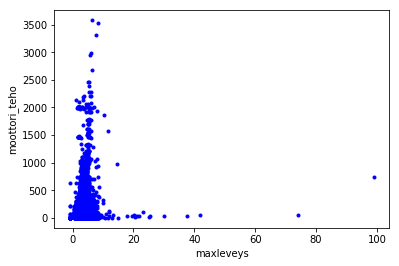

maxleveys moottori_lkm


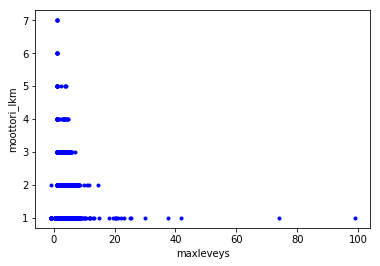

maxleveys paino


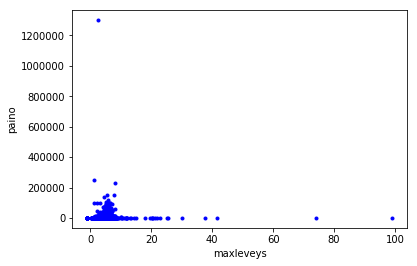

maxleveys jokivene


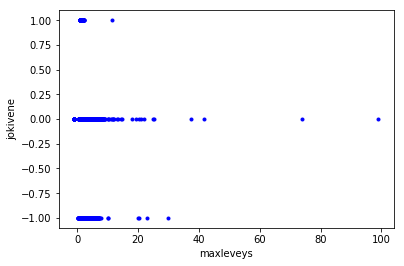

maxleveys tenonvene


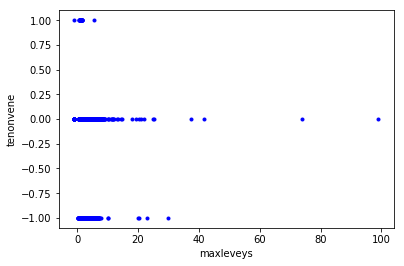

maxleveys vene_malli


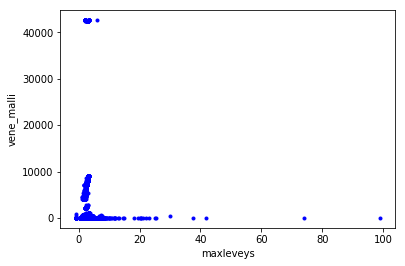

maxleveys vene_merkki


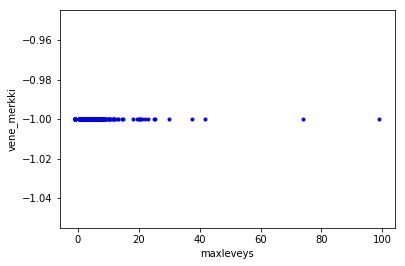

maxleveys tyyppi


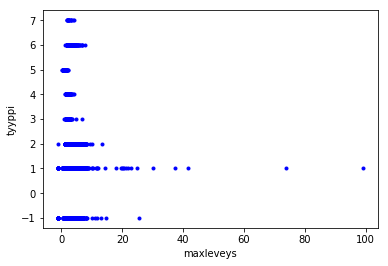

maxleveys runkotyyppi


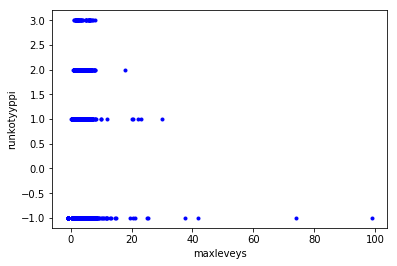

maxleveys kansirakenne


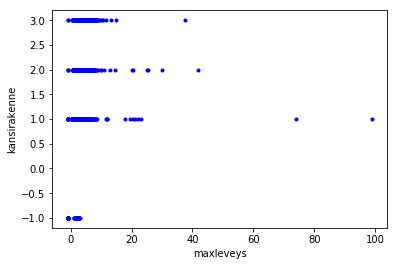

maxleveys rungonrakmat


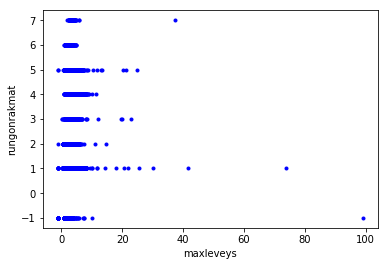

maxleveys maxhlolkm


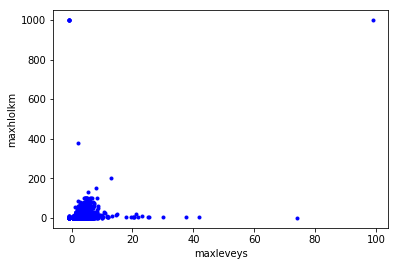

maxleveys runkopituus


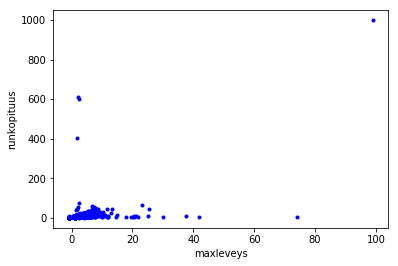

maxleveys syvays


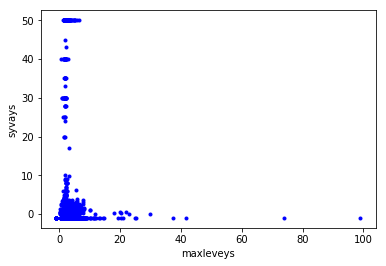

maxleveys kayttokunta_koodi


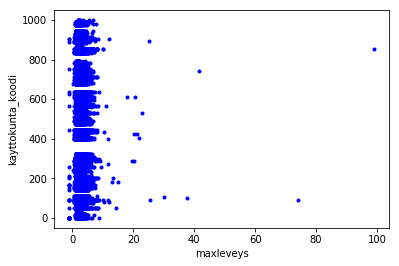

maxleveys jarnro


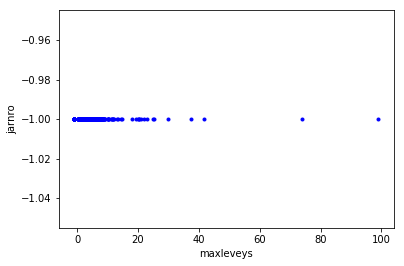

syvays vuosimalli


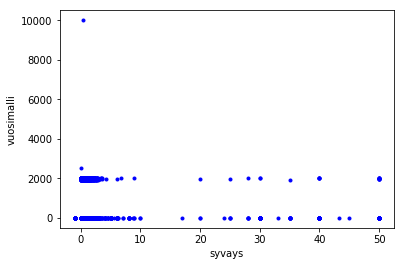

syvays valmistusvuosi


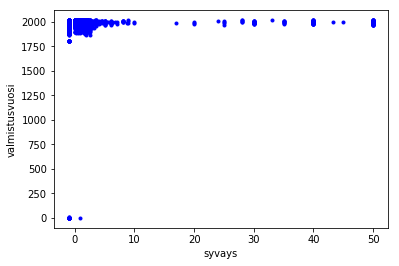

syvays kayttoonottovuosi


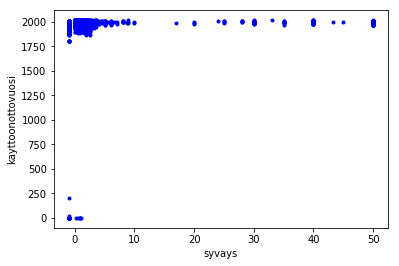

syvays paavari


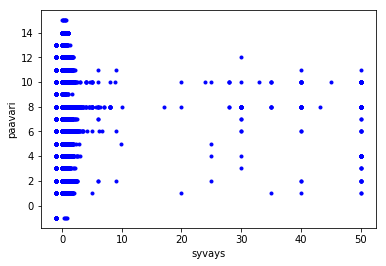

syvays lisavari


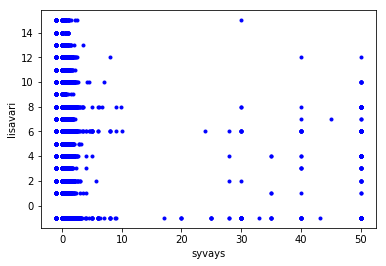

syvays maxpituus


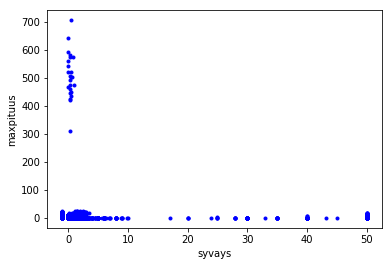

syvays maxnopeus


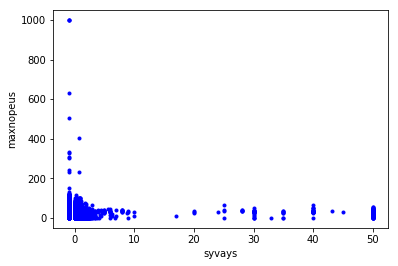

syvays maxmoottoriteho


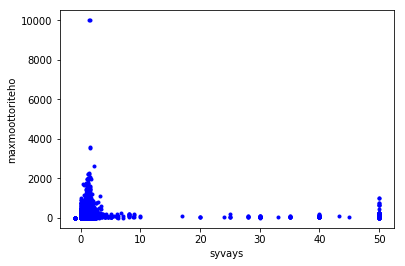

syvays moottori_teho


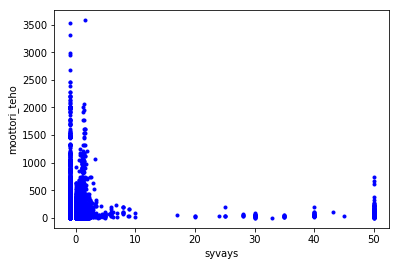

syvays moottori_lkm


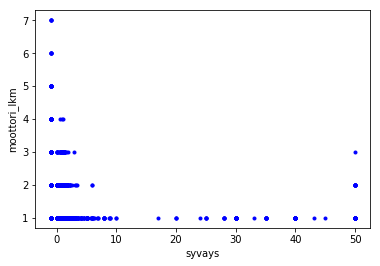

syvays paino


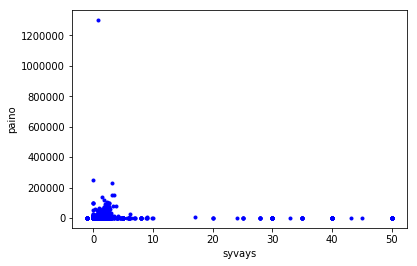

syvays jokivene


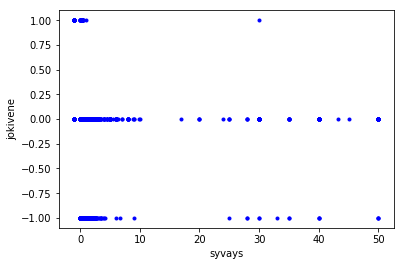

syvays tenonvene


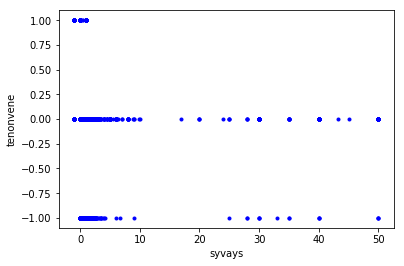

syvays vene_malli


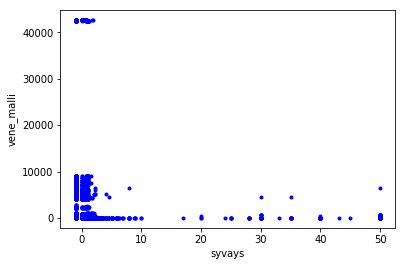

syvays vene_merkki


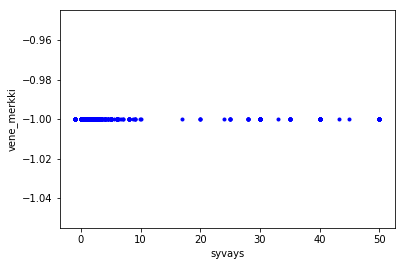

syvays tyyppi


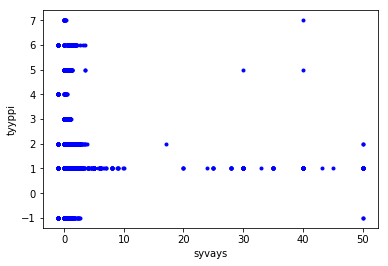

syvays runkotyyppi


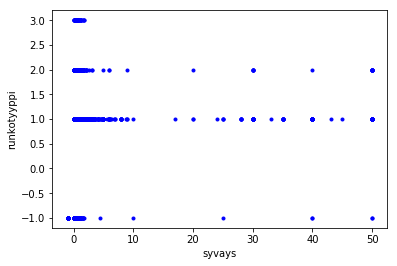

syvays kansirakenne


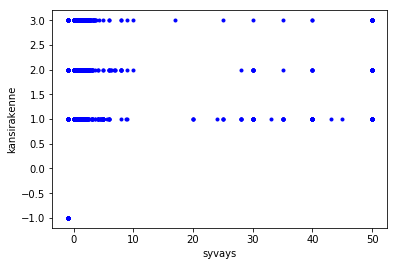

syvays rungonrakmat


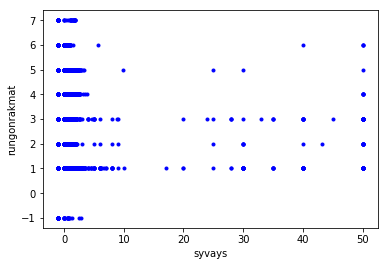

syvays maxhlolkm


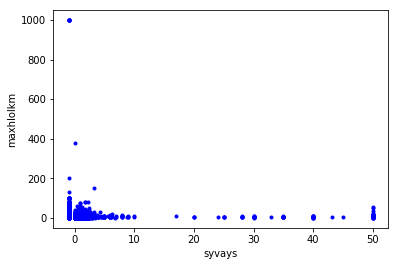

syvays runkopituus


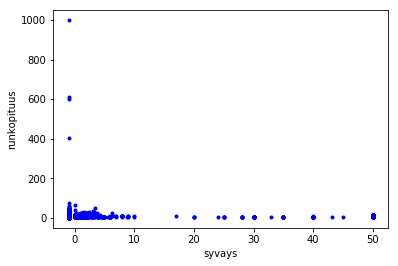

syvays maxleveys


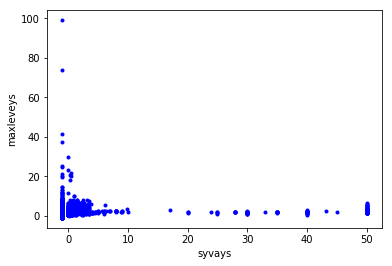

syvays kayttokunta_koodi


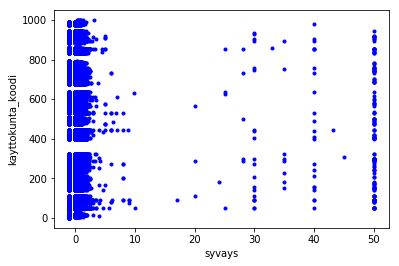

syvays jarnro


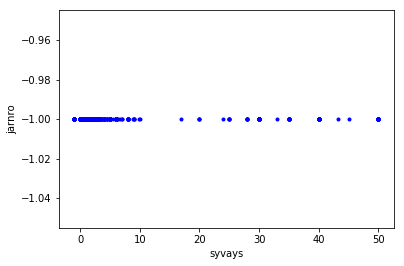

kayttokunta_koodi vuosimalli


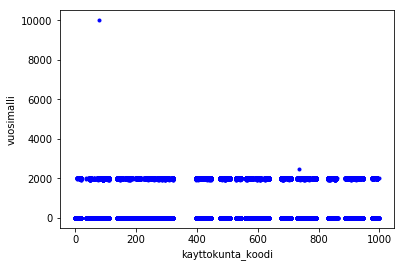

kayttokunta_koodi valmistusvuosi


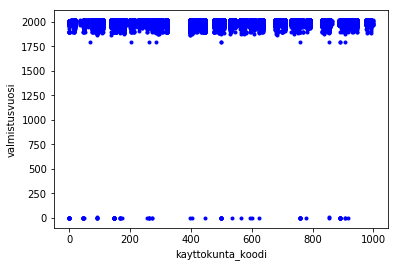

kayttokunta_koodi kayttoonottovuosi


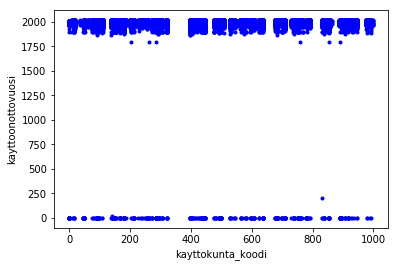

kayttokunta_koodi paavari


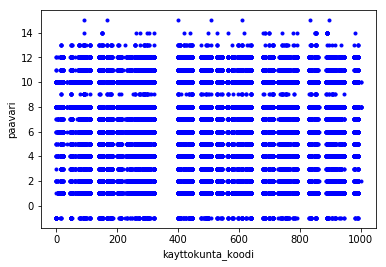

kayttokunta_koodi lisavari


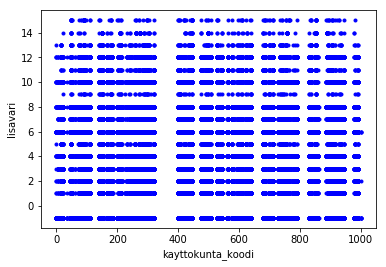

kayttokunta_koodi maxpituus


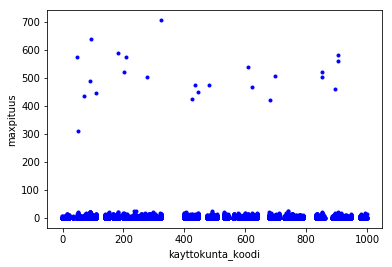

kayttokunta_koodi maxnopeus


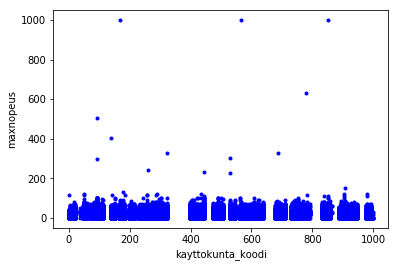

kayttokunta_koodi maxmoottoriteho


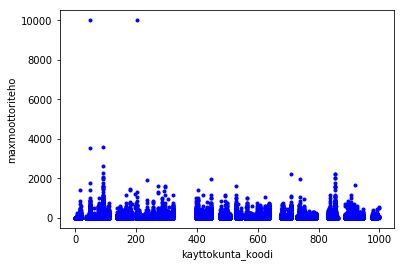

kayttokunta_koodi moottori_teho


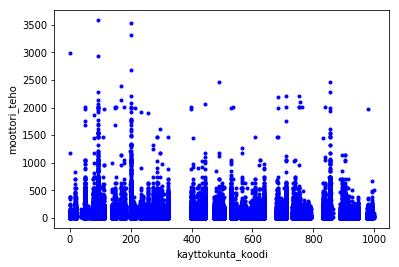

kayttokunta_koodi moottori_lkm


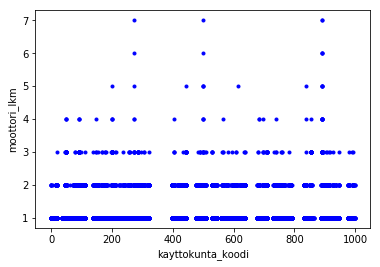

kayttokunta_koodi paino


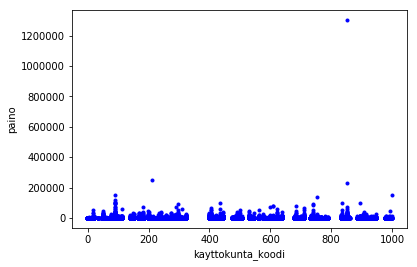

kayttokunta_koodi jokivene


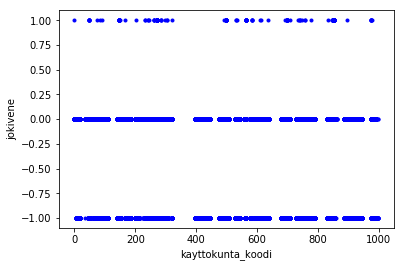

kayttokunta_koodi tenonvene


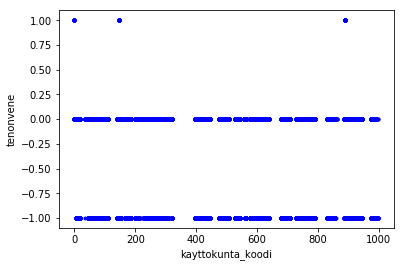

kayttokunta_koodi vene_malli


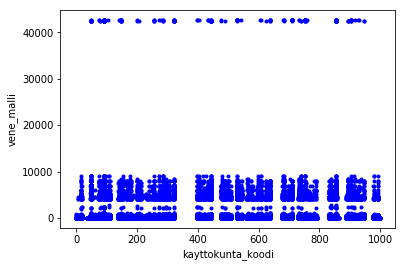

kayttokunta_koodi vene_merkki


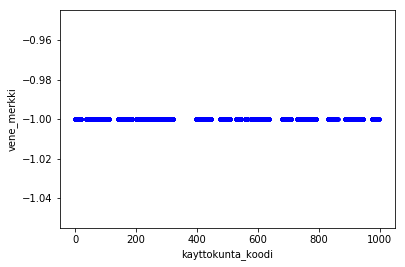

kayttokunta_koodi tyyppi


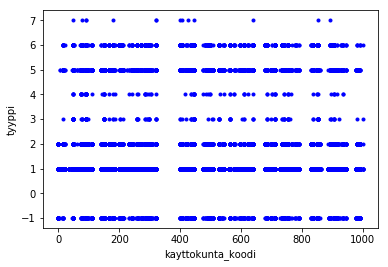

kayttokunta_koodi runkotyyppi


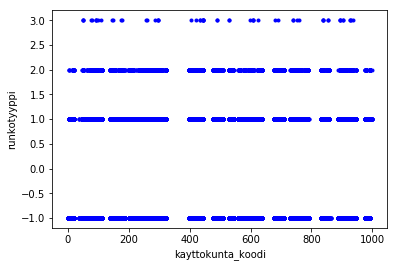

kayttokunta_koodi kansirakenne


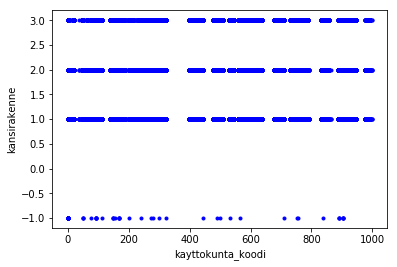

kayttokunta_koodi rungonrakmat


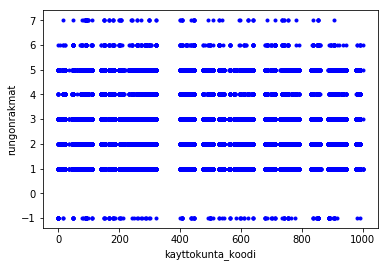

kayttokunta_koodi maxhlolkm


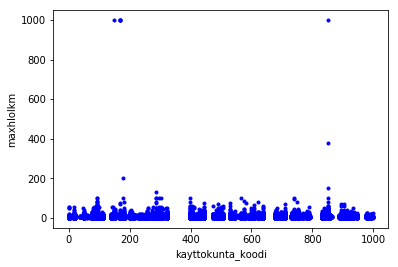

kayttokunta_koodi runkopituus


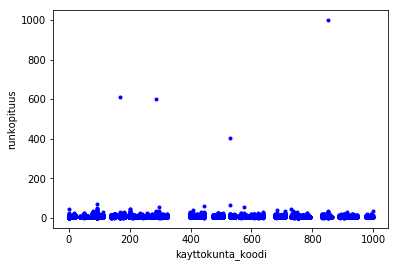

kayttokunta_koodi maxleveys


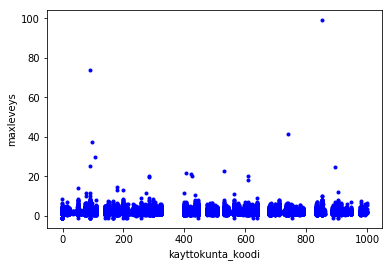

kayttokunta_koodi syvays


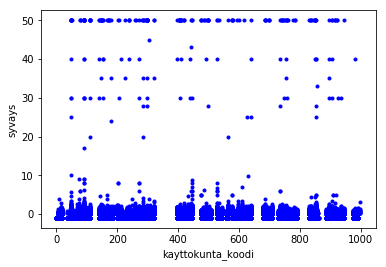

kayttokunta_koodi jarnro


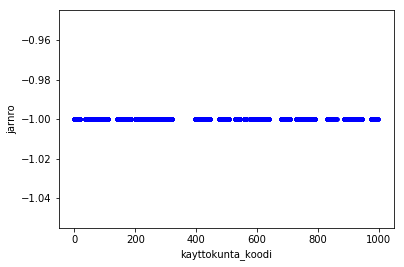

jarnro vuosimalli


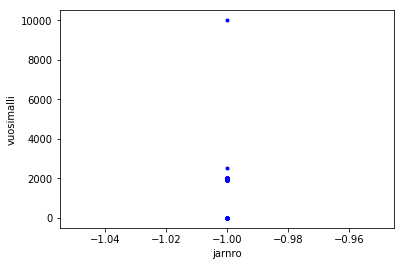

jarnro valmistusvuosi


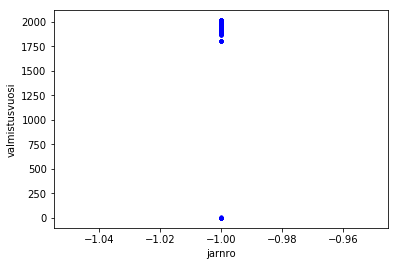

jarnro kayttoonottovuosi


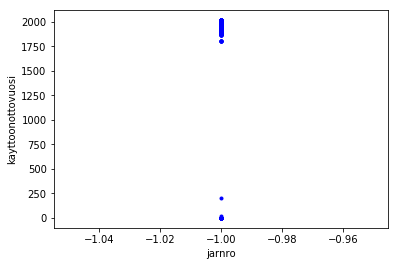

jarnro paavari


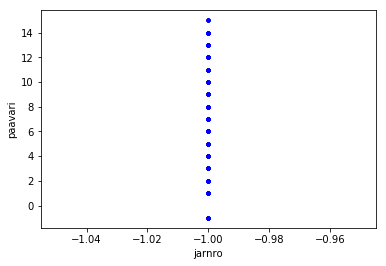

jarnro lisavari


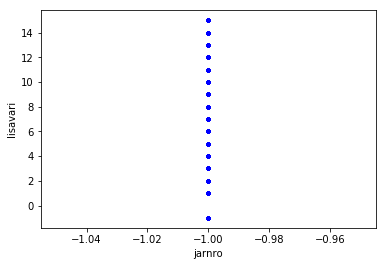

jarnro maxpituus


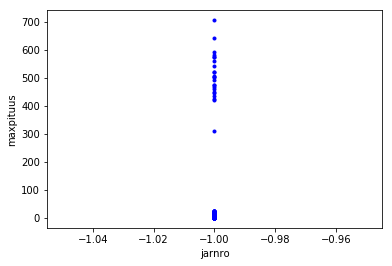

jarnro maxnopeus


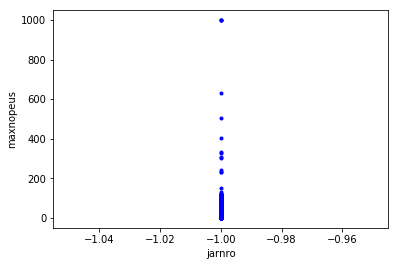

jarnro maxmoottoriteho


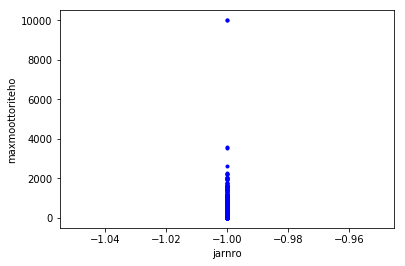

jarnro moottori_teho


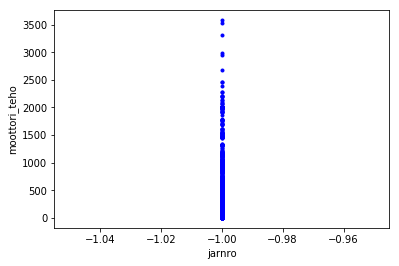

jarnro moottori_lkm


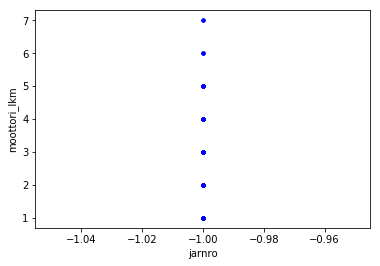

jarnro paino


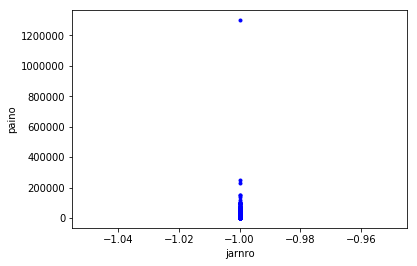

jarnro jokivene


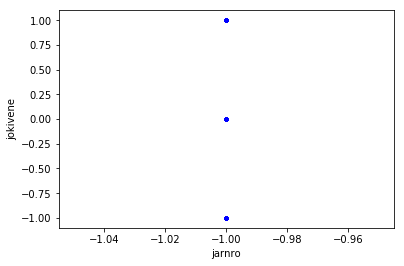

jarnro tenonvene


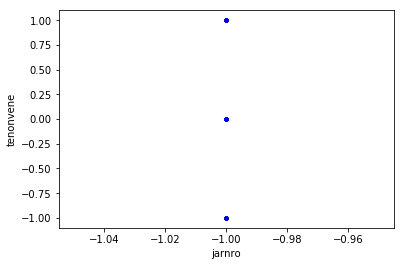

jarnro vene_malli


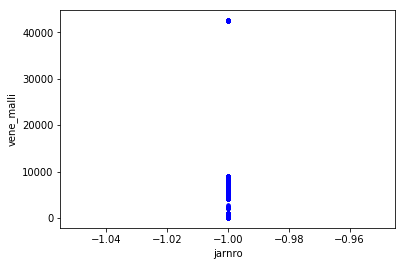

jarnro vene_merkki


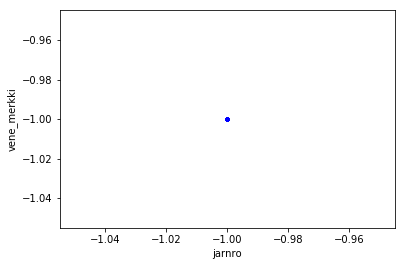

jarnro tyyppi


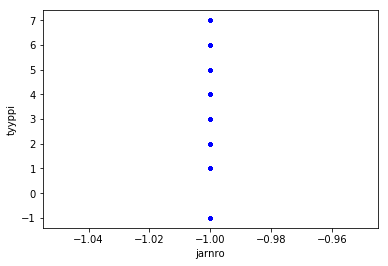

jarnro runkotyyppi


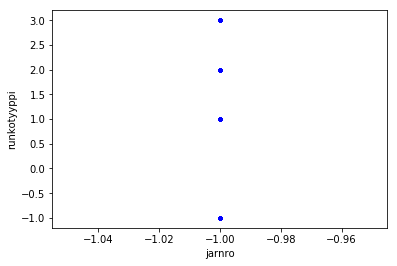

jarnro kansirakenne


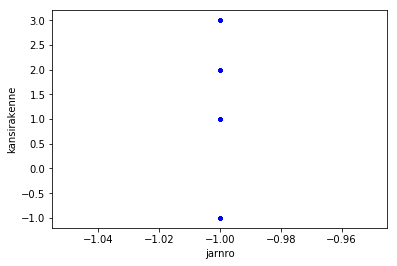

jarnro rungonrakmat


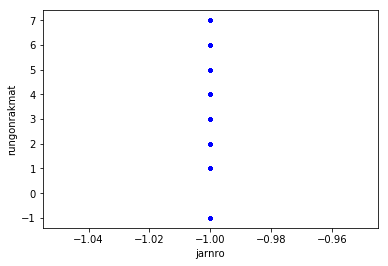

jarnro maxhlolkm


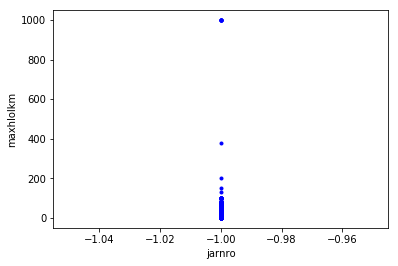

jarnro runkopituus


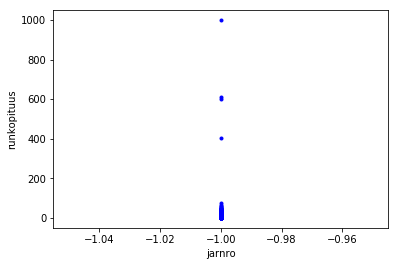

jarnro maxleveys


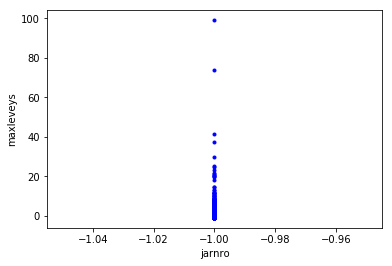

jarnro syvays


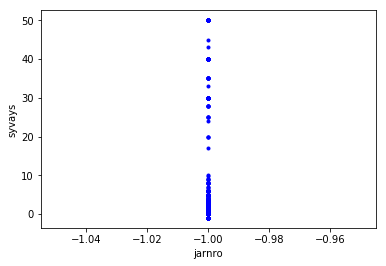

jarnro kayttokunta_koodi


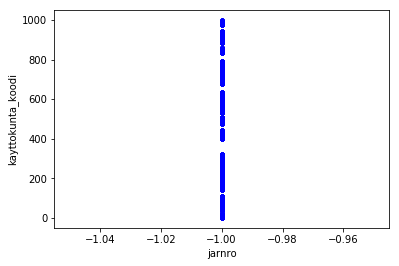

In [5]:
def plot_vars(x, y):
    dataset = list()
    for item in data.values():
        d = [-1, -1]
        if x in item.keys():
            try:
                d[0] = float(item[x])
            except:
                pass
        if y in item.keys():
            try:
                d[1] = float(item[y])
            except:
                pass
        dataset.append(d)
    dataset = np.atleast_2d(dataset)
    pl.plot(dataset[:,0], dataset[:,1], "b.")
    pl.xlabel(x)
    pl.ylabel(y)
    pl.show()

# eksploratiivista analyysia
for x in labels:
    for y in labels:
        if x == y:
            continue
        print(x, y)
        plot_vars(x, y)

Datasetissä ei vaikuttaisi olevan mitään kovin selkeitä klustereita. Tiettyjä trendejä näkyy, kuten että moottoriteho kasvaa käyttöönottovuoden mukaan, ja että aluksen koko ja moottoriteho korreloivat vahvasti. Myös aluksen rakenne ja koko vaikuttavat olevan toisiinsa yhteydessä; todennäköisesti isompien aluksien rakentamiseen käytetään eri materiaaleja ja tekniikoita. Alla muutama kiinnostava havainto.

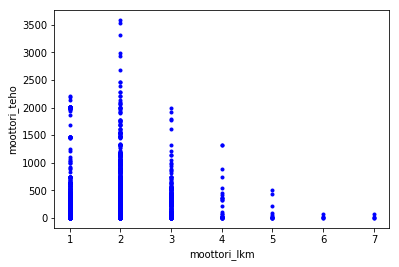

In [6]:
plot_vars("moottori_lkm", "moottori_teho")

Moottorien lukumäärä ja teho näyttävät riippuvan toisistaan

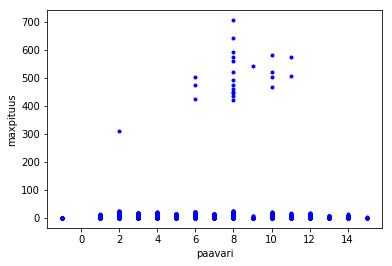

In [7]:
plot_vars("paavari", "maxpituus")

Todella pitkät veneet ovat näköjään useimmiten tietyn värisiä

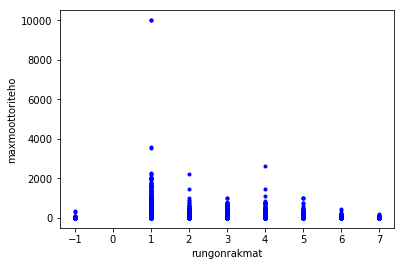

In [10]:
plot_vars("rungonrakmat", "maxmoottoriteho")

Moottoriteho ja rungon materiaali vaikuttavat olevan yhteydessä toisiinsa